<a href="https://colab.research.google.com/github/alcarnielo/Bootcamp_Alura/blob/main/Modulo_01/Projeto_Modulo_01__Alvaro_Carnielo_e_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto Módulo 01 - Bootcamp Data Science Alura
Autor: Álvaro Carnielo e Silva



# Objetivo
A pandemia gerada pelo SARS-COV-2, causou grande aumento de mortes no Brasil. Muitas dessas ocasionadas diretamente pelo vírus, outras acabaram sendo efeitos indiretos como falta de leitos ou mortes com causa desconhecida. Assim, o objetivo deste projeto é avaliar o aumento de mortes em excesso causadas pela pandemia de COVID-19 no Brasil e se os números deste aumento são visíveis em outros dados oficiais.

# Resumo
Para avaliar mortes em excesso no Brasil foram avaliadas fontes de casos de COVID-19 disponíveis para obter as mortes devido ao vírus SARS-COV-2 (Google, Brasil.io, Ministério da Saúde).

Em paralelo a isso, avaliou-se o histórico de mortes registradas no Brasil. A partir daí foram feitas projeções de mortes para o Brasil imaginando-se um cenário onde não houvesse a pandemia. Para essas projeções também utilizaram-se fontes de dados disponíveis (Kaggle, Portal da Transparência dos Cartórios, SIDRA).

Por fim, o resultado da projeção de mortes para o ano de 2020 foi comparado com o número de mortes registradas de fato. A diferença entre mortes registradas e a projeção de mortes (excesso de mortes) foi comparada com as mortes devido à COVID-19 para avaliar o impacto do vírus SARS-COV-2 no total de óbitos.

# Introdução
O vírus SARS-COV-2 foi identificado inicialmente na China, na região de [Wuhan](https://jornal.usp.br/artigos/covid2-o-que-se-sabe-sobre-a-origem-da-doenca/), e logo se espalhou pelo mundo causando a atual pandemia, que vitimou centenas de milhares de pessoas em todo o mundo a partir de Dezembro de 2019.

Devido à alta mortalidade do vírus, a [OMS (Organização Mundial da Saúde) indicou que a melhor metodologia para controle seria o rastreio de contatos e isolamento de contaminados](https://agenciabrasil.ebc.com.br/saude/noticia/2020-03/oms-recomenda-testes-e-isolamento-de-casos-suspeitos-para-conter-covid-19) para tratamento dos doentes e evitar a propagação do vírus.

Contudo, alguns governos no mundo, [incluindo o Brasileiro, questionaram a real letalidade desta variante de corona vírus](https://istoe.com.br/bolsonaro-minimiza-mortes-por-covid-e-manda-apoiadora-que-o-questionou-se-retirar/) e não implantaram as medidas recomendadas e pouco fizeram para controlar o volume de infectados.

Assim, devido a este cenário, uma forma efetiva de determinar a letalidade do vírus no Brasil é através da determinação de excesso de mortalidade.

O excesso de mortalidade é determinado pela quantidade de mortes acima da média ocorrida historicamente. Assim, neste trabalho será levantada a mortalidade devido à COVID-19 no Brasil.



# Referências
- [Brasil.io - ref. 01](https://brasil.io/dataset/covid19/caso/)
- [Brasil.io - ref. 02](https://www.kaggle.com/amandalk/registered-deaths-brazil)
- [Painel Coronavirus](https://covid.saude.gov.br/)
- [Google](https://news.google.com/covid19/map?hl=pt-BR&mid=/m/01hd58&gl=BR&ceid=BR:pt-419)
- [Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil)
- [Biblioteca missingno - ref. 01](https://towardsdatascience.com/dont-miss-out-on-missingno-for-identifying-missing-data-9a0681433c36)
- [Biblioteca missingno - ref. 02](https://github.com/ResidentMario/missingno)
- [Registro de Cartório](https://transparencia.registrocivil.org.br/registros)
- [Sidra - IBGE](https://sidra.ibge.gov.br/tabela/2684)
- [Jornal da USP](https://jornal.usp.br/artigos/covid2-o-que-se-sabe-sobre-a-origem-da-doenca/)

# Avaliação dos dados

O processos de avaliação de dados consiste em verificar a qualidade destes e garantir que a fonte utilizada seja válida para a aplicação desejada.

Neste projeto foram usadas as fontes do site [Brasil.io](https://brasil.io/dataset/covid19/caso/), do [Painel Coronavirus](https://covid.saude.gov.br/) do governo federal e do [Google](https://news.google.com/covid19/map?hl=pt-BR&mid=/m/01hd58&gl=BR&ceid=BR:pt-419). Já para os óbitos, utilizou-se uma base de dados armazenada no [Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil), os dados de [Registro de Cartório](https://transparencia.registrocivil.org.br/registros) e do portal [Sidra - IBGE](https://sidra.ibge.gov.br/tabela/2684).

Na avaliação da qualidade dos dados, verifica-se a existência de dados, vazios, repetidos e inválidos que podem prejudicar nossa avaliação. 

Após essa etapa, foram comparados os dados das fontes e verificados a robustez delas e só então será possível utilizá-los para rer a nossa análise.


## Dados do COVID-19

A primeira etapa é a avaliação dos dados de COVID-19. Assim, avaliaram-se primeiro os dados do site [Brasil.io](https://brasil.io/dataset/covid19/caso/).

In [369]:
### Importar bibliotecas que será utilizadas na análise:
# Bibliotecas numéricas e de dados
import pandas as pd
import numpy as np
import json
import missingno as msno
import datetime

# Bibliotecas graficas
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import plotly

# Bibliotecas de webscrapping
import requests as r
from bs4 import BeautifulSoup as bs


In [370]:
#### Carregar fonte do Brasil.io
# Nota: Como os dados não foram abertos por API, faz-se necessário carregá-los manualmente
fonte_brasil_io = '/content/drive/MyDrive/Bootcamp_Alura/Modulo_01/caso_full.csv.gz'
covid19_brasil_io_original = pd.read_csv(fonte_brasil_io, compression='gzip')
covid19_brasil_io_original

city  city_ibge_code        date  ...  state  new_confirmed  new_deaths
0        São Paulo       3550308.0  2020-02-25  ...     SP              1           0
1              NaN            35.0  2020-02-25  ...     SP              1           0
2        São Paulo       3550308.0  2020-02-26  ...     SP              0           0
3              NaN            35.0  2020-02-26  ...     SP              0           0
4        São Paulo       3550308.0  2020-02-27  ...     SP              0           0
...            ...             ...         ...  ...    ...            ...         ...
1072428        NaN            43.0  2020-11-17  ...     RS           3479          71
1072429        NaN            42.0  2020-11-17  ...     SC           5178          40
1072430        NaN            28.0  2020-11-17  ...     SE            127           3
1072431        NaN            35.0  2020-11-17  ...     SP           8698         173
1072432        NaN            17.0  2020-11-17  ...     TO              0           0

[1072433 rows x 18 columns]

Acima, é possível verificar que neste dataframe há algumas NaN. 
Além disso, é necessário realizar uma investigação do conteúdo de cada coluna.

In [371]:
#### Checar exisência de valores NaN
print('Porcentagen de linhas faltantes no dataframe: {:{}.2f}%'.format(
      (covid19_brasil_io_original.shape[0]-
       covid19_brasil_io_original.dropna().shape[0]
       )/covid19_brasil_io_original.shape[0]*100,6))
print('Quantidade de linhas faltantes no dataframe: {:{},}/n/n'.format(
      covid19_brasil_io_original.shape[0]-covid19_brasil_io_original.dropna().shape[0],6))

with pd.option_context('display.float_format', '{:.2f}%'.format):
    val_NaN = pd.DataFrame()
    val_NaN['Qtd. Linhas Faltantes'] = covid19_brasil_io_original.isnull().sum()
    val_NaN['% Linhas Faltantes'] = (covid19_brasil_io_original.isnull().sum()/
                                    covid19_brasil_io_original.shape[0]*100)
    print(val_NaN,'\n','\n')


Porcentagen de linhas faltantes no dataframe:   2.35%
Quantidade de linhas faltantes no dataframe: 25,225/n/n
                                               Qtd. Linhas Faltantes  % Linhas Faltantes
city                                                            6754               0.63%
city_ibge_code                                                  4241               0.40%
date                                                               0               0.00%
epidemiological_week                                               0               0.00%
estimated_population                                            4241               0.40%
estimated_population_2019                                       4241               0.40%
is_last                                                            0               0.00%
is_repeated                                                        0               0.00%
last_available_confirmed                                           0               0.00%


Text(0.5, 0, '\nFigura 01: Visualização dos dados faltantes no dataframe em \n                 forma matricial. Campos preenchidos significa que\n                 o dado não é nulo                                                     ')

<Figure size 432x288 with 0 Axes>

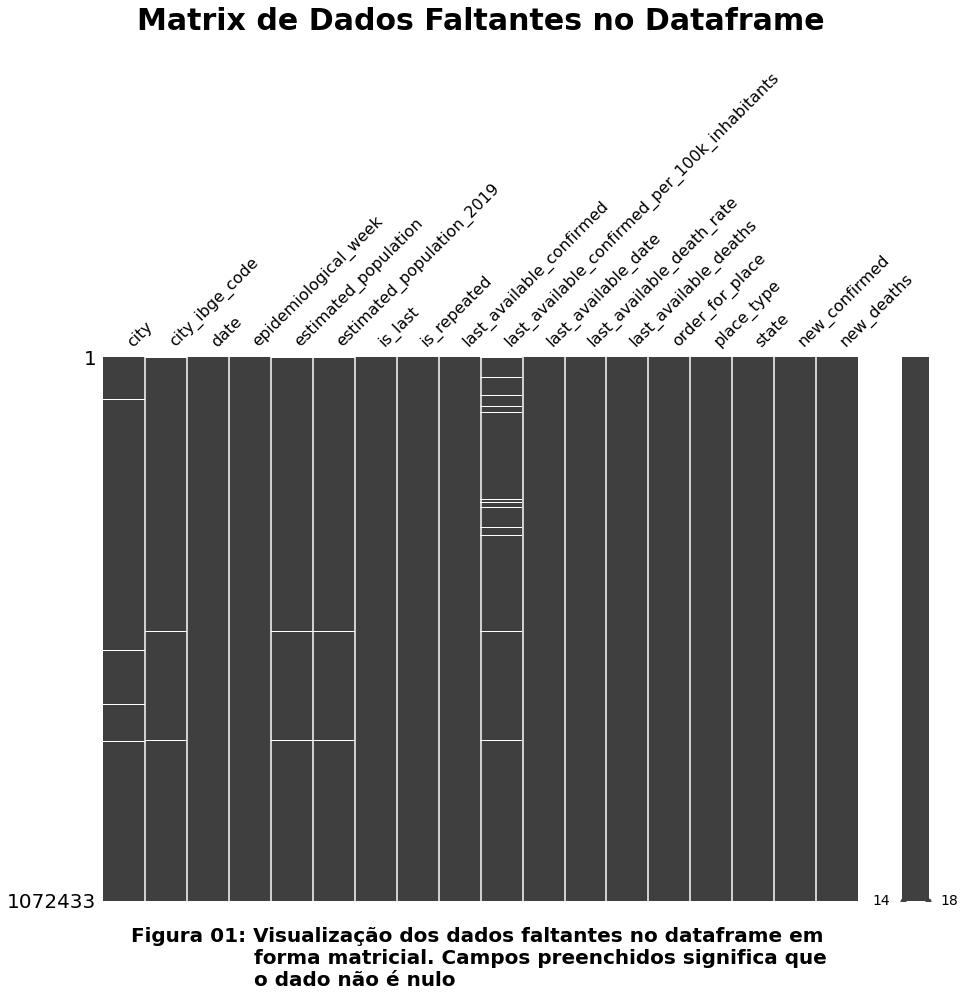

In [372]:
#### Gerar visualização dos valores NaN
plt.figure()
msno.matrix(covid19_brasil_io_original, figsize=(15,10))
plt.title('''Matrix de Dados Faltantes no Dataframe
''', fontsize=30, fontweight='bold')
plt.xlabel('''
Figura 01: Visualização dos dados faltantes no dataframe em 
                 forma matricial. Campos preenchidos significa que
                 o dado não é nulo                                                     ''', 
           fontsize=20, fontweight='bold')


A figura 01 mostra uma matriz de números inexistentes. Essa matriz de números inexistentes apresenta o conjunto de  células preenchidas com a cor escura (preto) e também apresenta o conjunto de células vazias (NaN) com a cor clara (brando). Desta forma é possível ter uma visualização mais evidente de números faltantes no dataframe de estudo o que facilita a localização de células vazias e a tomada de decisão para o processo de análise.

Assim, aparentemente a quantidade de linhas com informações faltantes é pequena e a simples exclusão dessas não causaria grande impacto. Contudo, antes de fazer isso é necessário ter um melhor entendimento do conteúdo da tabela.

Dessa forma, juntando o que se observa na Figura 01 e o que foi avaliado na documentação do site [Brasil.io](https://brasil.io/dataset/covid19/caso/) decidiu-se que para este estudo seriam necessárias pelo menos as seguintes colunas:

- city
- city_ibge_code
- date
- epidemiological_week
- state
- new_confirmed
- new_deaths

Desta forma, dando continuidade à avaliação dos dados, verificou-se a quantidade de linhas faltantes.

In [373]:
# Selecionar apenas as colunas de interesse
colunas = ['city', 'city_ibge_code', 'date', 'epidemiological_week', 
           'state', 'new_confirmed', 'new_deaths']
covid19_brasil_io = covid19_brasil_io_original[colunas]
covid19_brasil_io[colunas].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072433 entries, 0 to 1072432
Data columns (total 7 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   city                  1065679 non-null  object 
 1   city_ibge_code        1068192 non-null  float64
 2   date                  1072433 non-null  object 
 3   epidemiological_week  1072433 non-null  int64  
 4   state                 1072433 non-null  object 
 5   new_confirmed         1072433 non-null  int64  
 6   new_deaths            1072433 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 57.3+ MB


Como a coluna de datas está como **object**, fez-se necessário converte-la para **datetime**.

In [374]:
# Converter data
covid19_brasil_io['parsed_date'] = pd.to_datetime(covid19_brasil_io['date'],
                                                  format='%Y-%m-%d')
print('Tipo da coluna "parsed_date": {}'.format(covid19_brasil_io['parsed_date'].dtype))
print('\n ', covid19_brasil_io['parsed_date'])



Tipo da coluna "parsed_date": datetime64[ns]

  0         2020-02-25
1         2020-02-25
2         2020-02-26
3         2020-02-26
4         2020-02-27
             ...    
1072428   2020-11-17
1072429   2020-11-17
1072430   2020-11-17
1072431   2020-11-17
1072432   2020-11-17
Name: parsed_date, Length: 1072433, dtype: datetime64[ns]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Com as datas convertidas para o formato **datetime**, é possível continuar com a verificação das outras colunas.

In [375]:
# Inspecionar coluna city 
print('Linhas sem nome: {} \n'.format(
    covid19_brasil_io.loc[covid19_brasil_io['city'].isna(),
                          'city'].shape[0]
))
print('Cidades que mais aparecem no DataFrame')
covid19_brasil_io['city'].value_counts(ascending=False).head()

Linhas sem nome: 6754 

Cidades que mais aparecem no DataFrame


Importados/Indefinidos    4241
Bom Jesus                  977
São Domingos               873
Santa Luzia                854
Bonito                     780
Name: city, dtype: int64

Há muitas linhas com o nome de cidade "Importados/Indefinidos". Foi necessário verificar o que causa essa diferença.

Para isso foram avaliadas algumas das linhas que tinham apenas esse nome de cidade.

In [376]:
# Explorar linhas com city == Importados/Indefinidos
covid19_brasil_io[covid19_brasil_io['city'] == 'Importados/Indefinidos']

city  city_ibge_code  ... new_deaths  parsed_date
193      Importados/Indefinidos             NaN  ...          0   2020-03-14
241      Importados/Indefinidos             NaN  ...          0   2020-03-15
295      Importados/Indefinidos             NaN  ...          0   2020-03-16
361      Importados/Indefinidos             NaN  ...          0   2020-03-17
438      Importados/Indefinidos             NaN  ...          0   2020-03-18
...                         ...             ...  ...        ...          ...
1070704  Importados/Indefinidos             NaN  ...          0   2020-11-17
1070743  Importados/Indefinidos             NaN  ...          0   2020-11-17
1070955  Importados/Indefinidos             NaN  ...          0   2020-11-17
1071360  Importados/Indefinidos             NaN  ...          0   2020-11-17
1071851  Importados/Indefinidos             NaN  ...          0   2020-11-17

[4241 rows x 8 columns]

Aparentemente todas as linhas com nome "Importados/Indefinidos" não possuem código IBGE definido. Para ter um maior entendimento disso, fez-se uma inspeção da coluna "**city_ibge_code**".

In [377]:
# Inspecionar coluna city_ibge_code 
print('Linhas sem nome: {} \n'.format(
    covid19_brasil_io.loc[covid19_brasil_io['city_ibge_code'].isna(),
                          'city_ibge_code'].shape[0]
))
print('Códigos que mais aparecem no DataFrame')
covid19_brasil_io['city_ibge_code'].describe().astype(int)

Linhas sem nome: 4241 

Códigos que mais aparecem no DataFrame


count    1068192
mean     3203850
std      1013572
min           11
25%      2505204
50%      3141702
75%      4114005
max      5300108
Name: city_ibge_code, dtype: int64

Na visão geral da coluna "city_ibge_code" percebe-se que há linhas que estão com código IBGE fora do padrão (o padrão é 7 dígitos). Isso fez que fosse feita uma análise com detalhe mais profundo que apenas ver linhas faltantes.

Para começar o detalhamento, fez-se uma verificação conjunta das colunas "**city_ibge_code**" e "**city**" na qual procurou-se entender como os códigos IBGE estão distribuídos na coluna "**city_ibge_code**" dado que as cidades tenham o nome "**Importados/Indefinidos**".

In [378]:
print('Qtd. de códigos IBGE fora do padrão  {:{}}'.format(
covid19_brasil_io.query('city_ibge_code < 999999').dropna().shape[0],10))
print('Qtd. de códigos IBGE não registrados {:{},}'.format(
covid19_brasil_io['city_ibge_code'].isna().count(),10))

Qtd. de códigos IBGE fora do padrão           0
Qtd. de códigos IBGE não registrados  1,072,433


Continuando a análise das colunas **city** e e **city_ibge_code**, foi necessário avaliar se as linhas que estão NaN em cada uma das colunas são coincidentes.

In [379]:
# Checar se há linhas de 'city_ibge_code' fora do 'city'
print('Há linhas de "city_ibge_code" fora de "city"? %s'%(
    covid19_brasil_io[covid19_brasil_io['city_ibge_code'].isnull()].index.isin(
    covid19_brasil_io[covid19_brasil_io['city'].isnull()].index).any()==False))

Há linhas de "city_ibge_code" fora de "city"? True


Há linhas da coluna "city" e da "city_ibge_code" que não são coincidentes. Isso torna necessário uma melhor exploração desses valores.

Para isso, iniciou-se por verificar as cidades que possuem código IBGE fora do padrão (possuem menos que 7 dígitos).

In [380]:
# Nome das cidades com código IBGE fora do padrão:
covid19_brasil_io.loc[covid19_brasil_io['city_ibge_code']< 999999, 'city'
                      ].value_counts()

Series([], Name: city, dtype: int64)

Text(0, -0.5, '\nFigura 02: Visualização de dados faltantes para cidades com código\n                 IBGE fora do padrão (menos de 7 dígitos).\n')

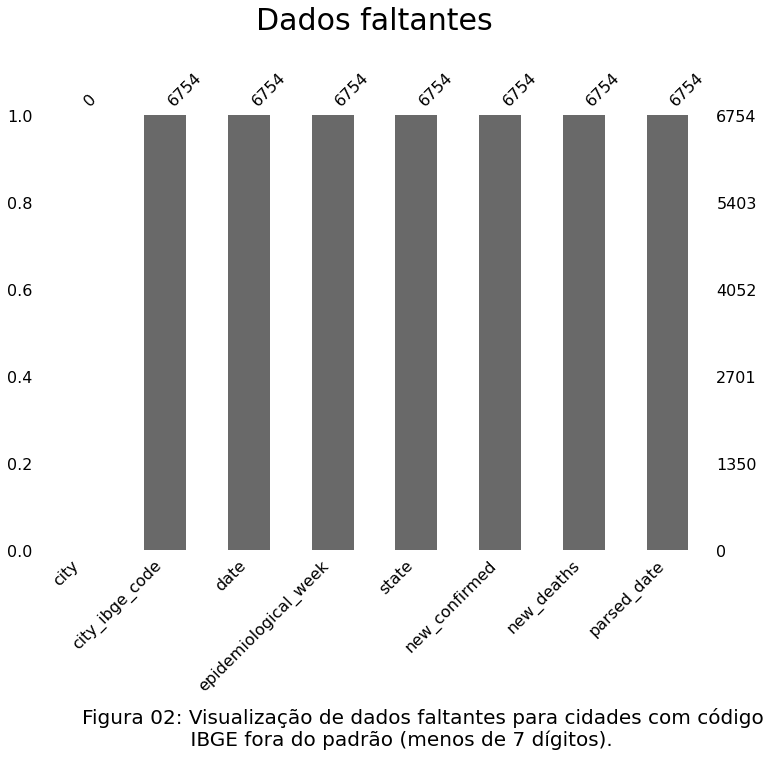

In [381]:
# Visualização do dataframe para cidades com cód. IBGE fora do padrão:
msno.bar(covid19_brasil_io[covid19_brasil_io['city_ibge_code']< 999999],figsize=(12,8))
plt.title('Dados faltantes\n', fontsize=30)

plt.text(0, -.5, '''
Figura 02: Visualização de dados faltantes para cidades com código
                 IBGE fora do padrão (menos de 7 dígitos).
''',
fontsize=20)

É possível verificar que as cidades com código IBGE fora do padrão também são cidades sem nome definido (NaN).

Isso tornou necessário fazer uma conferência cruzada, isto é verificar o nome de cidades com código IBGE NaN.



In [382]:
# Nome das cidades sem código IBGE:
covid19_brasil_io.loc[covid19_brasil_io['city_ibge_code'].isna(), 'city'
                      ].value_counts()

Importados/Indefinidos    4241
Name: city, dtype: int64

Cidades com nome indefinido ("Importados/Indefinidos")



Text(0, -0.5, '\nFigura 03: Visualização de dados faltantes para cidades sem código\n                 IBGE (NaN).\n')

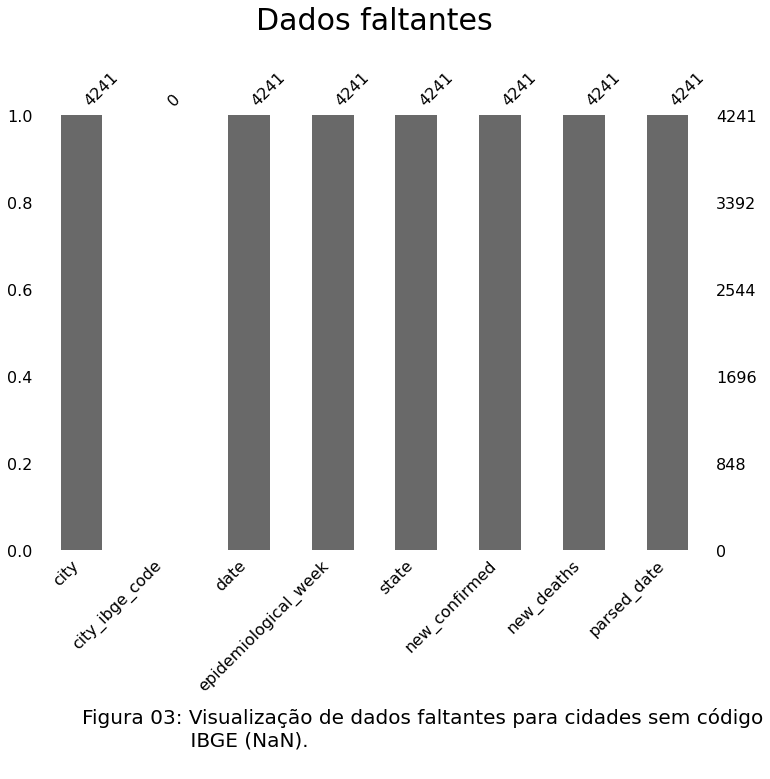

In [383]:
# Código IBGE das cidades com nome "Importados/Indefinidos":
print('Cidades com nome indefinido ("Importados/Indefinidos")\n')
covid19_brasil_io.loc[covid19_brasil_io['city']== 'Importados/Indefinidos', 
                      'city_ibge_code'].value_counts(ascending=False)
msno.bar(covid19_brasil_io[covid19_brasil_io['city']== 'Importados/Indefinidos'],
            figsize=(12,8))
plt.title('Dados faltantes\n', fontsize=30)

plt.text(0, -.5, '''
Figura 03: Visualização de dados faltantes para cidades sem código
                 IBGE (NaN).
''',
fontsize=20)

Com isso pode-se verificar que as cidades sem código IBGE definido também tem como nome "Importados/Indefinidos".

Continuando a avaliação dessas duas colunas, verificou-se o código IBGE das cidades com nome **NaN**.


In [384]:
# Código IBGE das cidades com sem nome:
covid19_brasil_io.loc[covid19_brasil_io['city'].isna(), 
                      'city_ibge_code'].value_counts(ascending=False)

35.0    267
32.0    258
33.0    258
29.0    257
53.0    256
27.0    255
31.0    255
43.0    253
52.0    251
25.0    251
26.0    251
24.0    251
41.0    251
42.0    251
13.0    250
28.0    249
50.0    249
23.0    247
12.0    246
15.0    245
17.0    245
22.0    244
16.0    243
51.0    243
21.0    243
11.0    243
14.0    242
Name: city_ibge_code, dtype: int64

Assim, é possível verificar que as cidades com nome NaN não possuem código IBGE dentro do padrão.

Com essa exploração pode-se concluir que:

- Nenhuma das cidades com código IBGE fora do padrão (não possuem 7 dígitos) possuem nome (**NaN**);
- Todas as cidades sem código IBGE possuem nome indefinido (**Importados/Indefinidos**);

Para entender melhor por que isso ocorre, foi feita uma verificação, na qual foram criados 2 dataframes distintos:

- 1 para os estados contendo todas as informações
- 1 para as cidades eliminando código as linhas sem código IBGE ou com este fora do padrão, bem como sem nome de cidade ou com nome indefinido,

Após isso, foram comparados os valores de mortes e casos confirmados com os resultados de relatórios oficiais.

In [385]:
#### Eliminar linhas indesejadas da coluna de cidades e código IBGE
dados_cidades = covid19_brasil_io[covid19_brasil_io['city'].isna() == False]
dados_cidades = dados_cidades[dados_cidades['city_ibge_code'].isnull() ==False]
dados_cidades = dados_cidades[dados_cidades['city'] != 'Importados/Indefinidos']
dados_cidades = dados_cidades[dados_cidades['city_ibge_code'] >999999]
dados_cidades

city  city_ibge_code  ... new_deaths  parsed_date
0           São Paulo       3550308.0  ...          0   2020-02-25
2           São Paulo       3550308.0  ...          0   2020-02-26
4           São Paulo       3550308.0  ...          0   2020-02-27
6           São Paulo       3550308.0  ...          0   2020-02-28
8           São Paulo       3550308.0  ...          0   2020-02-29
...               ...             ...  ...        ...          ...
1072401    Tocantínia       1721109.0  ...          0   2020-11-17
1072402      Tupirama       1721257.0  ...          0   2020-11-17
1072403    Tupiratins       1721307.0  ...          0   2020-11-17
1072404  Wanderlândia       1722081.0  ...          0   2020-11-17
1072405       Xambioá       1722107.0  ...          0   2020-11-17

[1061438 rows x 8 columns]

In [386]:
#### Calcular mortes por estados para cada dataframe
mortes_por_estado = covid19_brasil_io.groupby('state')['new_deaths'].sum()
mortes_por_cidade = dados_cidades.groupby('state')['new_deaths'].sum()

In [387]:
#### Importar dados oficiais
# Nota: comparou-se os resultados oficiais com os do Google e viu que os do 
# Google estão próximos. Assim, por facilidade utilizaremos os dados do Google
# como os oficiais.
fonte_google = 'https://news.google.com/covid19/map?hl=pt-BR&mid=%2Fm%2F015fr&gl=BR&ceid=BR%3Apt-419'
referencia = pd.read_html(fonte_google, index_col=0, encoding='ISO-8859-1',thousands='.')[0]
col_referencia = ['Total de casos', 'Mortes']
referencia = referencia[col_referencia]

# Mudar os indices para siglas de estado
indice_ref = {'Global': 'Global', 'Brasil': 'BR', 
              'SÃ£o Paulo':'SP', 'Minas Gerais': 'MG', 'Bahia': 'BA',
              'Rio de Janeiro': 'RJ', 'CearÃ¡': 'CE', 'Santa Catarina': 'SC', 
              'GoiÃ¡s': 'GO', 'Rio Grande do Sul': 'RS', 'ParÃ¡':'PA', 
              'ParanÃ¡': 'PR', 'Distrito Federal': 'DF', 'MaranhÃ£o': 'MA', 
              'Pernambuco': 'PE', 'Amazonas': 'AM', 'EspÃ­rito Santo': 'ES', 
              'Mato Grosso': 'MT', 'ParaÃ­ba': 'PB', 'PiauÃ­': 'PI', 
              'Alagoas': 'AL', 'Sergipe': 'SE', 'Mato Grosso do Sul': 'MS',
              'Rio Grande do Norte': 'RN', 'Tocantins': 'TO', 'RondÃ´nia':'RO',
              'Roraima': 'RR', 'AmapÃ¡': 'AP','Acre':'AC'}
referencia.index = referencia.index.map(lambda UF: indice_ref[UF] )

In [388]:
#### Comparar dados por cidade e por município com os dados do Google
compara_mortes = pd.DataFrame()
compara_mortes['Por Cidade'] = mortes_por_cidade/referencia.loc['SP':,'Mortes']
compara_mortes['Por Estado'] = mortes_por_estado/referencia.loc['SP':,'Mortes']
compara_mortes['Referencia'] = referencia.loc['SP':,'Mortes']
print("""Razão da soma das mortes em cada estado, dividido pela morte por estado 
da referência. Cada coluna representa o total de mortes nos estados feito através
da soma por municípios e da soma por Estado.""")
with pd.option_context('display.float_format', '{:.2f}'.format):
    display(compara_mortes)

Razão da soma das mortes em cada estado, dividido pela morte por estado 
da referência. Cada coluna representa o total de mortes nos estados feito através
da soma por municípios e da soma por Estado.


Por Cidade  Por Estado  Referencia
AC        1.02        2.04         693
AL        0.99        2.00        2301
AM        0.99        1.99        4723
AP        0.99        1.99         782
BA        0.99        2.00        7989
CE        1.00        2.00        9448
DF        0.92        2.00        3837
ES        0.99        2.00        4037
GO        1.00        2.01        6071
MA        1.00        2.00        4195
MG        0.98        2.00        9531
MS        0.97        1.97        1697
MT        0.54        1.56        4001
PA        1.00        2.00        6838
PB        1.00        2.00        3216
PE        1.00        2.00        8854
PI        1.01        2.01        2541
PR        0.87        1.88        5758
RJ        0.95        1.95       21474
RN        0.98        1.99        2643
RO        1.00        2.00        1508
RR        0.97        1.98         709
RS        0.98        1.98        6314
SC        1.00        2.00        3370
SE        1.00        2.00        2263
SP        1.00        2.00       40749
TO        1.00        2.00        1141

In [389]:
# Imprimir a razão da soma total de mortes nos municípios pela soma total de mortes nos estados
print(''' Mortes de Municípios  
---------------------- =  {:.2f}%
  Mortes de Estados '''.format(
      mortes_por_cidade.sum()/mortes_por_estado.sum()*100))

print('')

# Dados "oficiais"
print('Dados "oficiais" pesquisados no Google:                   {:{},}'.format(
referencia.loc['BR', 'Mortes'],9))
# Dados vindos de municípios
print('Novas mortes confirmadas usadando os dados de municípios: {:{},}'.format(
      mortes_por_cidade.sum(),9))
# Dados vindo de estados
print('Novas mortes confirmadas usadando os dados de Estados:    {:{},}'.format(
mortes_por_estado.sum(),9))

 Mortes de Municípios  
---------------------- =  49.20%
  Mortes de Estados 

Dados "oficiais" pesquisados no Google:                     166,699
Novas mortes confirmadas usadando os dados de municípios:   162,241
Novas mortes confirmadas usadando os dados de Estados:      329,733


Com essa avaliação pode-se perceber que os valores de mortes por município estão mais próximos dos valores de referência, enquanto que as mortes por estado representam o dobro desse valor.

Ao verificar as colunas do dataframe original, percebeu-se que as linhas que foram excluídas para formar o dataframe de mortes por cidade estavam com registro **state** na coluna **place_type**, enquanto que as que ficaram apresentava **place_type** igual a **city**.

In [390]:
covid19_brasil_io_original[covid19_brasil_io_original['place_type']=='state']

city  city_ibge_code        date  ...  state  new_confirmed  new_deaths
1        NaN            35.0  2020-02-25  ...     SP              1           0
3        NaN            35.0  2020-02-26  ...     SP              0           0
5        NaN            35.0  2020-02-27  ...     SP              0           0
7        NaN            35.0  2020-02-28  ...     SP              1           0
9        NaN            35.0  2020-02-29  ...     SP              0           0
...      ...             ...         ...  ...    ...            ...         ...
1072428  NaN            43.0  2020-11-17  ...     RS           3479          71
1072429  NaN            42.0  2020-11-17  ...     SC           5178          40
1072430  NaN            28.0  2020-11-17  ...     SE            127           3
1072431  NaN            35.0  2020-11-17  ...     SP           8698         173
1072432  NaN            17.0  2020-11-17  ...     TO              0           0

[6754 rows x 18 columns]

In [391]:
covid19_brasil_io_original[covid19_brasil_io_original['place_type']=='city']

city  city_ibge_code  ... new_confirmed  new_deaths
0           São Paulo       3550308.0  ...             1           0
2           São Paulo       3550308.0  ...             0           0
4           São Paulo       3550308.0  ...             0           0
6           São Paulo       3550308.0  ...             1           0
8           São Paulo       3550308.0  ...             0           0
...               ...             ...  ...           ...         ...
1072401    Tocantínia       1721109.0  ...             0           0
1072402      Tupirama       1721257.0  ...             0           0
1072403    Tupiratins       1721307.0  ...             0           0
1072404  Wanderlândia       1722081.0  ...             0           0
1072405       Xambioá       1722107.0  ...             0           0

[1065679 rows x 18 columns]

Assim, a forma correta de dividir os dados vindos das secretarias de saúde de cada estado dos apresentados por município é através da coluna **place_type**.

Após corrigir os dataframes, passou-se a comparar a coerência dos dados vindos das secretarias de estado e municípios, a fim de definir o grau de refinamento que o estudo poderia avançar.

In [392]:
#### Construir DF de estados e municípios a partir do flag place_type
#adicionar 'place_type' nas colunas desejadas
colunas.append('place_type')

In [393]:
# Reconstruir os dados covid19_brasil_io
covid19_brasil_io = covid19_brasil_io_original[colunas]
# Reconstruir os dados_cidades
dados_cidades = covid19_brasil_io[covid19_brasil_io['place_type']=='city']
dados_estados = covid19_brasil_io[covid19_brasil_io['place_type']=='state']

In [394]:
#### Comparar novamente as mortes por UF usando a soma de mortes com flag 'city'
#### e flag 'state' no 'place_type'
# Somar mortes
mortes_por_estado = dados_estados.groupby('state')['new_deaths'].sum()
mortes_por_cidade = dados_cidades.groupby('state')['new_deaths'].sum()

# montar df de comparação
compara_mortes = pd.DataFrame()
compara_mortes['Por Cidade'] = mortes_por_cidade/referencia.loc['SP':,'Mortes']
compara_mortes['Por Estado'] = mortes_por_estado/referencia.loc['SP':,'Mortes']
compara_mortes['Diferença'] = (mortes_por_estado - mortes_por_cidade)

with pd.option_context('display.float_format', '{:.2f}'.format):
    display(compara_mortes.sort_values('Por Cidade'))

Por Cidade  Por Estado  Diferença
MT        0.55        1.01       1852
PR        0.88        1.00        674
RJ        0.95        1.00       1012
MS        0.97        1.00         52
RR        0.98        1.00         14
RS        0.98        1.00         95
RN        0.99        1.00         45
AP        0.99        1.00          5
AM        0.99        1.00         24
RO        1.00        1.00          7
MG        1.00        1.00         27
BA        1.00        1.00         22
AL        1.00        1.00          6
MA        1.00        1.00          8
PE        1.00        1.00         16
PB        1.00        1.00          5
SE        1.00        1.00          3
CE        1.00        1.00          5
DF        1.00        1.00          0
SP        1.00        1.00          0
ES        1.00        1.00          0
SC        1.00        1.00          0
TO        1.00        1.00          0
PA        1.00        1.00          0
GO        1.00        1.00          0
PI        1.01        1.01          0
AC        1.02        1.02          1

A tabela acima apresenta a soma de mortes para cada estado obtida através da soma por município ("Por Cidade"), pela soma por estado ("Por Estado") e a diferença de mortes (Estado - Municípios)

Ao observar a coluna de estados, percebe-se que a fonte do Brasil.io está bem atualizada, com pequenas variações (+/- 1%). 

Contudo, alguns valores vindos da soma de municípios estão destonantes do total vindo dos estados, como é o caso de MT, RJ, ES, PR. Para outros estados os valores são muito próximos ou exatamente os mesmos.

Para entender melhor a diferença absoluta, decidiu-se plotar um gráfico com essa informação.


Text(100, 1, '*Estados com diferença igual a zero não são mostrados')

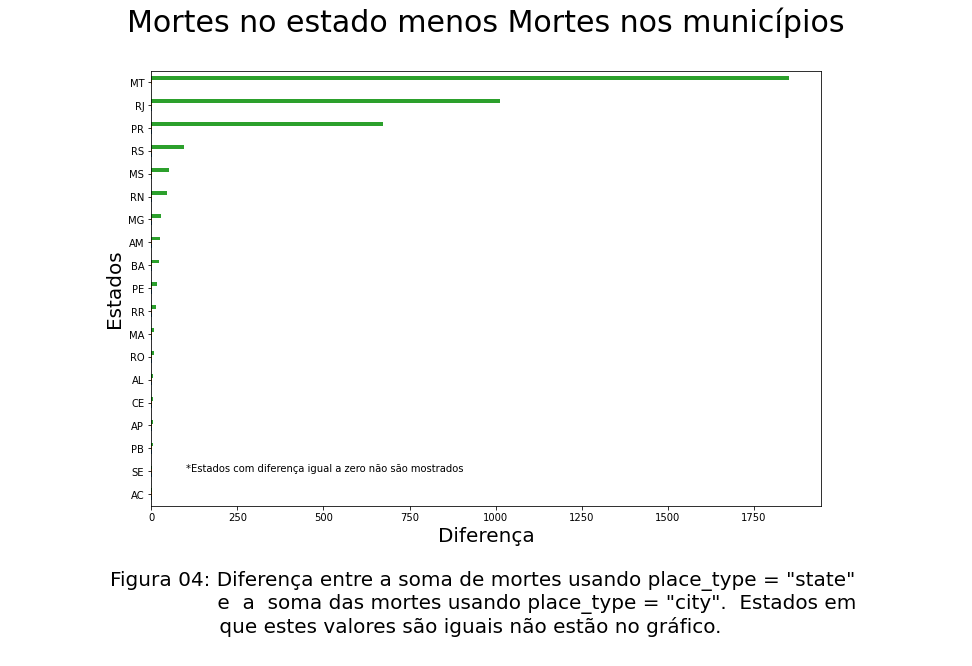

In [395]:
ax = compara_mortes[compara_mortes['Diferença']
                    > 0].sort_values('Diferença'
                                     ).plot.barh(figsize=(12,8), )
ax.set_title('''Mortes no estado menos Mortes nos municípios
''', fontsize=30)
ax.set_xlabel('''Diferença

Figura 04: Diferença entre a soma de mortes usando place_type = "state" 
                                 e  a  soma das mortes usando place_type = "city".  Estados em                 
                                 que estes valores são iguais não estão no gráfico.                                      
''', fontsize=20)
ax.set_ylabel('Estados', fontsize=20)
ax.get_legend().set_visible(False)
plt.text(100,1,'*Estados com diferença igual a zero não são mostrados')

Com a Figura 04 pode-se perceber que o MT é o estado com a maior diferença, concentrando cerca de metade de toda a diferença entre dados de estados e municípios.

Com isso, entende-se que é possível fazer uma avaliação de granulometria profunda (chegando até os municípios) usando apenas estados que possuem diferença entre soma de mortes por cidade e soma de mortes do estado menor que 1% (preferencialmente quando não há diferença). Para os demais, só será possível avaliar os dados estaduais.



## Dados Kaggle
A plataforma Kaggle é uma comunidade de ciência de dados que possui alguns treinamentos e desafios para os membros. Além disso, essa plataforma também permite que membros compartilhem dados que são utilizados por outros membros em suas análises.

Por conta disso, a plataforma [Kaggle](https://www.kaggle.com/amandalk/registered-deaths-brazil) possui os dados compilados de registros de mortes em cartório no Brasil a partir de 1970. Esses dados foram disponibilizados por um usuário desta plataforma e foi usado neste estudo.

Da mesma forma que foi feito para os dados de COVID-19, também foram avaliadas as informações presentes nos dados de cartório: sua integridade e possibilidade de serem usados.

A primeira verificação é a existência de informações faltantes no conjunto de dados:


Existem valores NaN na tabela de obtos?
year   month  state  deaths
False  False  False  False     15030
dtype: int64



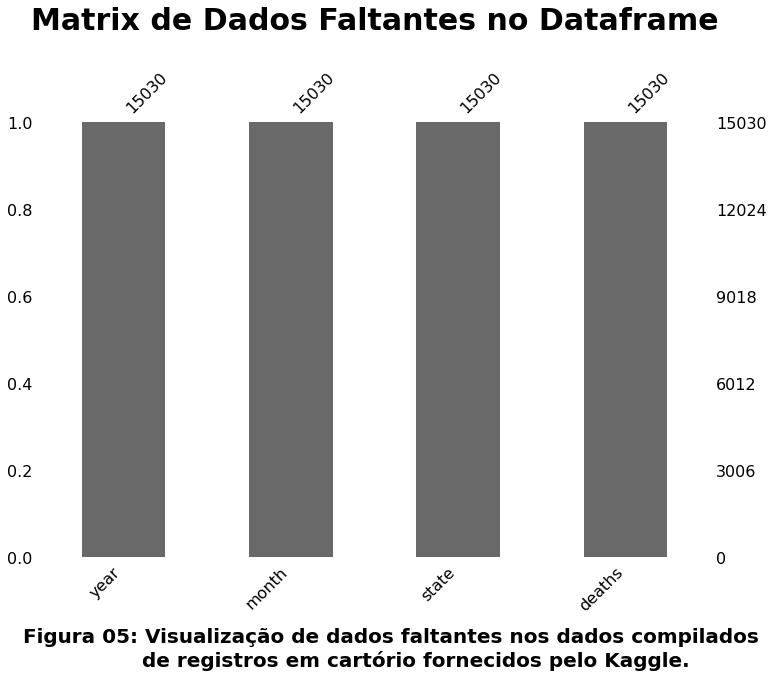

In [396]:
#### Avaliação dos dados de mortes registradas em cartório presentes no Kaggle
# Importar dados
kaggle = pd.read_csv('/content/drive/MyDrive/Bootcamp_Alura/Modulo_01/archive.zip')

# Visualizar linhas faltantes
msno.bar(kaggle, figsize=(12,8))
plt.title('''Matrix de Dados Faltantes no Dataframe
''', fontsize=30, fontweight='bold')
plt.text(-.6,-.3,
         '''
Figura 05: Visualização de dados faltantes nos dados compilados 
                 de registros em cartório fornecidos pelo Kaggle.
''', 
           fontsize=20, fontweight='bold')

# contar valores nulos:
print('Existem valores NaN na tabela de obtos?')
print(kaggle.isna().value_counts())
print('')

É possível verificar que não há informações faltantes em nenhuma coluna do DataFrame.

O próximo passo é verificar que tipo de informação existe em cada coluna

In [397]:
# Verificar o tipo de dado apresentado em cada coluna
kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15030 entries, 0 to 15029
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    15030 non-null  int64 
 1   month   15030 non-null  int64 
 2   state   15030 non-null  object
 3   deaths  15030 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 469.8+ KB


Apenas a coluna "state" é object, conforme esperado, visto que esta coluna contém o "Estado" de registro do óbito.

In [398]:
# Verificar conteudo de dados:
kaggle['deaths'].isna().sum()

0

Com essa verificação, foi possível constatar que não há dados faltantes nas colunas deste arquivo.

Um ponto importante é criar uma coluna de data concatenando o ano e mês em formato **datetime**. Isso facilitará a geração de gráficos em série temporal.

Assim, é possível realizar uma verificação geral dos dados para entender o comportamento das mortes ao longo dos anos. 

A princípio espera-se que a quantidade de mortes de um ano para o outro apresente uma taxa quase constante de crescimento, sem grandes variações, isto é o número de mortes no ano **[N+1]** comparado com o número de mortes do ano **[N]** devem ser muito próximos, exceto quando há algum evento adverso (guerras, crises sanitárias ou outros eventos que levem ao aumento de mortalidade).

Com esse princípio em mente, o esperado é que, além de um valor quase constante do número de mortes ano-após-ano, também exista uma taxa de crescimento quase linear. Isto é, também espera-se que a inclinação da curva de número de mortes seja quase constante.

Além disso, em situações naturais (sem nenhum evento adverso), é esperado que haja uma queda da taxa de mortalidade (a curva de mortes passaria a ter inclinação negativa), devido à melhora da qualidade de vida e consequente maior expectativa de vida das pessoas.

Com isso em mente, essas duas características dos dados foram verificadas.

In [399]:
#### Obter as mortes por mês para todo o período
kaggle['date'] = kaggle['year'].astype(str)+kaggle['month'].astype(str)
kaggle['date'] = pd.to_datetime(kaggle['date'], format='%Y%m')
mortes_cartorio = kaggle.groupby(['date'])['deaths'].sum()

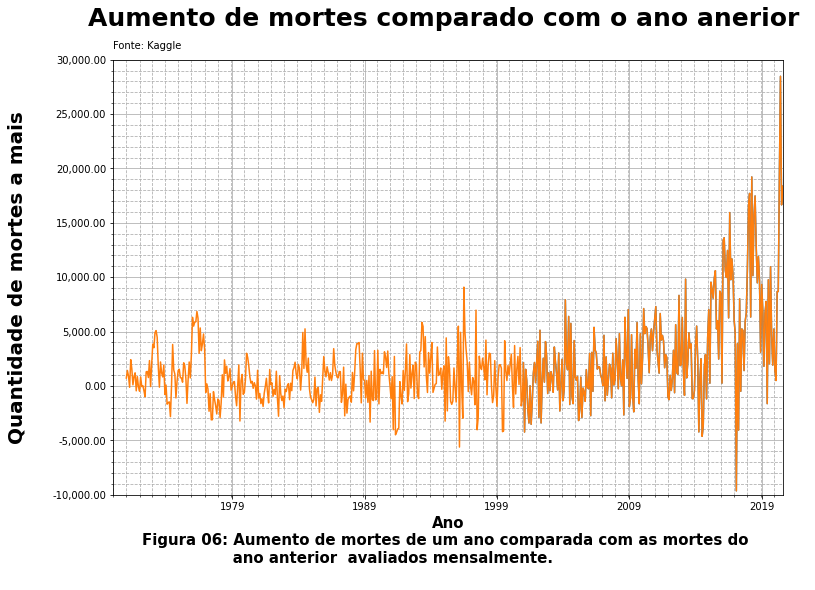

In [400]:
#### Visualizar a diferença de mortes de ano a ano
## Calcular a diferença de mortes de um ano ao outro (ex.: mortes em jan/2010 - mortes em jan/2009)
mortes_cartorio.diff(12)['2001-01-01':].plot(figsize=(12,8))

## Gerar gráfico de diferenças
ax = mortes_cartorio.diff(12).plot(figsize=(12,8))

# ajustar ticks do eixo x
base = datetime.datetime(1970, 1, 1)
delta = datetime.timedelta(weeks=40, days=84, hours=23,
                  minutes=50, seconds=600)
arr = np.array([base + delta*i for i in range(51)])
ax.set_xticks(arr, minor=True)

# ajustar limite do eixo x
ax.set_xlim(mortes_cartorio.index[0], mortes_cartorio.index[-1])
ax.grid(which='minor', axis='x', linestyle='--')

# Ajustar numeros do eixo y
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# ajustar marcador do eixo y
ax.set_yticks(np.arange(-10000,30000.1,1000), minor=True)
ax.set_ylim(-10000,30000)
ax.grid(which='minor', axis='y', linestyle='--')
# ajustar gráfico
plt.title('Aumento de mortes comparado com o ano anerior \n', fontsize=25, fontweight='bold')
plt.xlabel('''Ano
Figura 06: Aumento de mortes de um ano comparada com as mortes do 
           ano anterior  avaliados mensalmente.                                
''',fontsize=15, fontweight='bold')
plt.ylabel('''Quantidade de mortes a mais
''',fontsize=20, fontweight='bold')

plt.text(0, 31000, 'Fonte: Kaggle')

plt.grid()


A imagem acima mostra o aumento de mortes por mês de um ano comparado com as mortes do mesmo mês do ano anterior. Isto é, as mortes do mês "m" do ano n foram comparadas com as mortes do mês "m" do ano n-1.  Para facilitar o entendimento pode-se usar um exemplo:

    Dif = [Mortes Jan/2010] - [Mortes Jan/2009]

Assim como foi feito para o cálculo de **Dif** acima, este processo foi feito para toda a série de dados.

O comportamento que foi citado como esperado é demonstrado até cerca de 2010. Daí para frente há uma divergência da diferença de mortes. Isso demanda uma exploração maior dos dados.

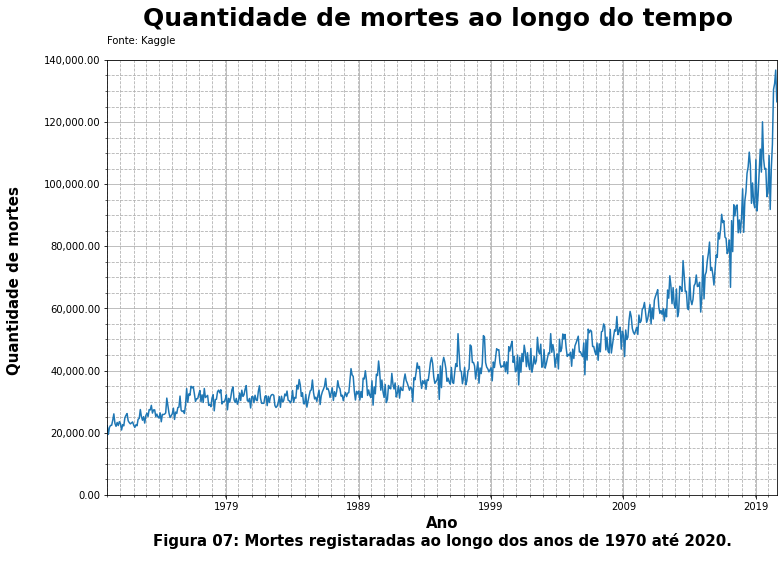

In [401]:
#### Visualizar do número de mortes de ano
### Gerar gráfico de diferenças
ax = mortes_cartorio.plot(figsize=(12,8))

## ajustar eixo x
#ticks
base = datetime.datetime(1970, 1, 1)    
delta = datetime.timedelta(weeks=40, days=84, hours=23,
                  minutes=50, seconds=600)
arr = np.array([base + delta*i for i in range(51)])
ax.set_xticks(arr, minor=True)  
# limite
ax.set_xlim(mortes_cartorio.index[0], mortes_cartorio.index[-1])
#grid
ax.grid(which='minor', axis='x', linestyle='--')

## Ajustar numeros do eixo y
# foramtação
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
# ticks
ax.set_yticks(np.arange(0,140e3,5e3), minor=True)
# limite
ax.set_ylim(0,140000)
ax.grid(which='minor', axis='y', linestyle='--')
# ajustar gráfico
plt.title('Quantidade de mortes ao longo do tempo \n', fontsize=25, fontweight='bold')
plt.xlabel('''Ano
Figura 07: Mortes registaradas ao longo dos anos de 1970 até 2020.
''',fontsize=15, fontweight='bold')
plt.ylabel('Quantidade de mortes \n',fontsize=15, fontweight='bold')
plt.text(0, 145000, 'Fonte: Kaggle')
plt.grid()

Diferente do que era esperado, a quantidade de mortes ano após ano apresentou uma grande variação nos últimos anos da série (entre 2015 e 2020), acima dos valores de anos anteriores (1970 até aproximadamente 2015), como pode ser visto na Figura 06.

Essa mudança  pode também ser percebida na curva de quantidade de mortes, Figura 07, a qual é possível verificar uma mudança de taxa de crescimento da curva após o ano citado. 

Essa mudança faz com que seja necessário comparar os dados armazenados no Kaggle com outros de fontes diferentes. Para isso, serão usados os dados de [Registro de Cartório](https://transparencia.registrocivil.org.br/registros) do portal da transparência.

In [402]:
#Carregar dados de registro de cartórios
cartorio = pd.read_excel('/content/drive/MyDrive/Bootcamp_Alura/Modulo_01/obtos_cartorios.xlsx', skiprows=2,
                         index_col=0).T
cartorio.index = pd.to_datetime(cartorio.index, format='%Y/%m')

In [403]:
# Avaliação do DataFrame
cartorio.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71 entries, 2015-01-01 to 2020-11-01
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Acre                 71 non-null     int64
 1   Alagoas              71 non-null     int64
 2   Amapá                71 non-null     int64
 3   Amazonas             71 non-null     int64
 4   Bahia                71 non-null     int64
 5   Ceará                71 non-null     int64
 6   Distrito Federal     71 non-null     int64
 7   Espírito Santo       71 non-null     int64
 8   Goiás                71 non-null     int64
 9   Maranhão             71 non-null     int64
 10  Mato Grosso          71 non-null     int64
 11  Mato Grosso do Sul   71 non-null     int64
 12  Minas Gerais         71 non-null     int64
 13  Paraná               71 non-null     int64
 14  Paraíba              71 non-null     int64
 15  Pará                 71 non-null     int64
 16  Pernambu

In [404]:
# Criar uma coluna de soma de mortes por período para todo o Brasil
cartorio['Brasil'] = cartorio.sum(axis=1)

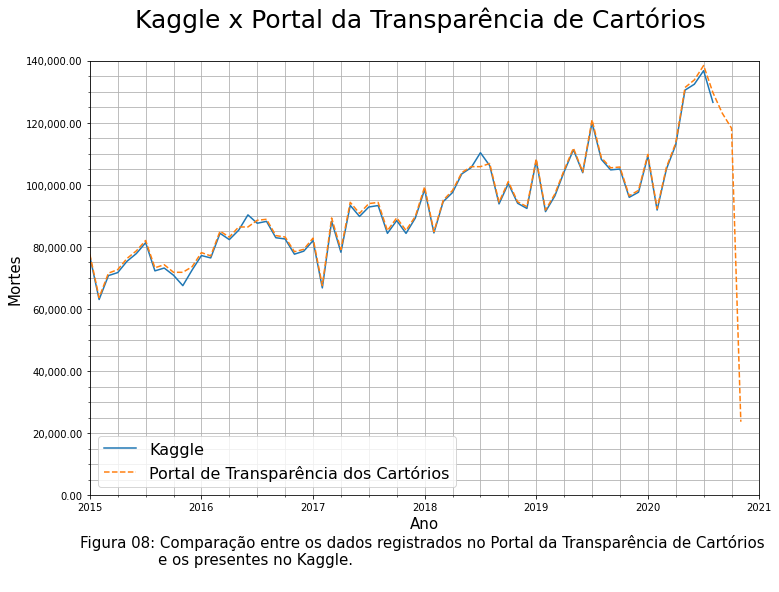

In [405]:
# Comparar dados do portal de transparência de registro de cartórios com o Kaggle
ax = mortes_cartorio['2015-01-01':].plot(figsize=(12,8), label='Kaggle')
cartorio['Brasil'].plot(linestyle = '--', label='Portal de Transparência dos Cartórios')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_yticks(np.arange(0,150000, 5000), minor=True)
ax.set_ylim(0,140000)
ax.set_xlim('2015-1-1','2021-1-1')
ax.grid(which='minor', axis='both')
plt.legend(fontsize=16, loc='lower left')
plt.title('Kaggle x Portal da Transparência de Cartórios \n', fontsize=25)
ax.set_xlabel('''Ano
Figura 08: Comparação entre os dados registrados no Portal da Transparência de Cartórios 
e os presentes no Kaggle.                                                                       
''', fontsize=15)
ax.set_ylabel('Mortes', fontsize=15)
plt.grid()

Com essa comparação, pode-se dizer que os dados de cartórios registrados no Kaggle são confiáveis para a análise que pretende ser feita apesar da mudança de taxa de crescimento de mortalidade vista nos gráficos das Figura 06 e Figura 07.

Além dessa fonte de dados, há ainda dados do site [SIDRA](https://sidra.ibge.gov.br/tabela/2684) do IBGE. Neste portal é possível distinguir a quantidade de mortes naturais das provocadas. É importante ter essa distinção, visto que no período da pandemia houve uma redução da circulação de pessoas, resultando em menor número de acidentes e outros tipos de mortes relacionadas ao deslocamento de pessoas.

Os dados do SIDRA possuem uma limitação importante para a análise neste estudo, ele apresenta valores até 2018, apenas. Contudo, é possível utilizar estes dados para projetar a quantidade de mortes naturais esperadas.

In [406]:
#### Carregar dados do portal SIDRA
sidra = pd.read_excel(
                      '/content/drive/MyDrive/Bootcamp_Alura/Modulo_01/Tabela 2684.xlsx','Tabela', 
                      skiprows=8,  index_col=0, skipfooter=1, 
                      )
sidra

Total  Natural  Violenta Outra  Ignorado
2003  1005882   893897    111241     -       744
2004  1025891   915138    109766     -       987
2005  1010052   896618    108456     -      4978
2006  1037504   920315    106360     -     10829
2007  1050408   933662    109266     -      7480
2008  1074889   956228    108558     -     10103
2009  1098384   983840    111976     -      2568
2010  1132701  1008145    112077     -     12479
2011  1163740  1033201    113496     -     17043
2012  1172443  1039602    120482     -     12359
2013  1195913  1059814    119675     -     16424
2014  1208587  1070644    123385   ...     14558
2015  1244558  1105716    116620   ...     22222
2016  1288856  1144182    118313   ...     26361
2017  1292297  1142426    118119   ...     31752
2018  1298579  1154774    108052   ...     35753

In [407]:
# Converter o index do SIDRA para datetime
sidra.index = pd.to_datetime(sidra.index,format='%Y')

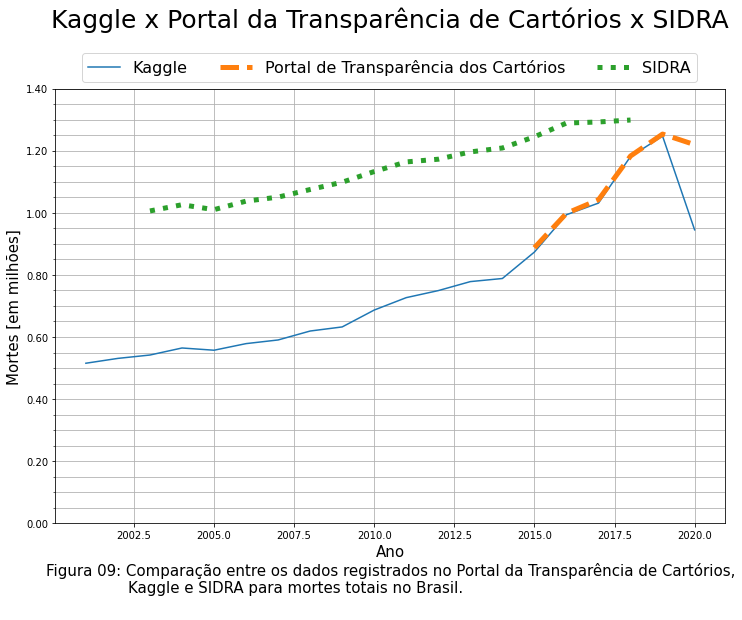

In [408]:
#### Comparar dados do SIDRA com Kaggle e Portal Transparência de Cartórios
fator = 1e6

ax = (mortes_cartorio.groupby(mortes_cartorio.index.year).sum()/fator
      ).loc['2000-01-01':
            '2020-01-01'].plot(figsize=(12,8), label='Kaggle')

(cartorio.groupby(cartorio.index.year)['Brasil'].sum()/fator).plot(linestyle = '--', 
                                                                   label='Portal de Transparência dos Cartórios',
                                                                   linewidth=5)

(sidra.groupby(sidra.index.year)['Total'].sum()/fator).plot(linestyle='dotted', 
                                                            label='SIDRA',
                                                            linewidth=5)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_yticks(np.arange(0,1.4, .05), minor=True)
ax.set_ylim(0,1.4)

# CORRIGIR OS INDICES DO EIXO X
ax.format_xdata =  mdates.DateFormatter('%Y')

plt.legend(fontsize=16, bbox_to_anchor=(0.97, 1.1), ncol=3)
plt.title('Kaggle x Portal da Transparência de Cartórios x SIDRA\n\n', fontsize=25)
ax.set_xlabel('''Ano
Figura 09: Comparação entre os dados registrados no Portal da Transparência de Cartórios,
Kaggle e SIDRA para mortes totais no Brasil.                                        
''', fontsize=15)
ax.set_ylabel('Mortes [em milhões]', fontsize=15)

ax.grid(which='minor', axis='both')
plt.grid()

Apesar de a informação proveniente do portal SIDRA poder agregar muito para o estudo, seus dados divergem significativamente das outras bases, sendo que uma delas é a fonte oficial de registro de cartórios. Dessa forma, os dados do SIDRA não serão utilizados neste estudo.

Por fim, esta exploração demostrou que a avaliação dos dados da comunidade Kaggle são confiáveis para dar continuidades aos estudos.

# Teste de Hipótese

Até este momento foi apresentada a avaliação feita sobre os dados que foram utilizados neste estudo. A partir de agora serão apresentados os testes realizados para validar a hipótese base deste estudo:

    HIPÓTESE
        O vírus SARS-COV-2 causou um aumento de mortes no Brasil no ano de 
        2020 e este montante de mortes em excesso é maior que o apresentado
        pelos órgãos de controle.

Para poder avaliar essa hipótese, foram feitas previsões de mortes para o ano de 2020 caso não houvesse a COVID-19 a partir de projeções usando como base os dados de mortes registradas em cartório dos 5 anos anteriores (Janeiro de 2015 até Dezembro de 2019).

Idealmente, caso os dados do SIDRA estivessem coerentes com os de registro de cartórios, o processo para determinar o excesso de mortes seria:

1.   Separar apenas as mortes devido a causas naturais das de outros fatores
2.   Realizar previsão de mortes naturais para o ano de 2020 utilizando dados de anos anteriores
3.   Descontar o valor de mortes previstas das de mortes ocorridas

Uma vez que esses dados não estão confiáveis, decidiu-se fazer um processo reduzido, no qual não há a separação de mortes naturais das de outros fatores:

1.  Realizar previsão de mortes totais para o ano de 2020 utilizando dados de anos anteriores
2.   Descontar o valor de mortes previstas das de mortes ocorridas

Assim, essa diferença entre mortes projetadas para mortes reais será o que chamamos de mortes em excesso.

        Mortes em Excesso = [Mortes ocorridas] - [Mortes Previstas]

Um ponto importante para se destacar é que neste estudo não serão utilizados métodos fora do pacote Pandas do Python. Poderiam ser usados métodos de machine learning ou interpolação de dados presentes no Scipy e numpy. Contudo, por questão de tempo disponível para este estudo esses métodos não foram incluídos.


## Estimativa pela interpolação da média Móvel

A primeira etapa para determinar as mortes em excesso foi definir o modelo de previsão de mortes para o ano de 2020.

Um método escolhido para projetar as mortes de um dado ano é a interpolação. A interpolação consiste em representar os valores de uma curva com um polinômio **F(x)**:

    F(x) = a + bx + cx²+dx³+...

A ordem do polinômio é a maior potência utilizada neste. Polinômios de ordem 2 possuem x² como maior potência, já polinômios de ordem 3 possuem x³.

Assim, com este método, tetou-se obter uma função que representasse os dados de média móvel de mortes ocorridas. Para validar este modelo pode-se fazer uma projeção de mortes para um ano conhecido que não teve os impactos da COVID19.

As etapas de validação foram:
- Determinar a ordem do polinômio escolhido
- Determinar a quantidade de meses utilizados na média móvel
- Calcular o erro do modelo escolhido



In [409]:
#### Criar uma versão genérica da função que faz previsão de mortes por média móvel
def preve_mortes(dado, 
                 i_ref, f_ref, 
                 i_prev, f_prev, 
                 p_roll=12,
                 mod=1e3):
    """
Esta função prevê a curva de média móvel de mortes de um período específico a 
partir de dados de períodos anteriores.

Parâmetros:
    dado:   - pandas.DataFrame()
            - DataFrame contendo os dados que serão utilizados
              Nota:
                - o índice do DataFrame deve conter valores no formato 
                datetime64[ns]

    i_ref:  - datetile
            - Data desejada para o início do período de referência para 
            interpolação
    
    f_ref:  - datetile
            - Data desejada para o final do período de referência para 
            interpolação

    i_prev: - datetile
            - Data desejada para o início do período de previsão para 
            interpolação
    
    f_prev: - datetile
            - Data desejada para o final do período de previsão para 
            interpolação
    
    p_roll: - int
            - Período desejada para realizar a projeção;
            Nota: 
                - Valor padrão = 12
    
    mod:    - float
            - Modificador dos valoresdentro de dado. Este número é utilizado para
            dividir todos os valores dentro do DataFrane
            Nota: 
                - Valor padrão = 1e3

Resultado:
    prev    - pandas.DataFrame()
            - Os resultados das previsões são retornados na forma de 
            dataframe contendo as previsões realizadas utilizando os métodos
            a seguir:
                - pandas.DataFrame.interpolate -> Linear
                - pandas.DataFrame.interpolate -> spline (ordem = 1)
                - pandas.DataFrame.interpolate -> spline (ordem = 2)
                - pandas.DataFrame.interpolate -> spline (ordem = 3)
                - pandas.DataFrame.interpolate -> spline (ordem = 4)

    err     - pandas.DataFrame()
            - Os erros dos métodos de previsão baseados no método da raiz das 
            diferenças quadradas, que consiste em calcular a diferença entre o
            quadrado do valor previsto e do real e tirar a raiz quadrada deste.

                SRE = ((val. real)**2 - val. previsto)**(0.5)
                
"""
# Cálculo da média móvel e desvio padrão
    media = dado.rolling(p_roll).mean()/mod
    std = dado.rolling(p_roll).std()/mod

# construir df com os dados
    prev = pd.DataFrame()
    err = pd.DataFrame()

    prev['Completo'] = media[i_ref:]    # Periodo original completo a partir da data referencia original
    prev[str(i_ref.year)+'-'+ str(f_ref.year)] = media[i_ref:f_ref] # dados do período de referencia
    prev[str(i_prev.year)+' Real'] = media[i_prev:f_prev]   # Dados do período o qual se deseja comparar

# Projeção linear de mortes no ano
    prev['Previsto - "linear"'
         ] = prev[prev.columns[1]
                  ].interpolate(method='linear')[i_prev:f_prev]

    for i in range(1,5):
        prev['Previsto - "spline" Ordem={}'.format(i)
             ] = prev[prev.columns[1]
                      ].interpolate(method='spline', order=i
                                               )[i_prev:f_prev]
        err['Erro - "spline" Ordem={}'.format(i)
            ] = ((prev[str(i_prev.year)+' Real'] -
                  prev['Previsto - "spline" Ordem={}'.format(i)])**2)**0.5

    return prev, err

Após criada a função de interpolação, faz-se necessário validar o método com dados conhecidos. 

Para isso serão usados os dados entre os anos  2018 e 2019.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this w

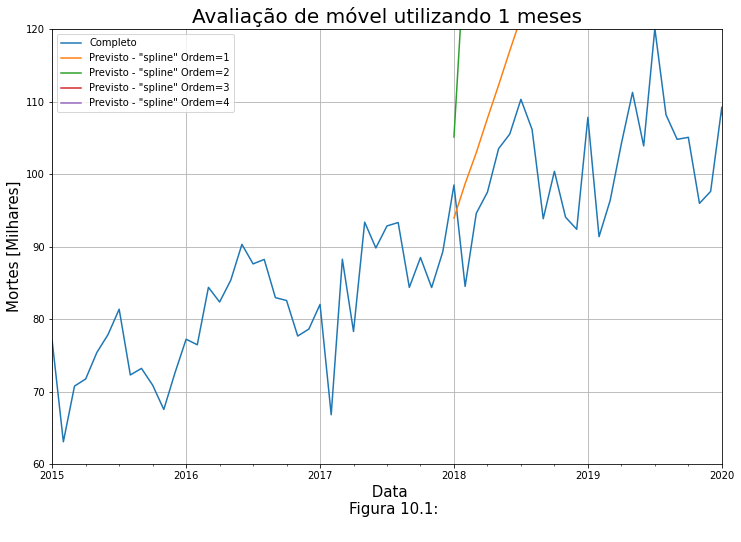

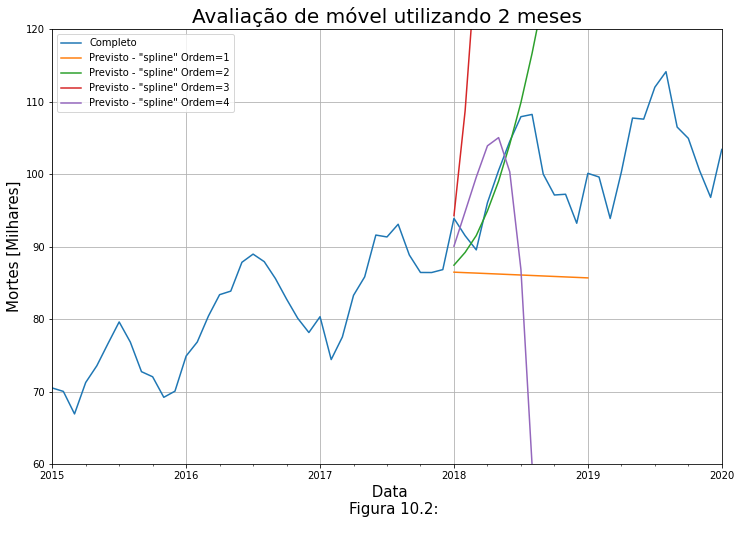

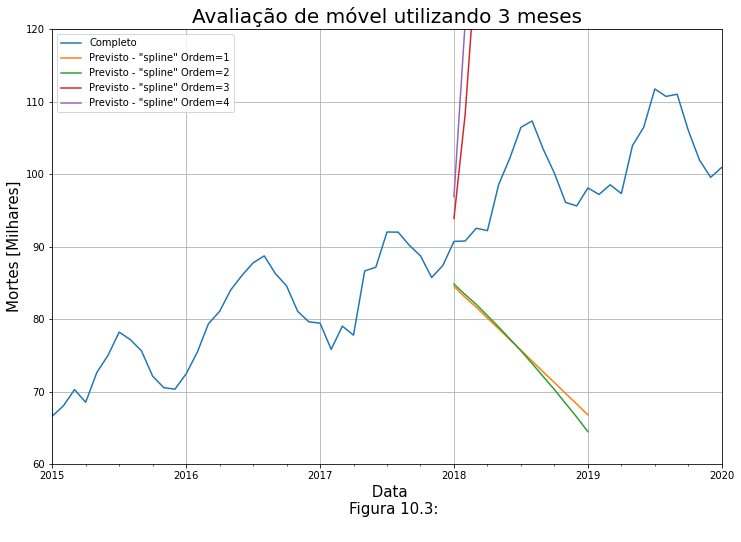

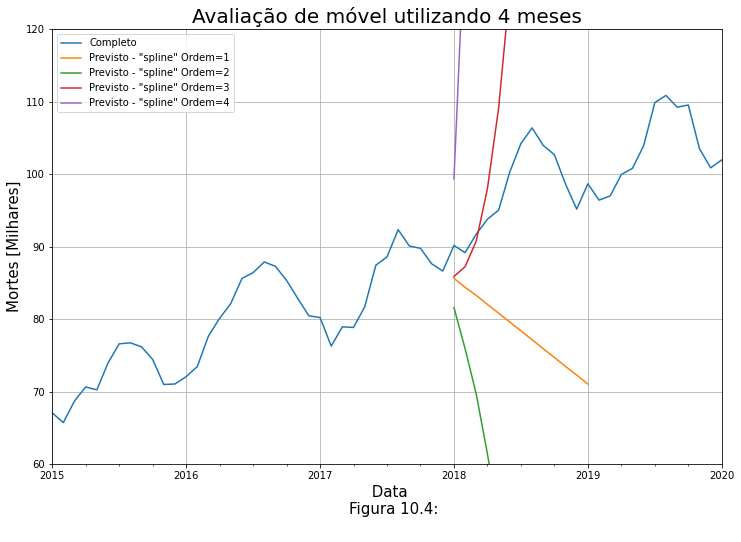

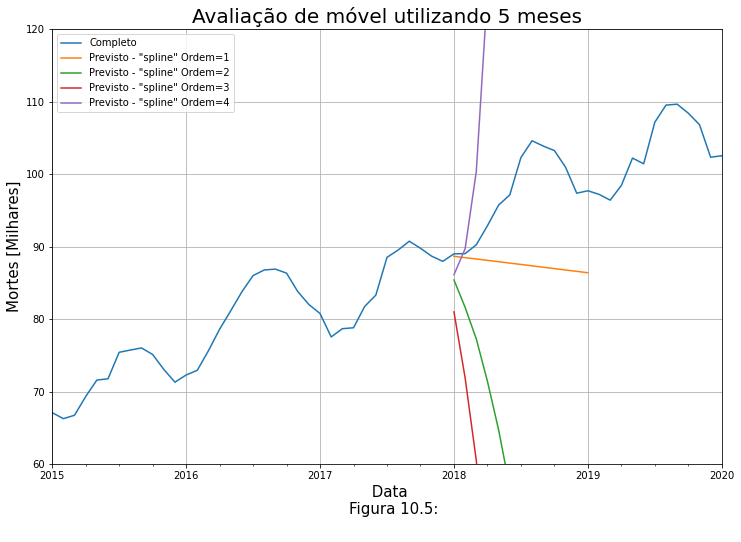

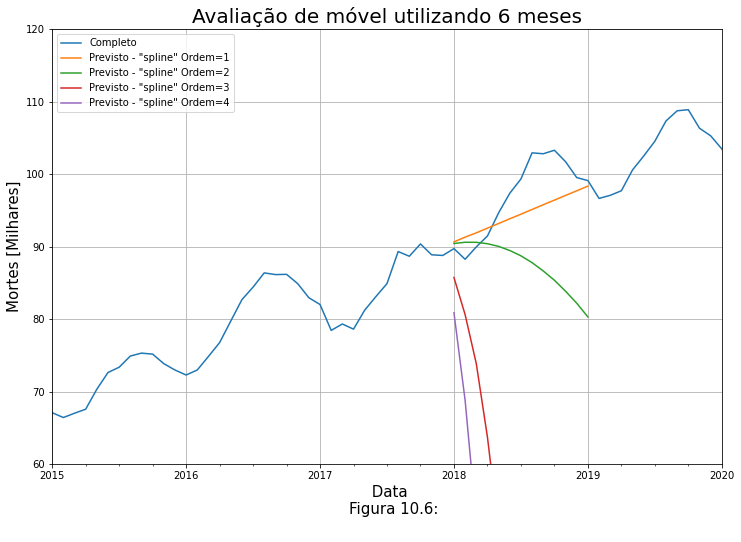

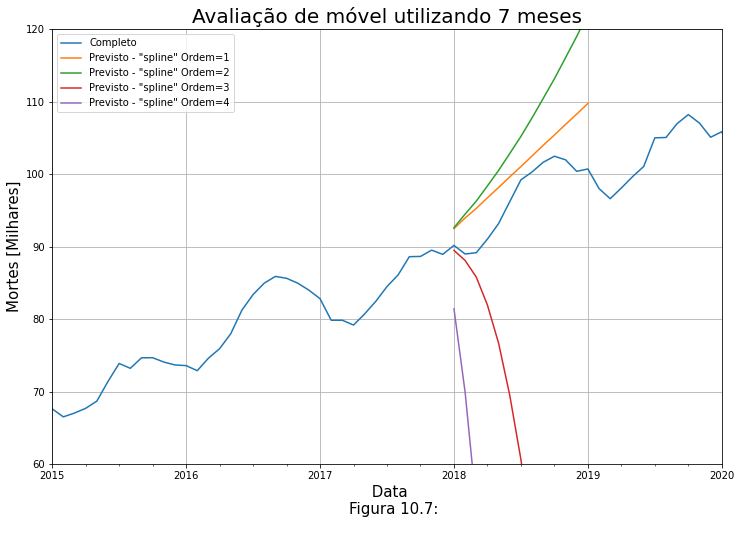

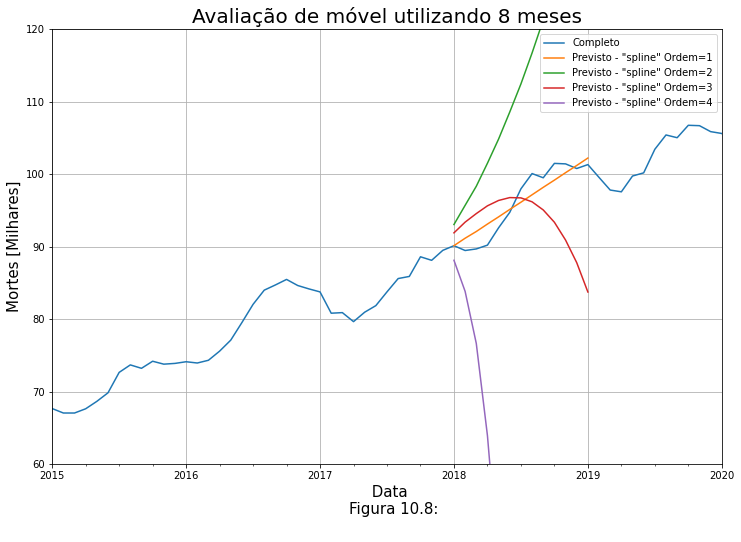

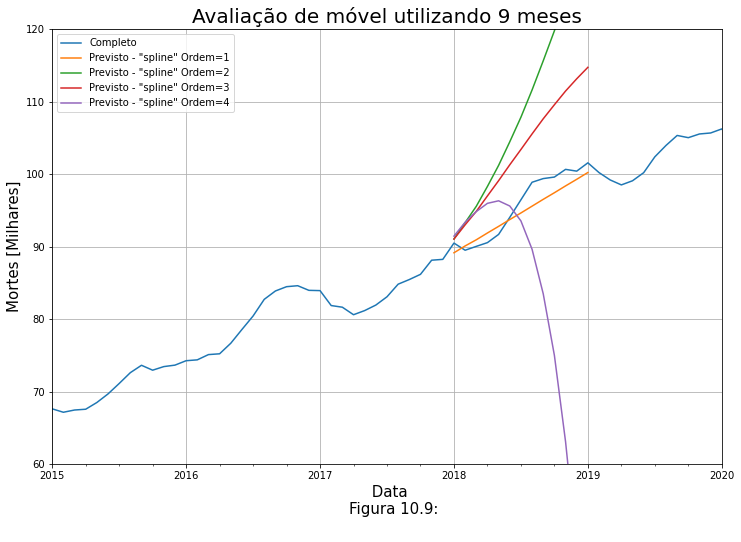

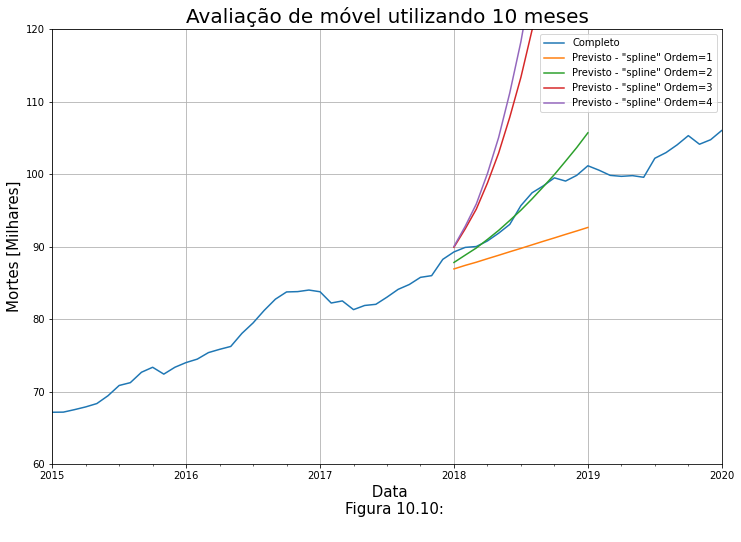

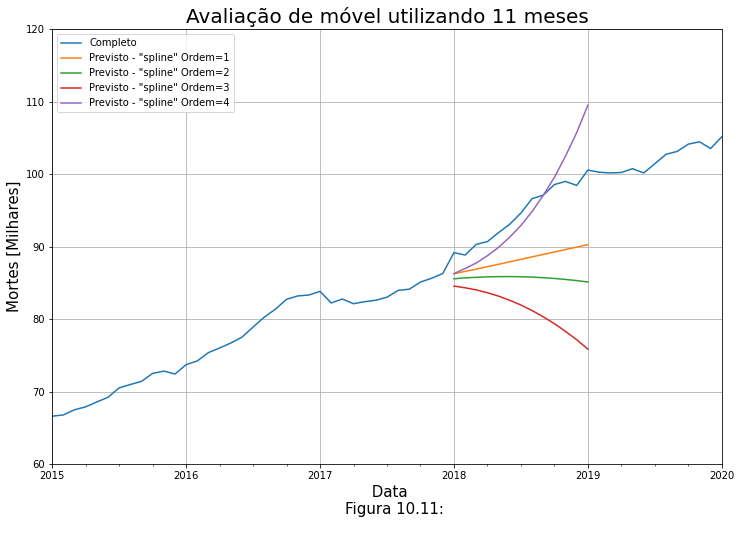

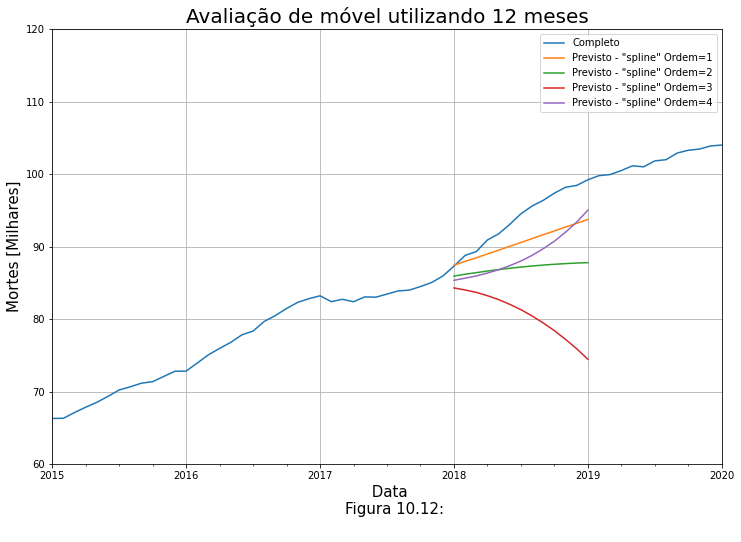

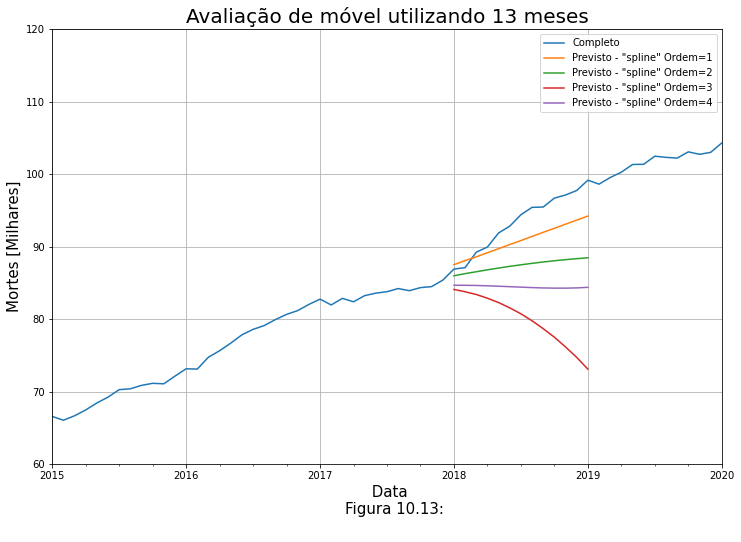

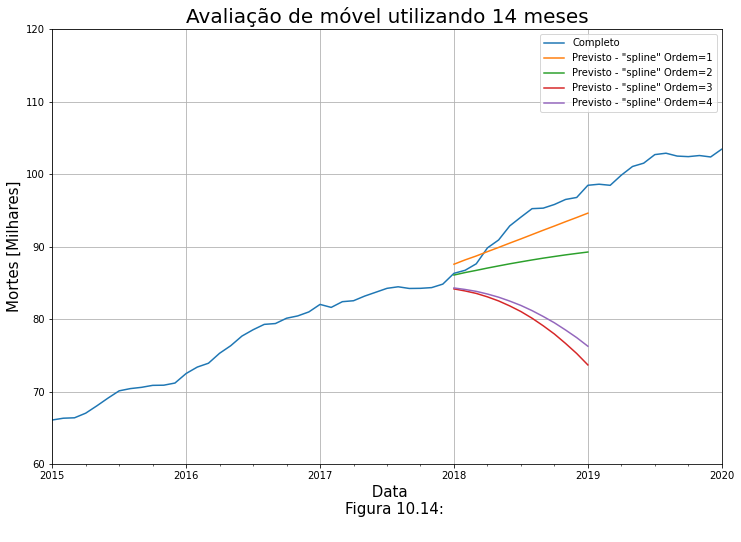

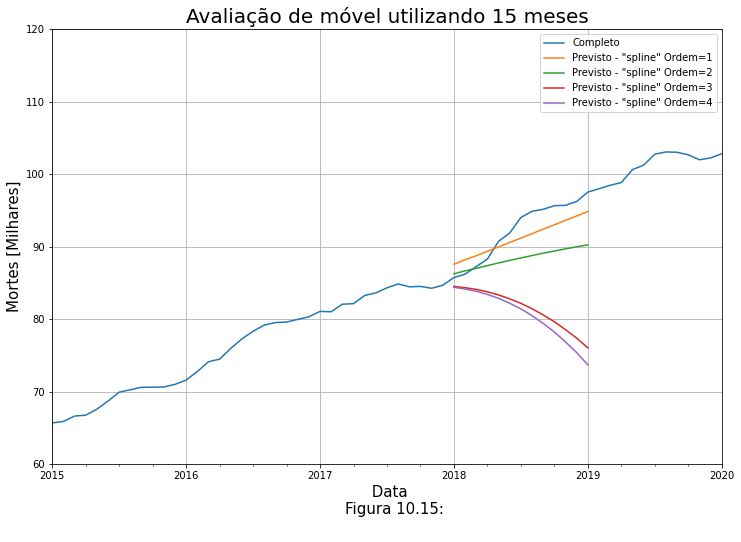

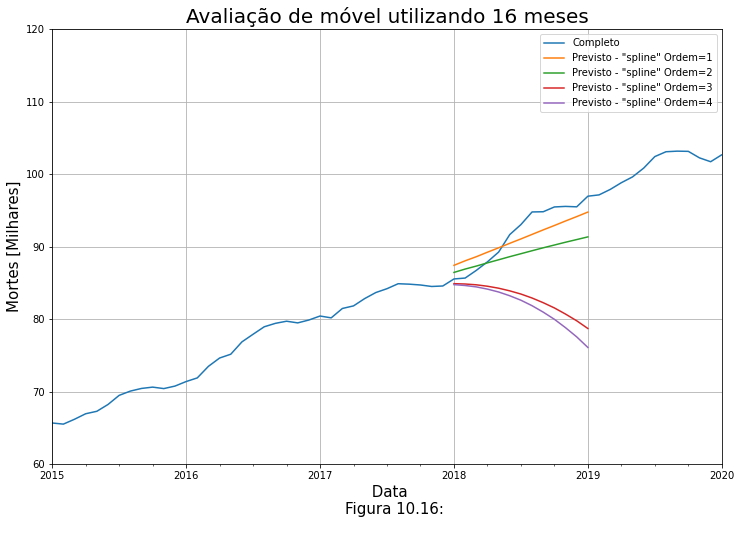

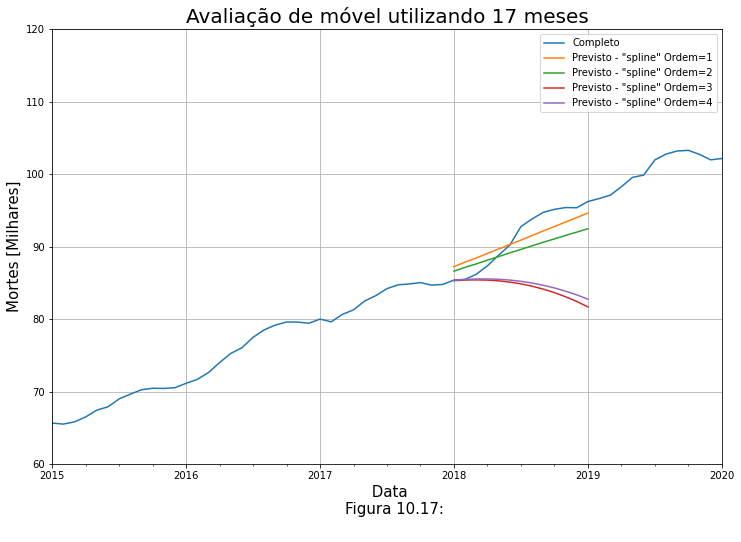

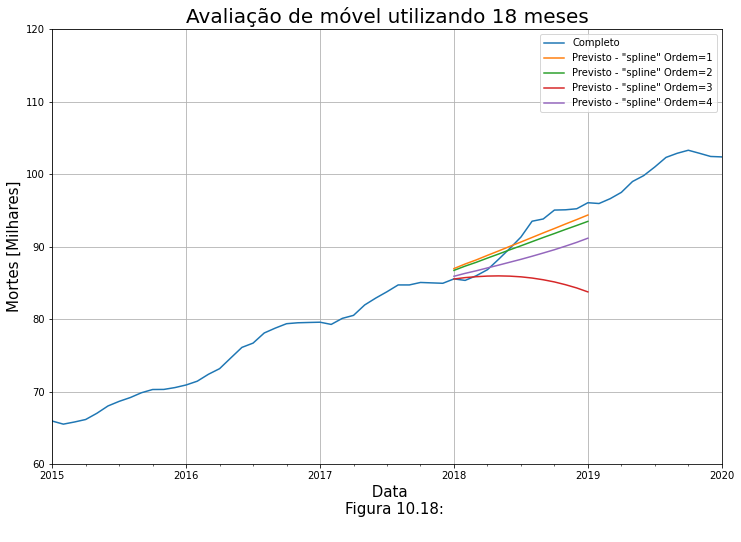

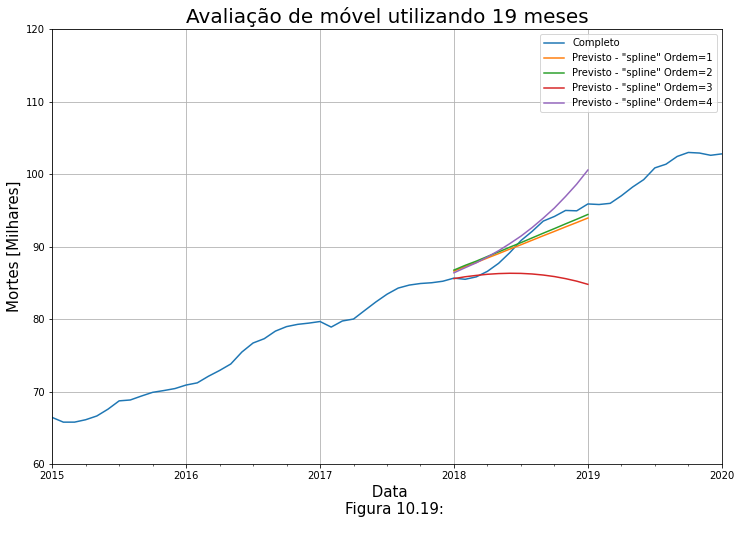

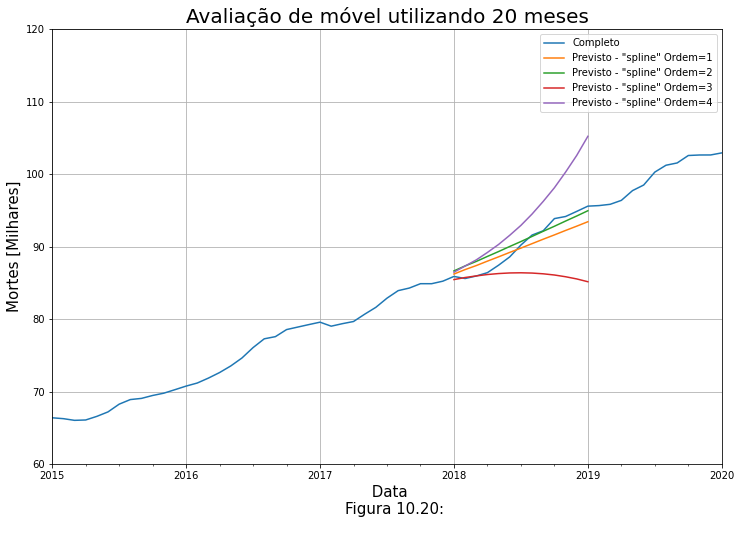

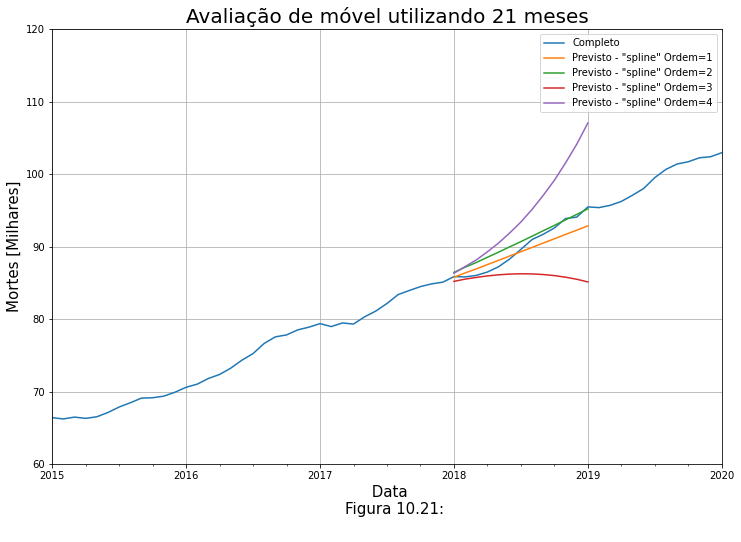

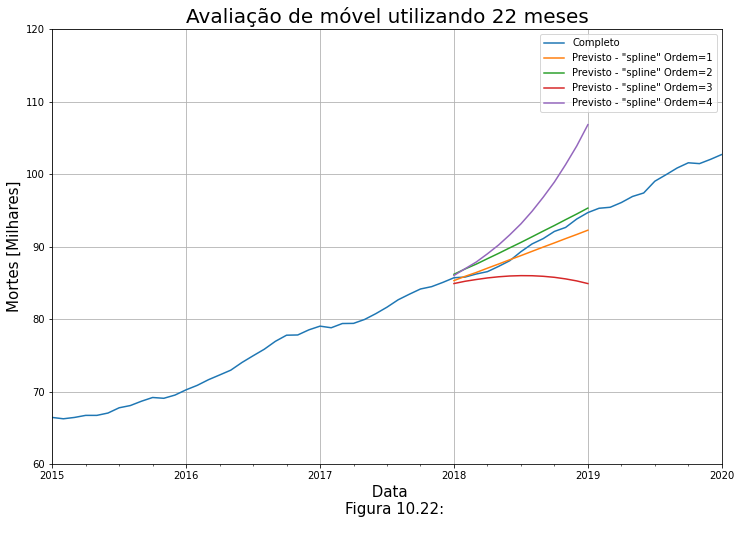

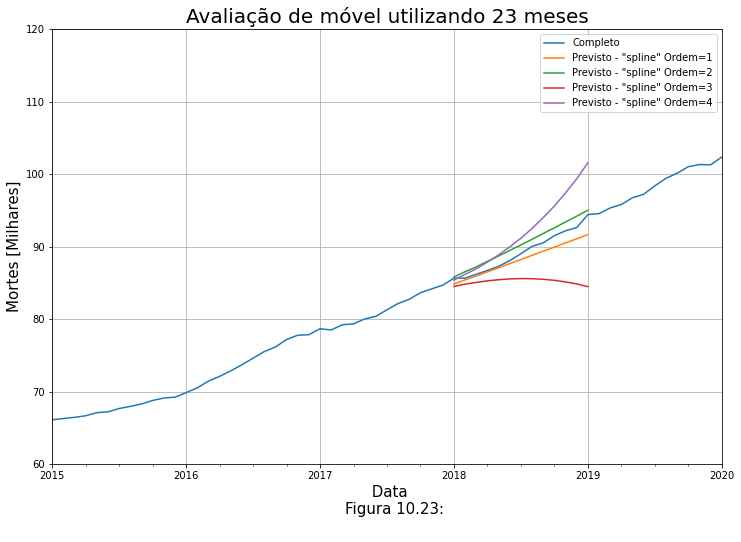

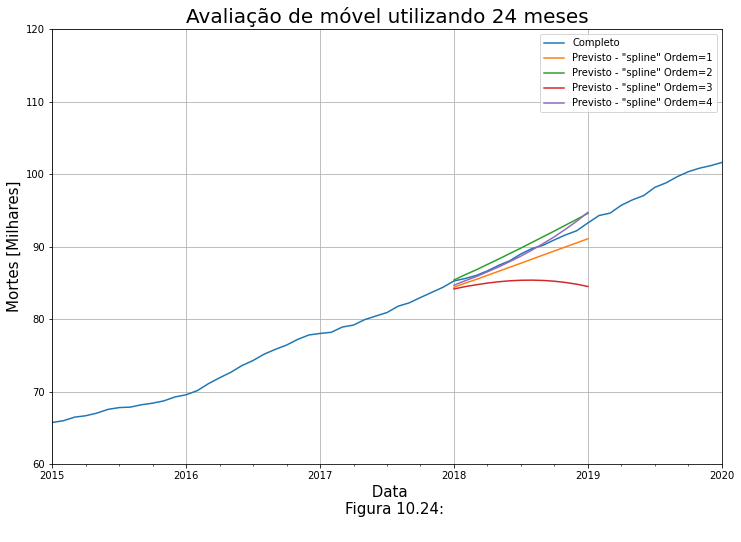

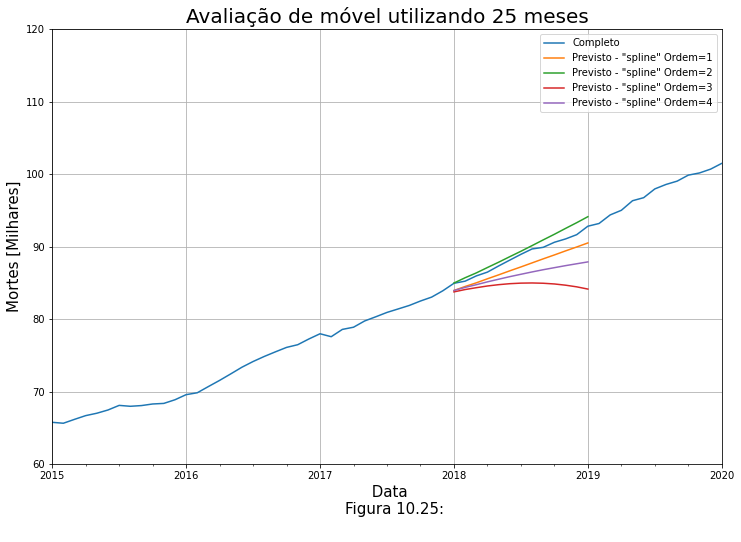

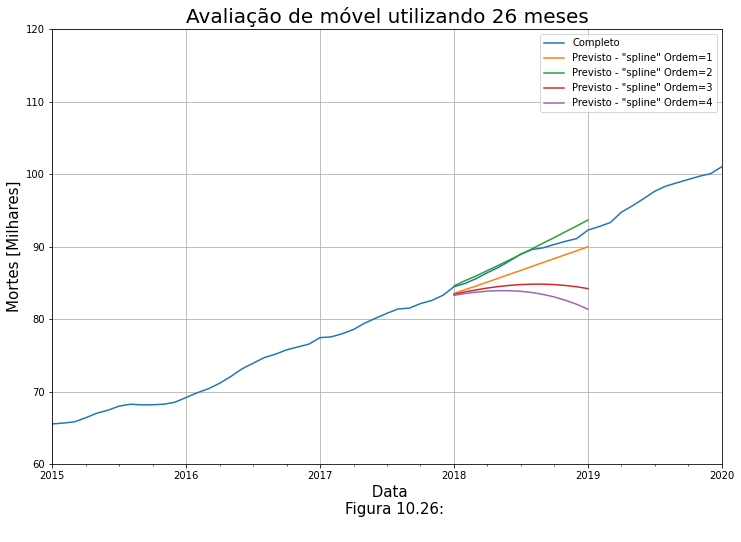

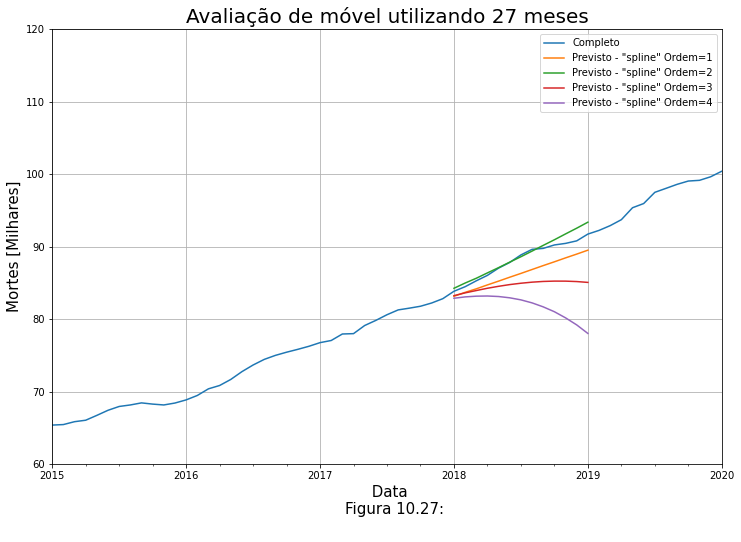

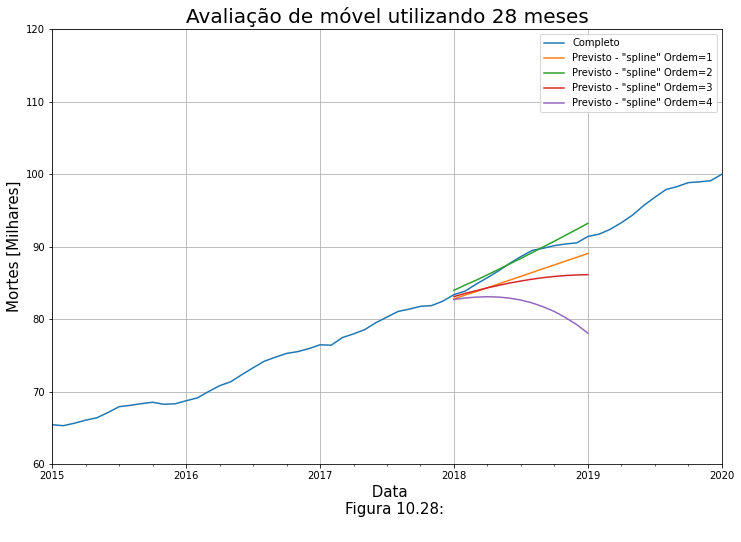

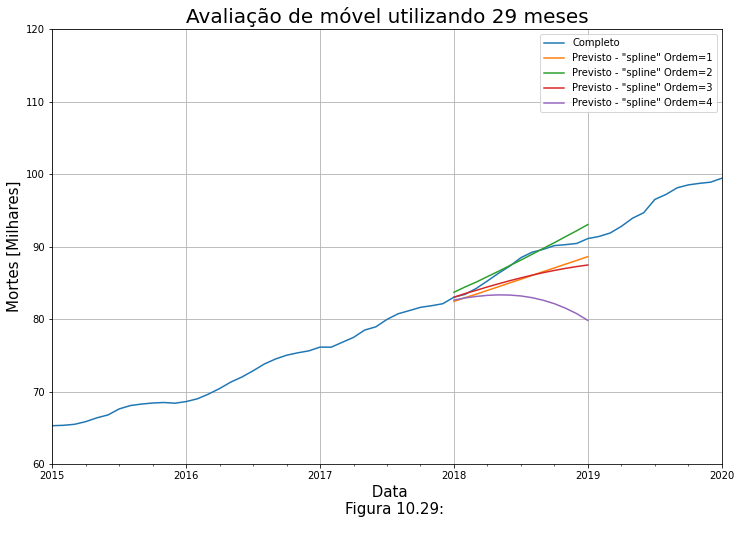

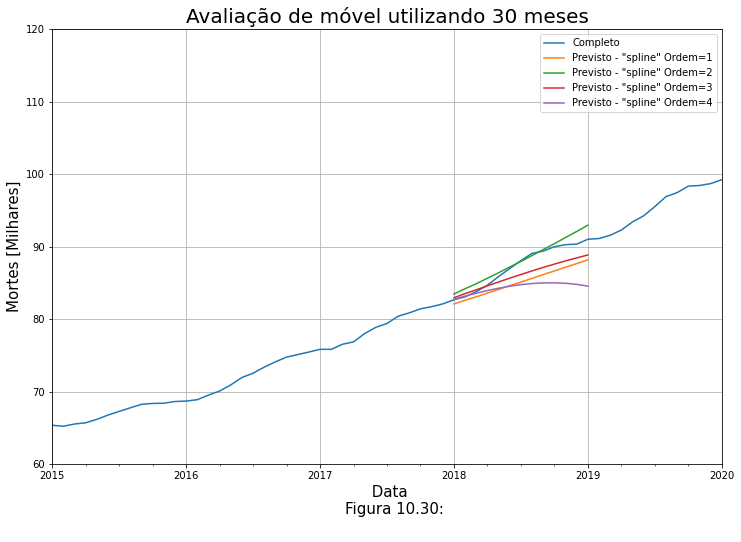

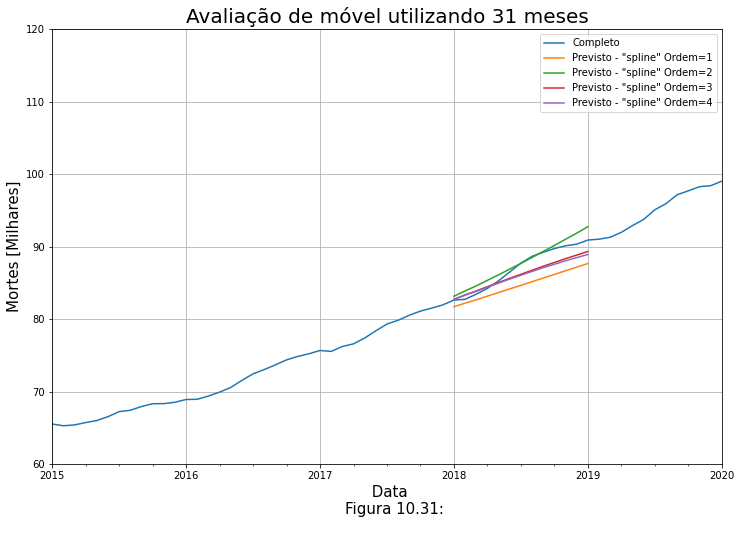

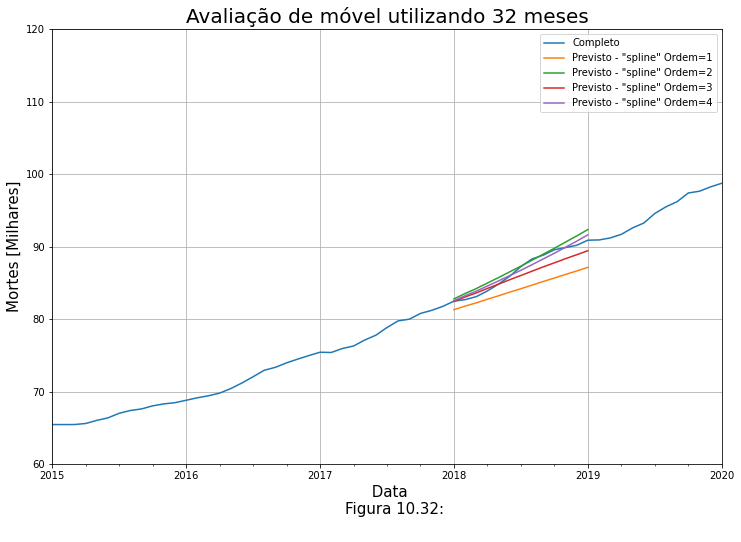

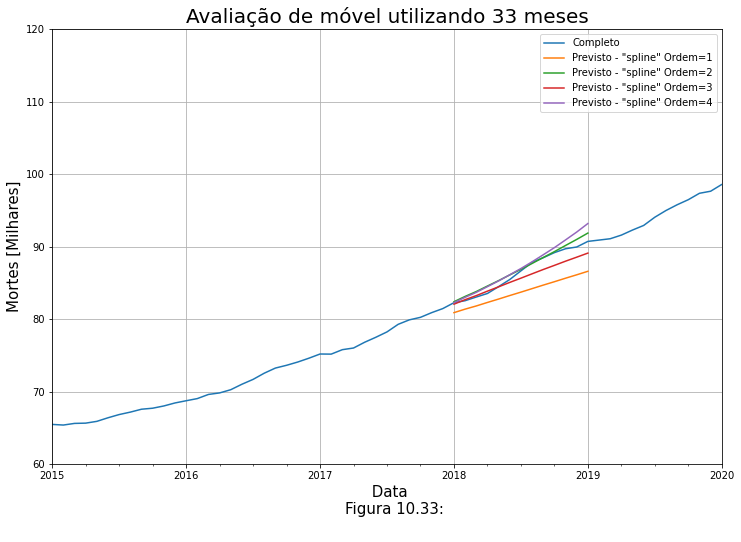

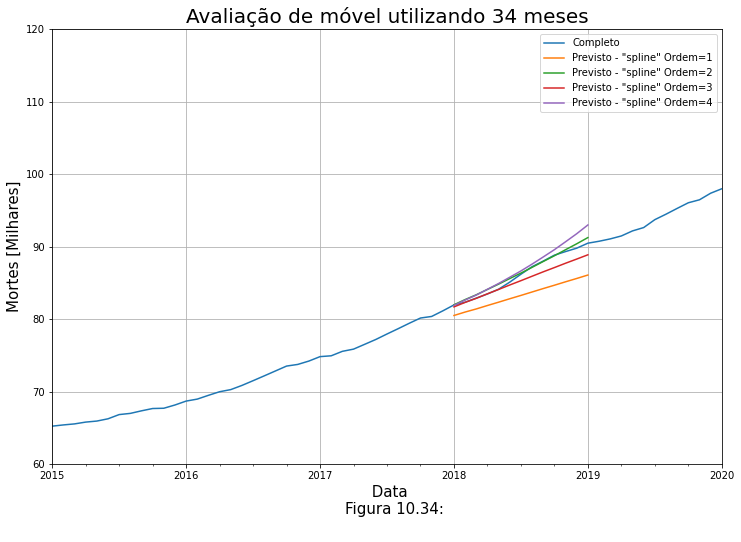

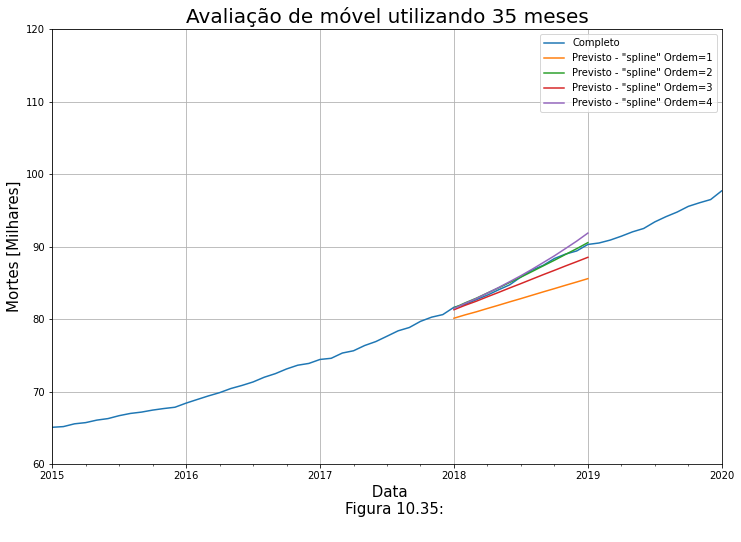

In [410]:
#### Estudo de seleção de p_roll
p_roll = np.arange(1,36,1)
erros = pd.DataFrame()
for n in p_roll:
    prev, err = preve_mortes(mortes_cartorio, 
                pd.to_datetime('2015-01-01'), pd.to_datetime('2017-12-31'), 
                pd.to_datetime('2018-01-01'), pd.to_datetime('2019-01-01'),
                p_roll=n)
    
    cols = ['Completo']+ prev.columns[4:].tolist()
    erros[n] = err.mean()

    prev[cols].plot(figsize=(12,8))
    plt.title('Avaliação de móvel utilizando %i meses'%n, fontsize=20)
    plt.xlabel(''' Data
    Figura 10.{}: 
    '''.format(n), fontsize=15)
    plt.ylabel('Mortes [Milhares]', fontsize=15)
    plt.xlim('2015-01-01', '2020-01-01')
    plt.ylim(60,120)
    plt.grid()

#plt.title('''Avaliação de média móvel utilizando vários meses na construção
#''', fontsize=25)
#plt.xlabel = ('''Figura 10: Avaliação de média móvel utilizando vários meses. Na construção 
#destas médias móveis foram consideradas vários meses e ordens de polinômio para 
#determinar qual a melhor combinação através do erro RMS.''')

Como é possível verificar, quanto maior é o período utilizado para realizar a média móvel, menor é a oscilação da curva e mais próximo da média móvel ficam as projeções.

Assim, avaliou-se a evolução do erro.

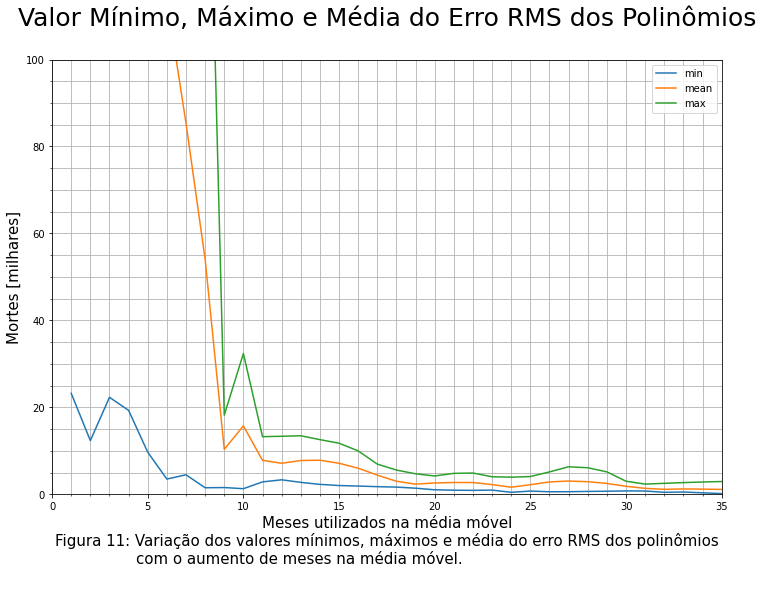

In [411]:
# Gerar gráficos para avaliação de erros
ax = erros.min().plot(figsize=(12,8), label='min')
erros.mean().plot(label='mean')
erros.max().plot(label='max')
plt.title('''Valor Mínimo, Máximo e Média do Erro RMS dos Polinômios
''', fontsize=25)

plt.ylabel('Mortes [milhares]', fontsize=15)
plt.xlabel('''Meses utilizados na média móvel
Figura 11: Variação dos valores mínimos, máximos e média do erro RMS dos polinômios
        com o aumento de meses na média móvel.                                             
''', fontsize=15)
ax.set_xticks(np.arange(37), minor=True)
ax.set_yticks(np.arange(0,300, 5), minor=True)

ax.grid(axis='both', which='both')

plt.ylim(0,100)
plt.xlim(0,35)
plt.legend()

Text(0, 0.5, 'Mortes [milhares]')

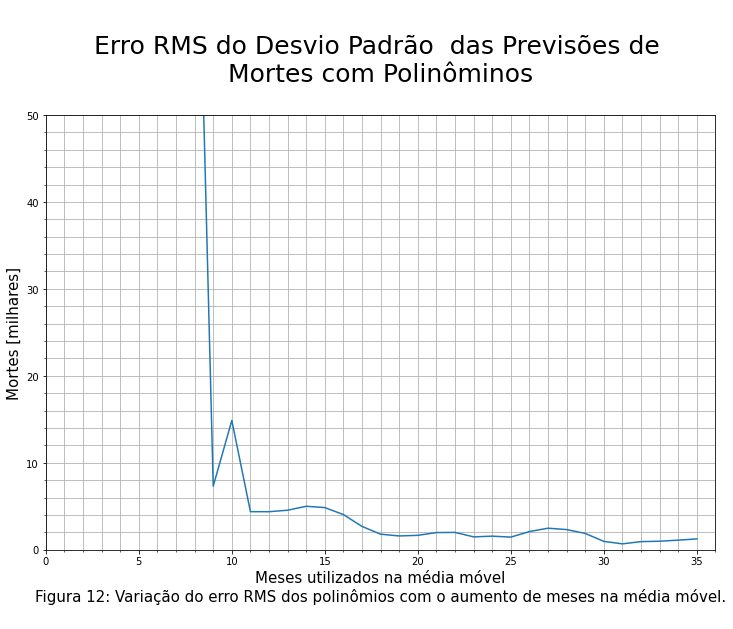

In [412]:
plt.figure(figsize=(12,8))
ax=erros.std().plot(label='std')
plt.ylim(0,50)
plt.xlim(0,35)

ax.set_xticks(np.arange(37), minor=True)
ax.set_yticks(np.arange(0,50, 2), minor=True)

ax.grid(axis='both', which='both')

plt.title('''
Erro RMS do Desvio Padrão  das Previsões de 
Mortes com Polinôminos\n''',
          fontsize=25)
plt.xlabel('''Meses utilizados na média móvel
Figura 12: Variação do erro RMS dos polinômios com o aumento de meses na média móvel.
''', fontsize=15)
plt.ylabel('Mortes [milhares]', fontsize=15)

É possível perceber que quanto maior o período utilizado para realizar a média móvel, menor é o erro na previsão da média móvel por todos os modelos. Contudo valores de grandes períodos de média móvel fazem com que se perca informação dos dados reais.

Para conferir o real impacto de utilizar a média móvel na previsão de mortes futuras, será repetido esse processo de validação aplicando a curva de média móvel sobre os dados puros (sem média móvel). Assim, os valores do período de teste serão substituídos pelo valor de previsão da média móvel e o erro desta previsão avaliado.



In [413]:
#### Avaliação do Erro real
#### Criar DataFrame para comparar a previsão de mortes utilizando as médias móveis 
#### com os dados reais e verificar o erro real da previsão.
# Criar df de comparação
compara_previsao = pd.DataFrame()

mod = 1e3
# Guardar as mortes de cartório para comparação
compara_previsao['Mortes'] = mortes_cartorio/mod

# Guardar os valores previstos seguindo a sequência:
#   1 - Guardar os valores reais
#   2 - Eliminar o período que será comparado;
#   3 - Colocar os valores previstos
#   4 - Preencher valores NaN com spline 

# Selecionar o período desejado
i_ref = pd.to_datetime('2015-01-01')
f_ref = pd.to_datetime('2018-01-01')
i_prev = pd.to_datetime('2018-01-01')
f_prev = pd.to_datetime('2019-01-01')
p_roll = np.arange(1,61,1)

# Loop para calcular o erro real
erro_real = pd.DataFrame()
for n in p_roll:
    prev, err = preve_mortes(mortes_cartorio, 
                i_ref, f_ref, i_prev, f_prev,
                n)
    
    cols = prev.columns[3:]

    for col in cols:
        # cria coluna com previsão de mortes igual aos dados de cartório
        #compara_previsao[col+': n=%i'%n] = compara_previsao['Mortes'] 
        # limpa o campo da região que srá usada para previsão
        #compara_previsao.loc[i_prev:f_prev, col+': n=%i'%n
         #                    ] = np.empty_like(compara_previsao.loc[i_prev:f_prev,
          #                                                          col+': n=%i'%n])

        # Preenche o campo com os dados previstos 
        compara_previsao.loc[i_prev:f_prev,col+': n=%i'%n
                             ] = prev.loc[i_prev:f_prev,col]

        # Calcula de cada previsão
        erro_real.loc[n,cols] = (((compara_previsao.loc[i_prev:f_prev,'Mortes']
                                   - 
                                   compara_previsao.loc[i_prev:f_prev, col+': n=%i'%n]
                                   )**2
                                  )**0.5
                                 ).mean()

erro_real

Previsto - "linear"  ...  Previsto - "spline" Ordem=4
1          34252.099035  ...                 34252.099035
2            253.555432  ...                   253.555432
3            501.037554  ...                   501.037554
4            466.269712  ...                   466.269712
5            109.004024  ...                   109.004024
6            131.781296  ...                   131.781296
7            167.513871  ...                   167.513871
8            105.509020  ...                   105.509020
9             26.372136  ...                    26.372136
10            26.603658  ...                    26.603658
11            11.285149  ...                    11.285149
12             8.578401  ...                     8.578401
13             9.676562  ...                     9.676562
14            12.847471  ...                    12.847471
15            15.285857  ...                    15.285857
16            15.492691  ...                    15.492691
17            14.463519  ...                    14.463519
18            11.983878  ...                    11.983878
19             9.537818  ...                     9.537818
20             8.752764  ...                     8.752764
21             8.616294  ...                     8.616294
22             8.642014  ...                     8.642014
23             8.823654  ...                     8.823654
24             9.505165  ...                     9.505165
25            10.629567  ...                    10.629567
26            12.841646  ...                    12.841646
27            14.878937  ...                    14.878937
28            15.653584  ...                    15.653584
29            15.711035  ...                    15.711035
30            15.010045  ...                    15.010045
31            13.423707  ...                    13.423707
32            12.461484  ...                    12.461484
33            11.904591  ...                    11.904591
34            12.057304  ...                    12.057304
35            12.468824  ...                    12.468824
36            13.251494  ...                    13.251494
37            13.427470  ...                    13.427470
38            14.410630  ...                    14.410630
39            15.183327  ...                    15.183327
40            15.209232  ...                    15.209232
41            15.133772  ...                    15.133772
42            14.807900  ...                    14.807900
43            14.398319  ...                    14.398319
44            14.370417  ...                    14.370417
45            14.694678  ...                    14.694678
46            15.559015  ...                    15.559015
47            16.488634  ...                    16.488634
48            17.403266  ...                    17.403266
49            18.083945  ...                    18.083945
50            19.120579  ...                    19.120579
51            19.857007  ...                    19.857007
52            20.153643  ...                    20.153643
53            20.149406  ...                    20.149406
54            19.746497  ...                    19.746497
55            19.368879  ...                    19.368879
56            19.490592  ...                    19.490592
57            19.745101  ...                    19.745101
58            20.222257  ...                    20.222257
59            20.961682  ...                    20.961682
60            21.646551  ...                    21.646551

[60 rows x 5 columns]

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this w

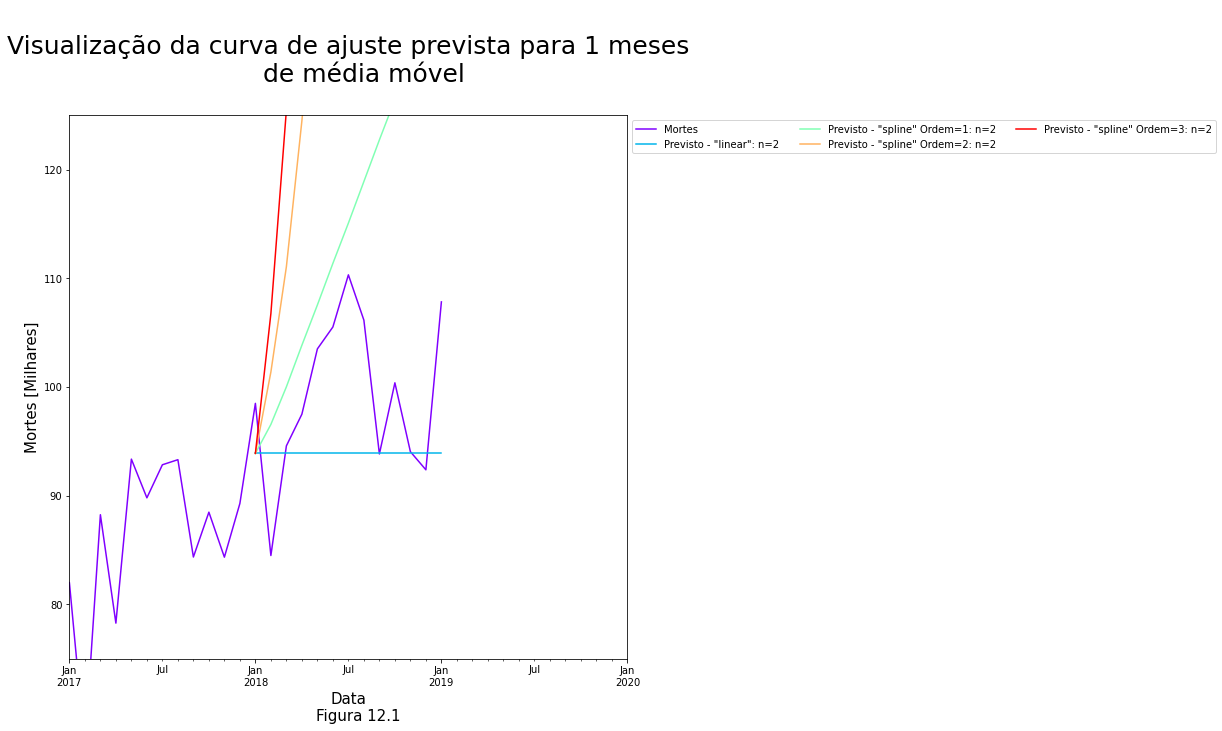

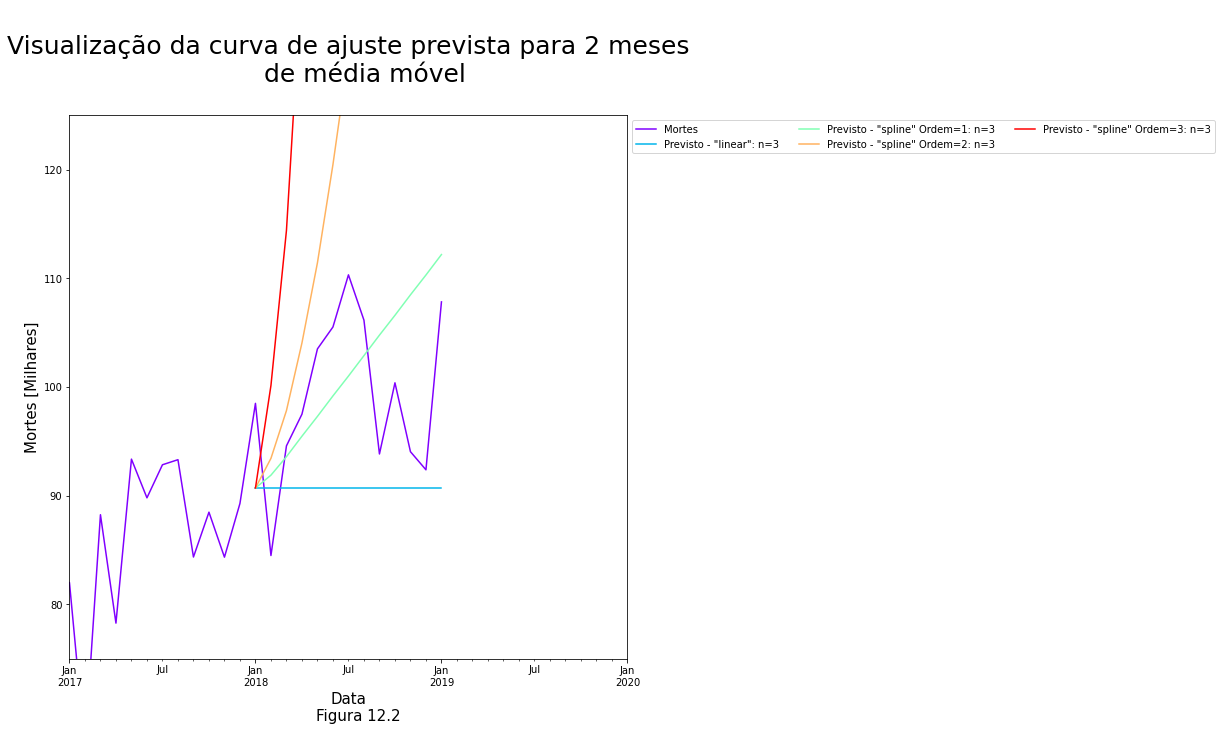

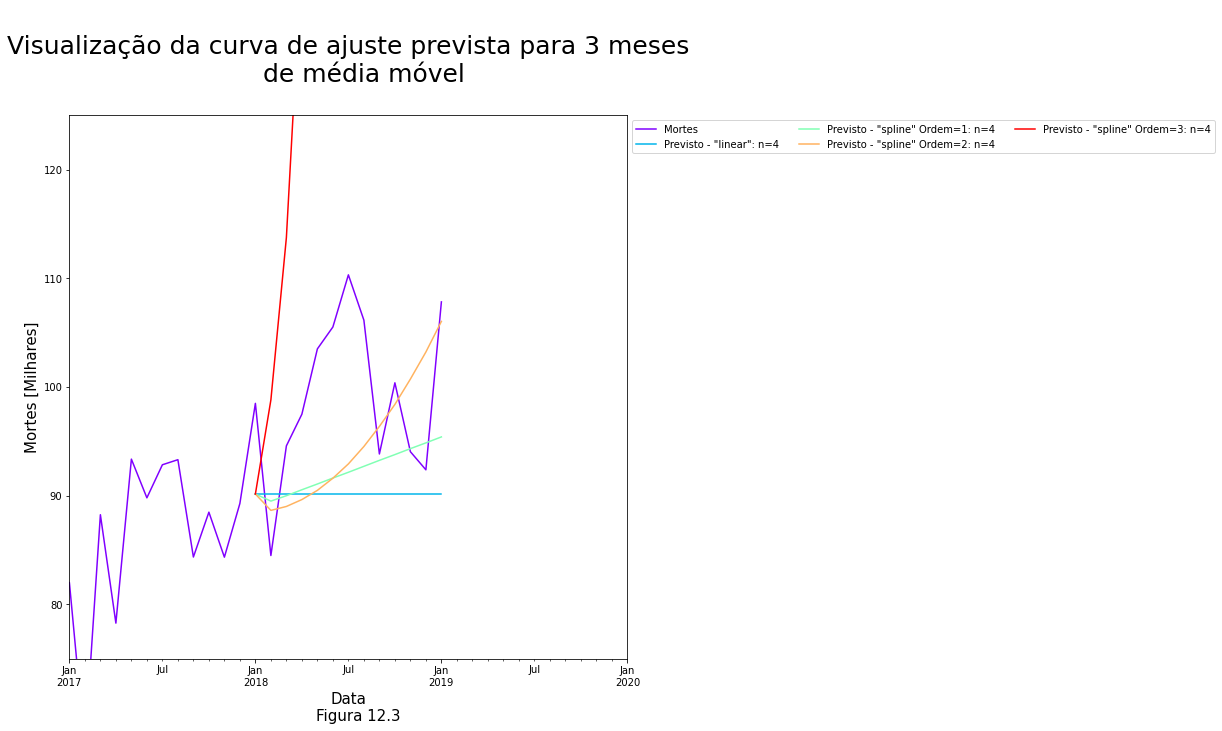

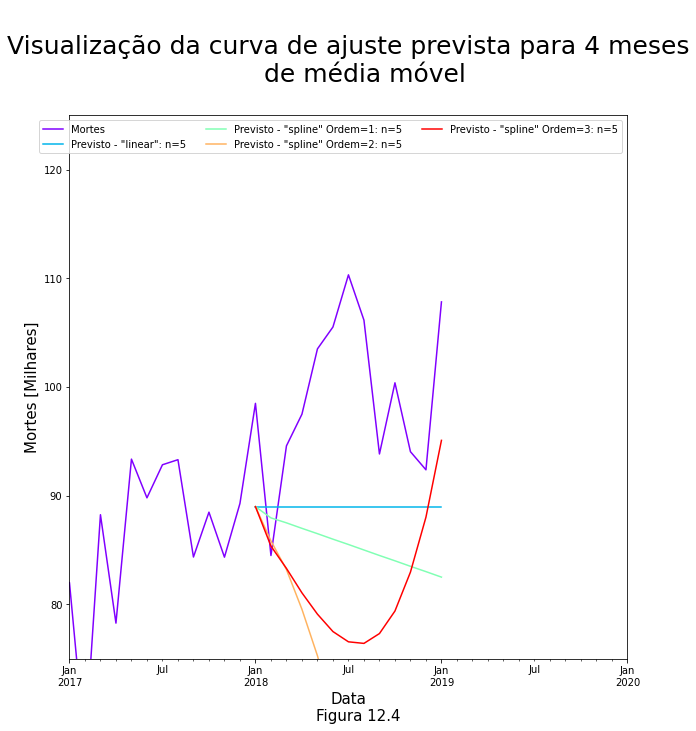

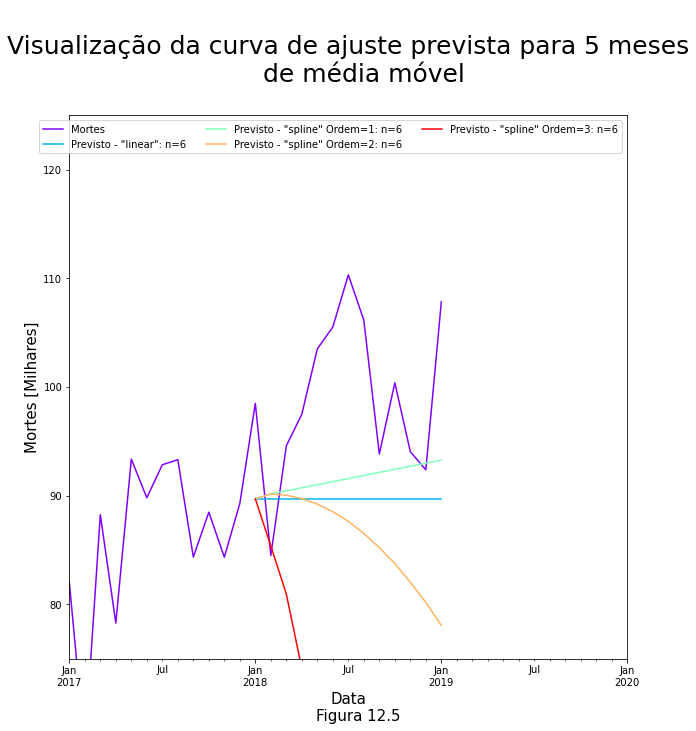

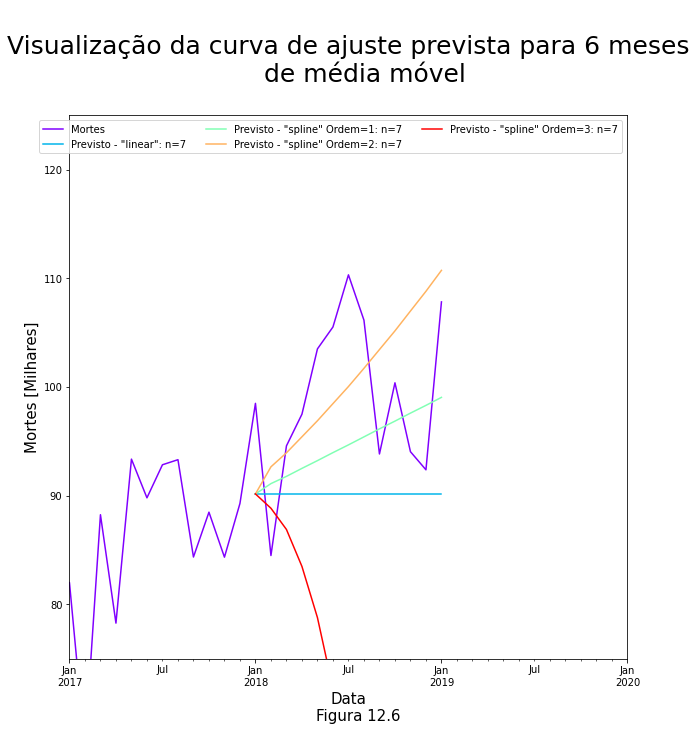

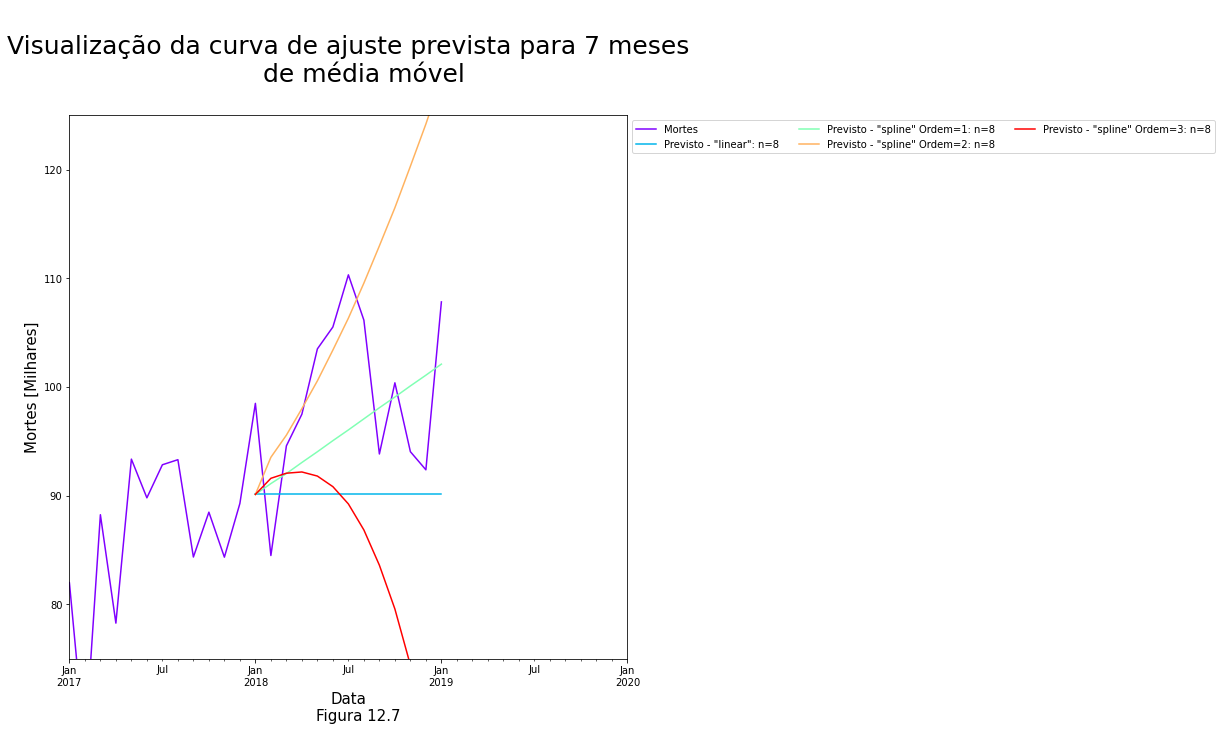

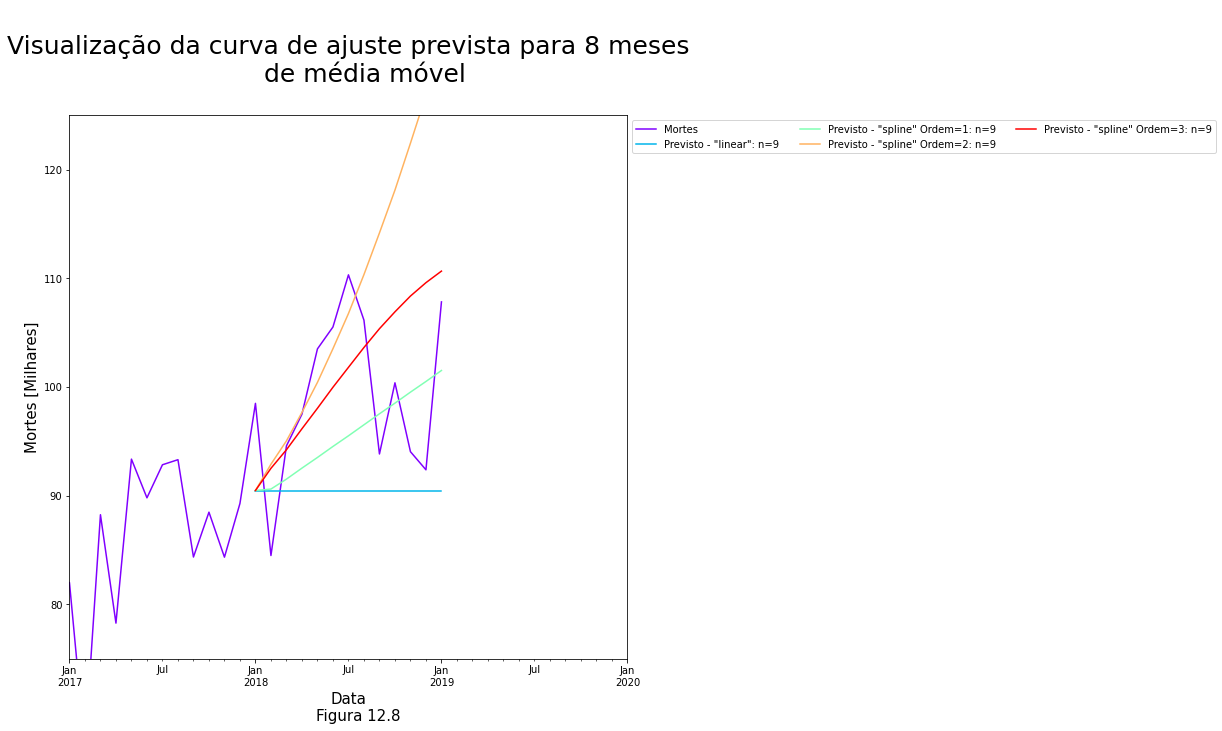

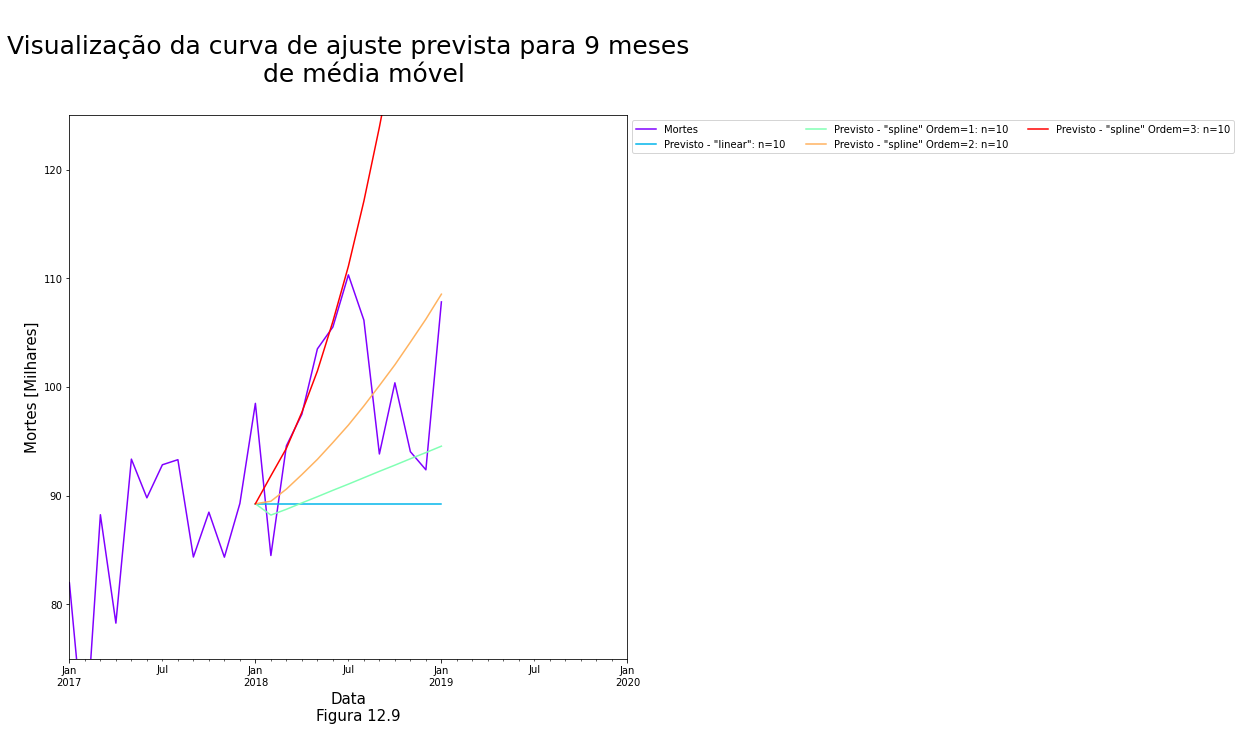

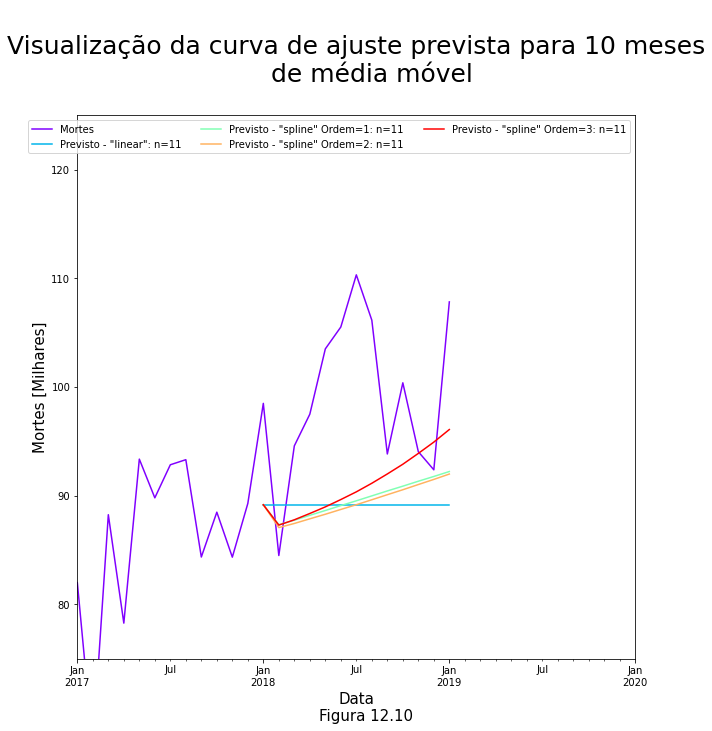

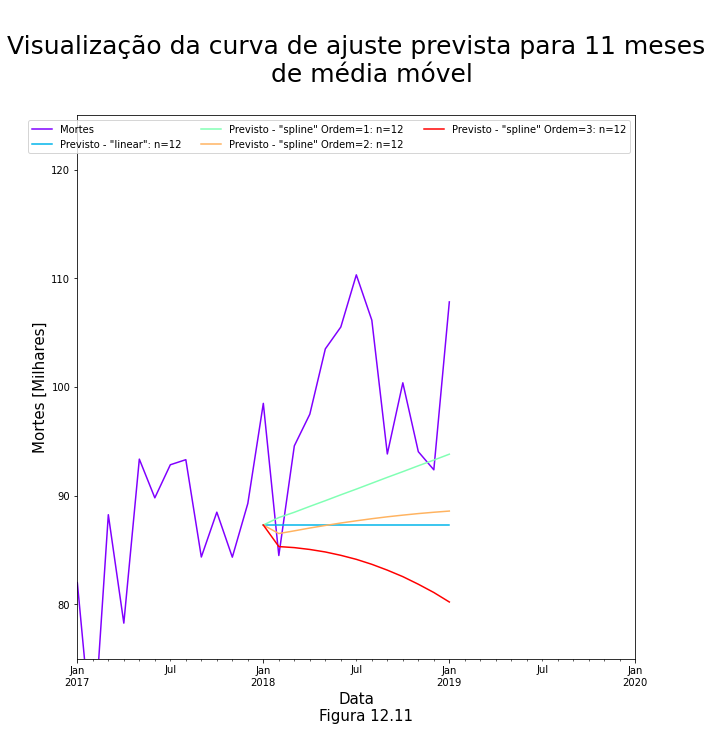

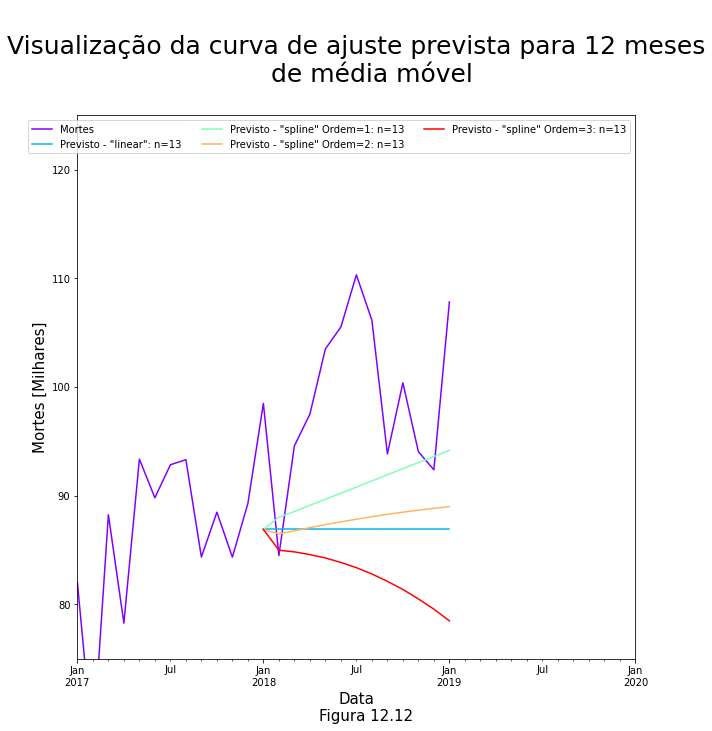

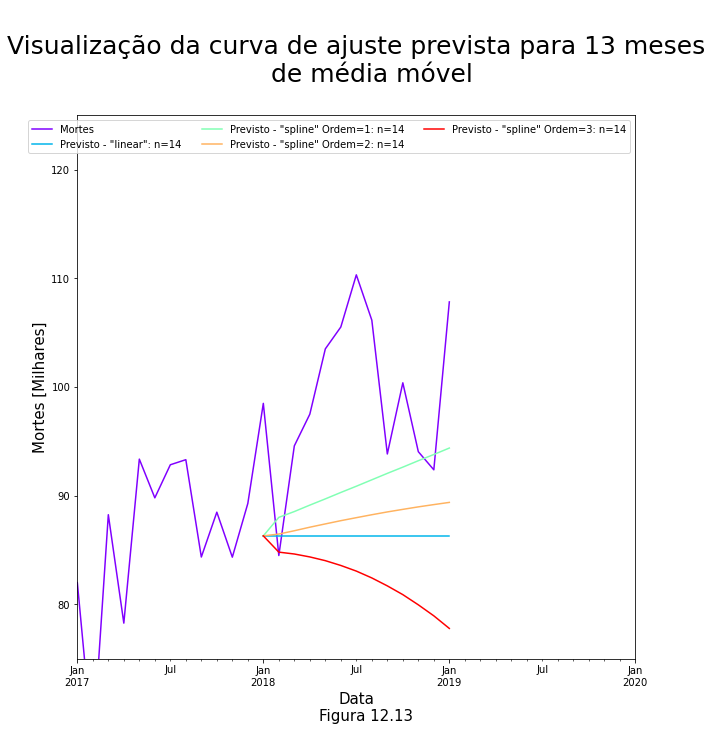

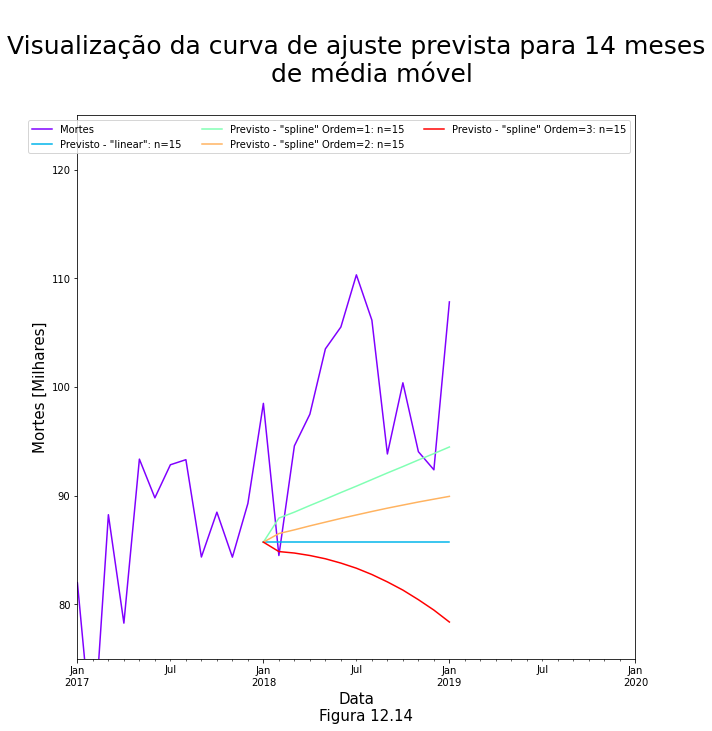

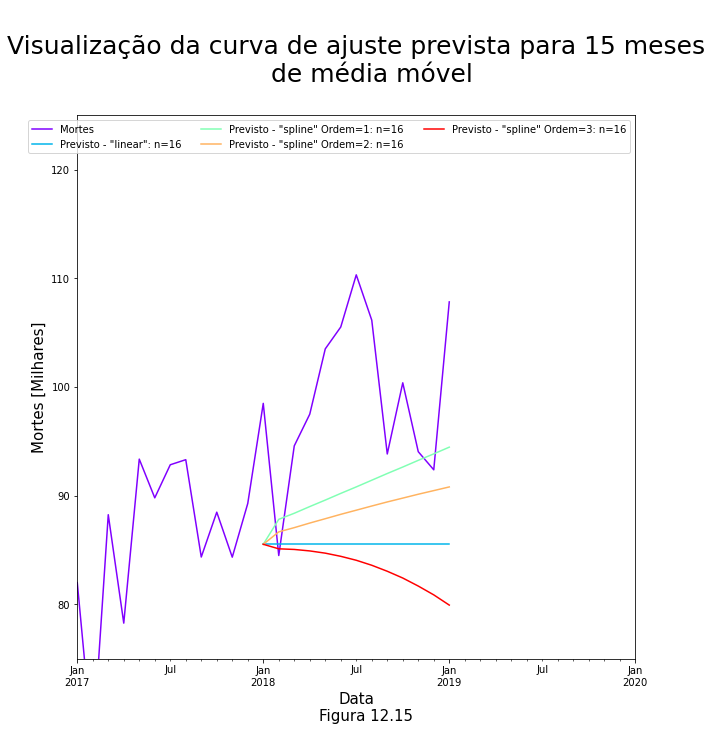

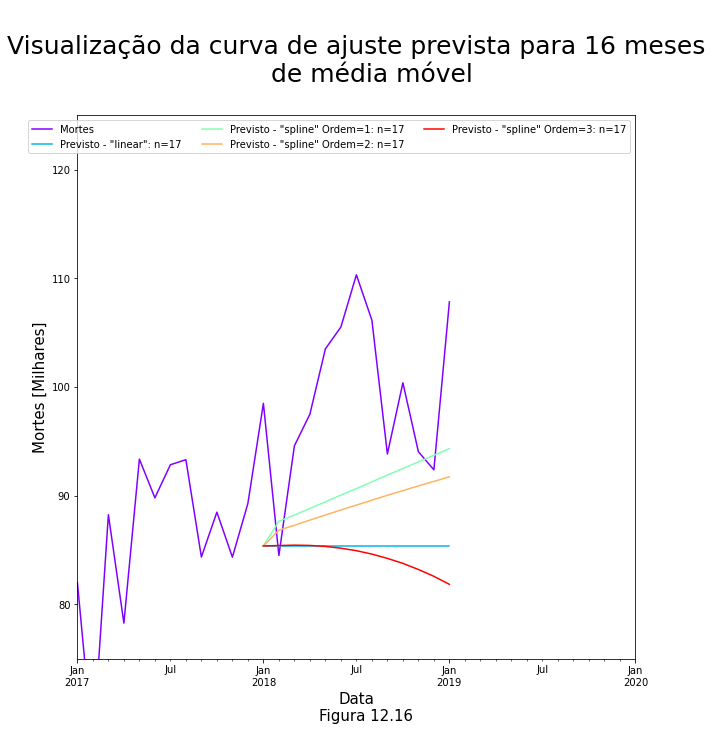

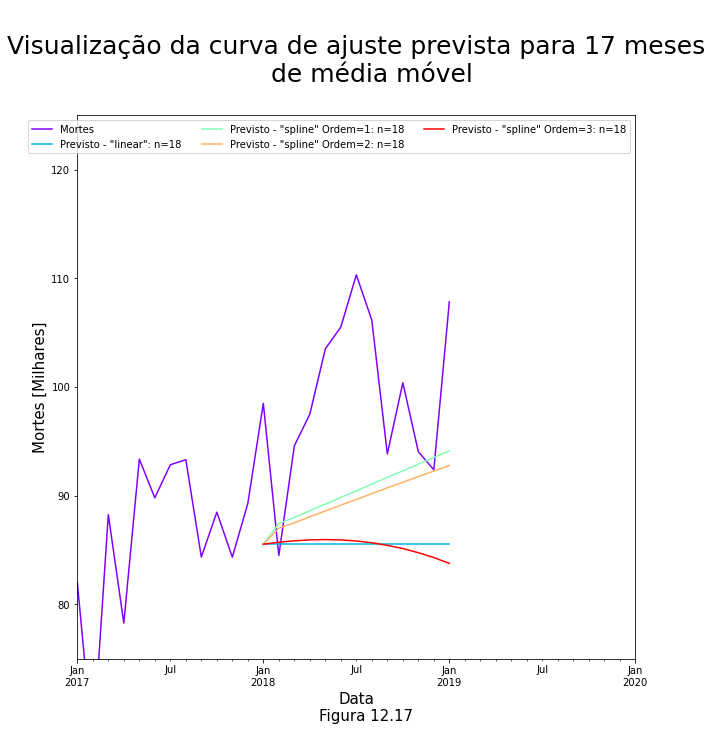

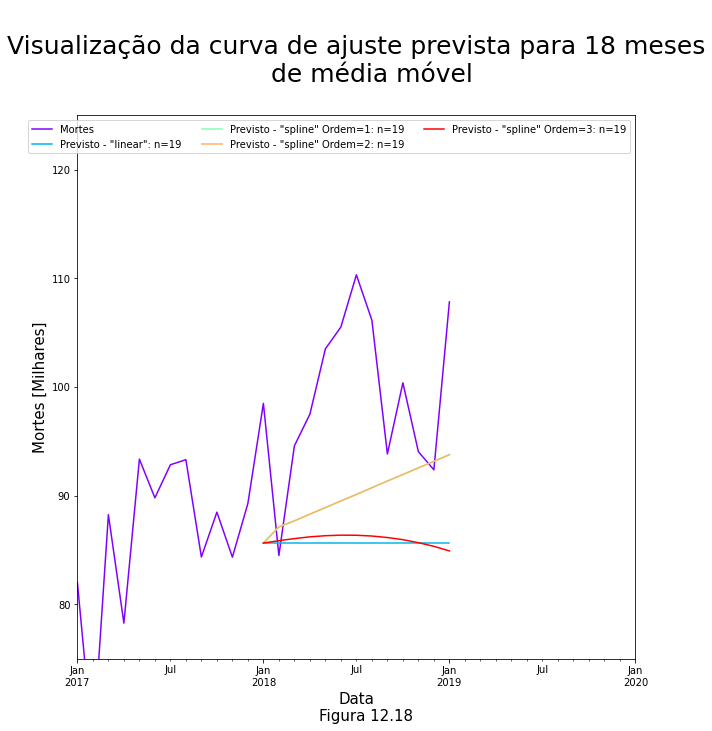

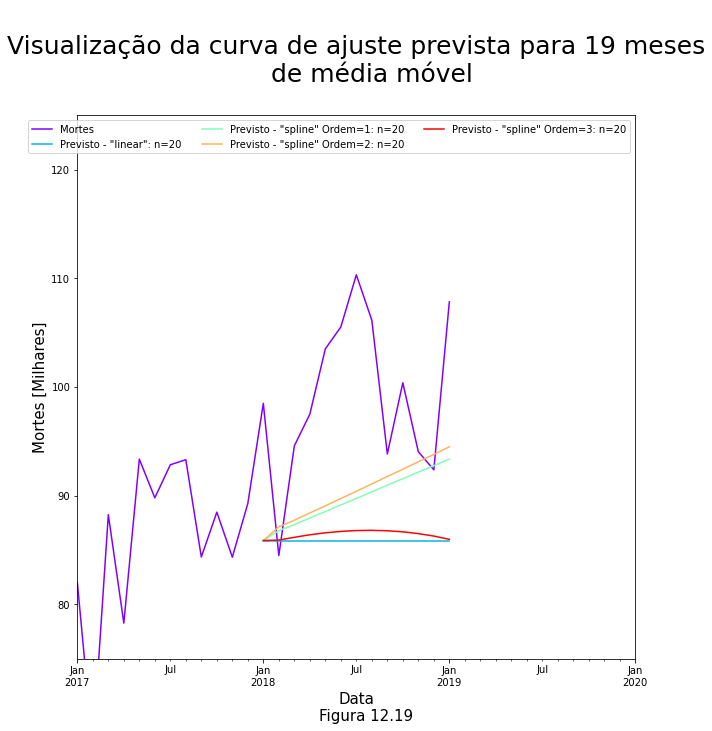

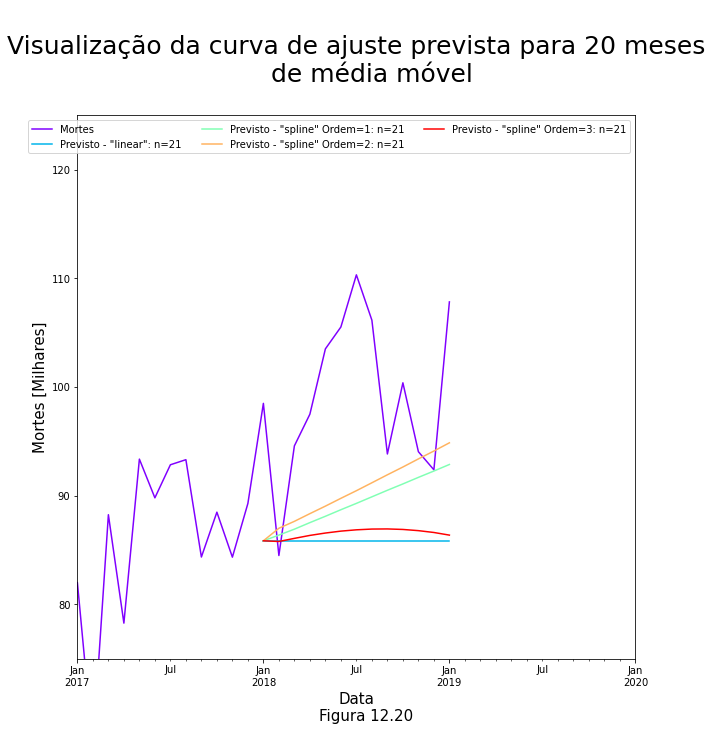

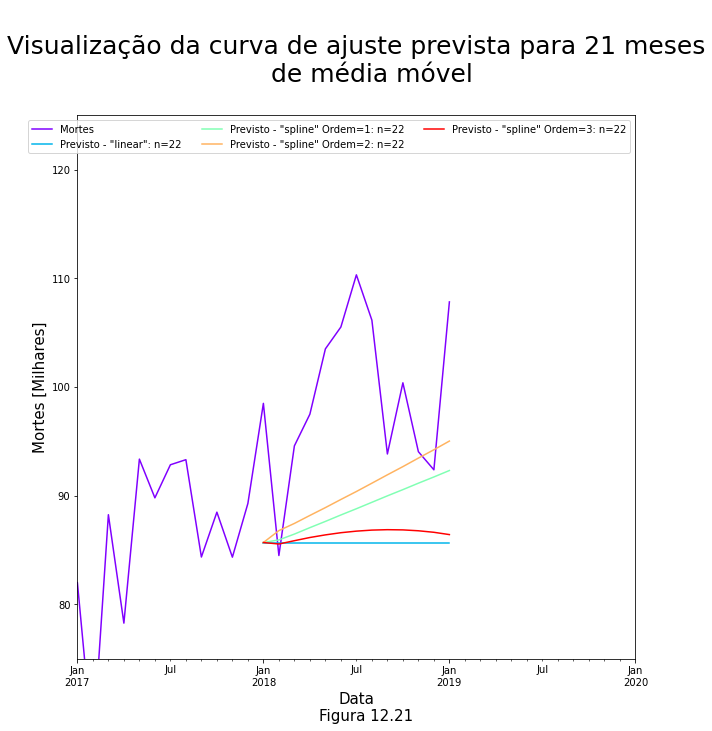

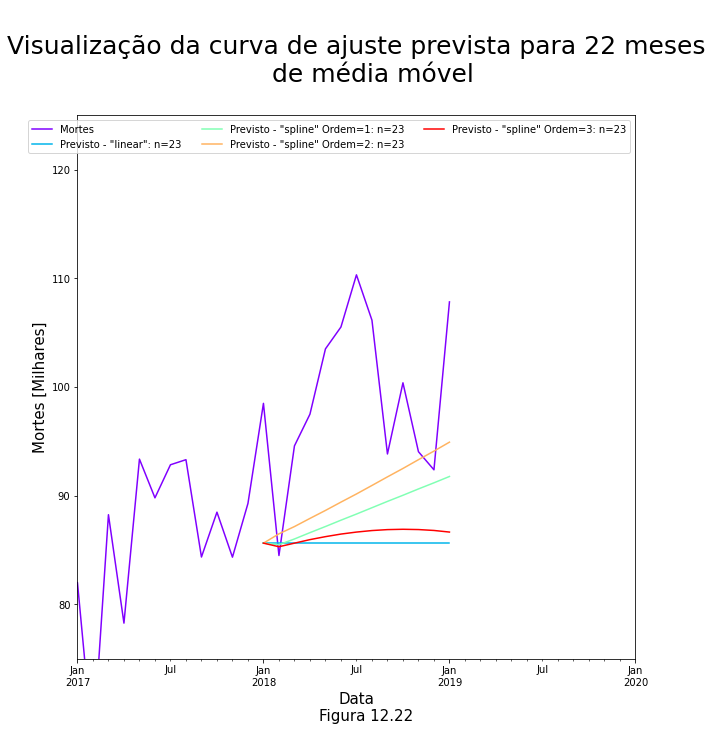

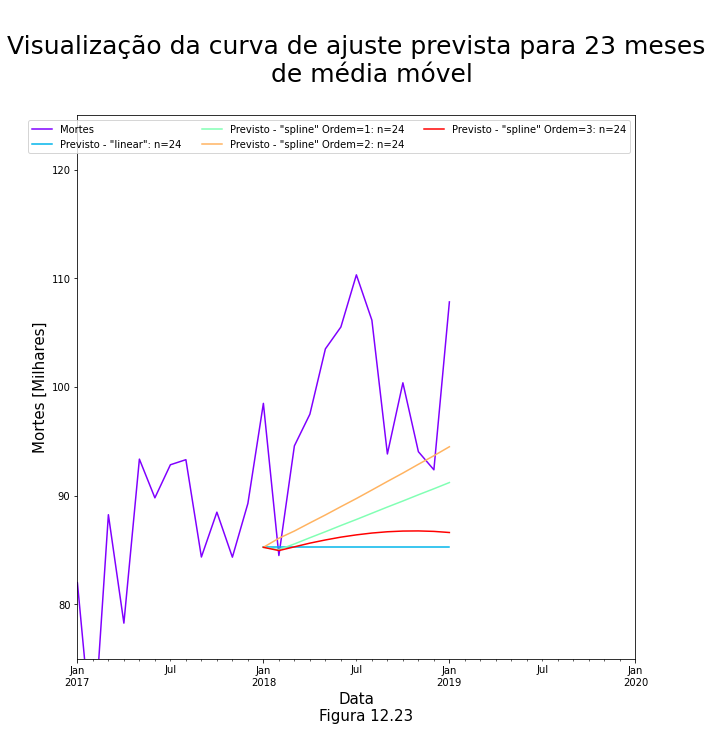

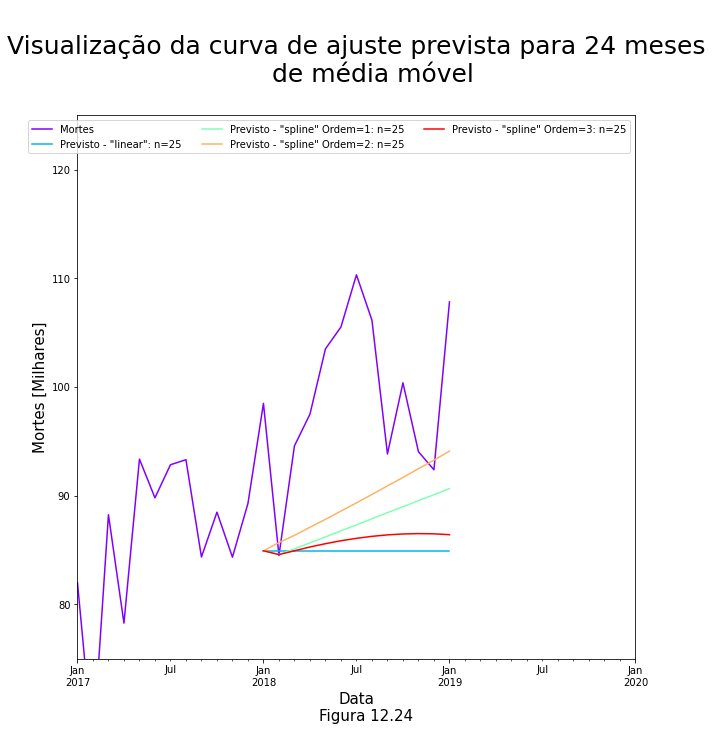

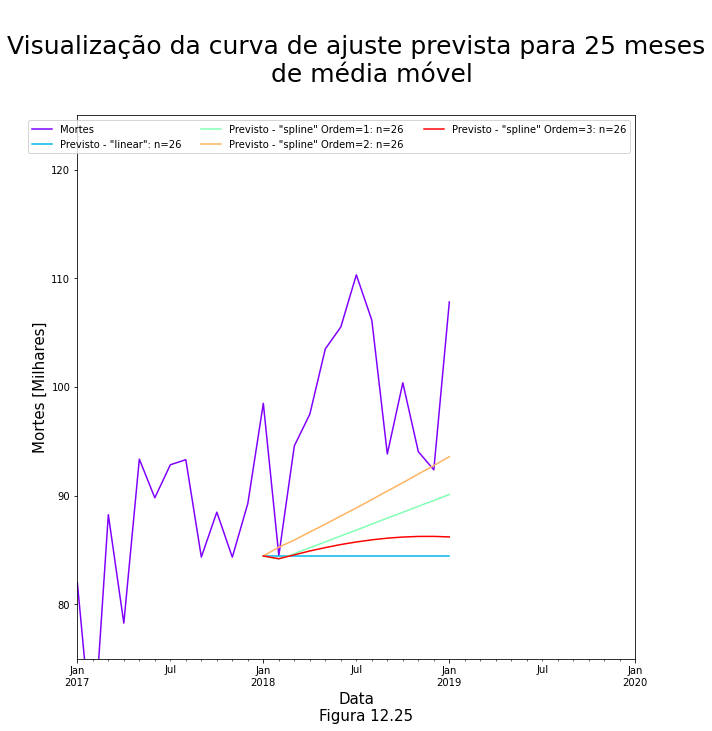

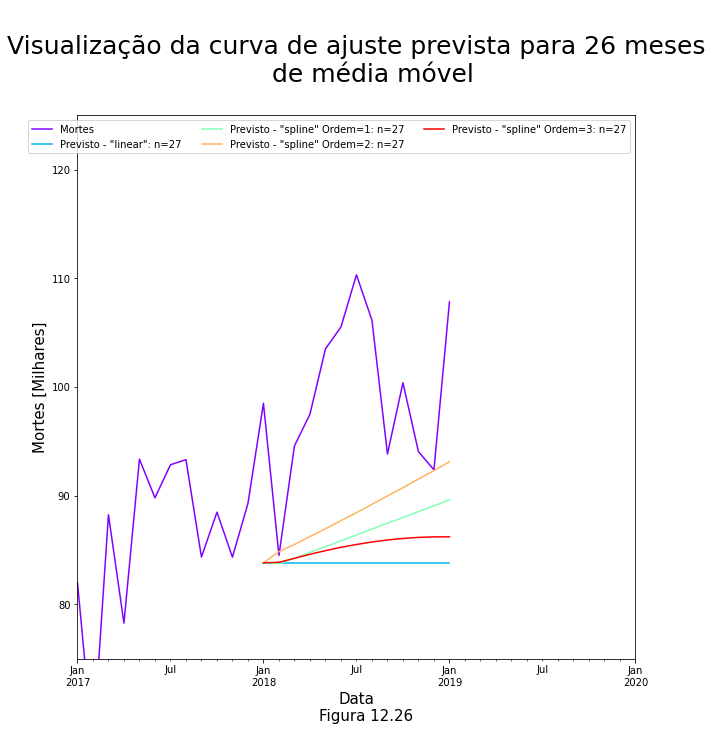

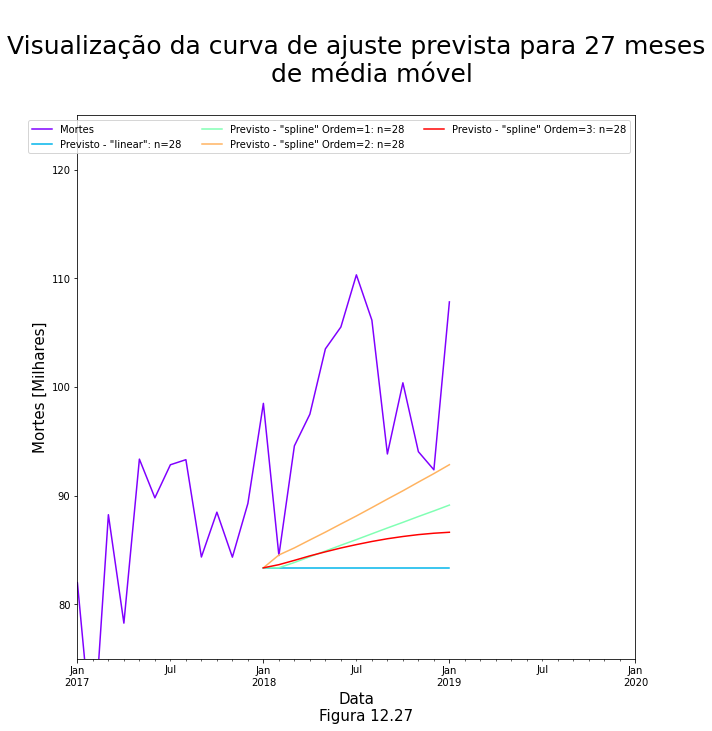

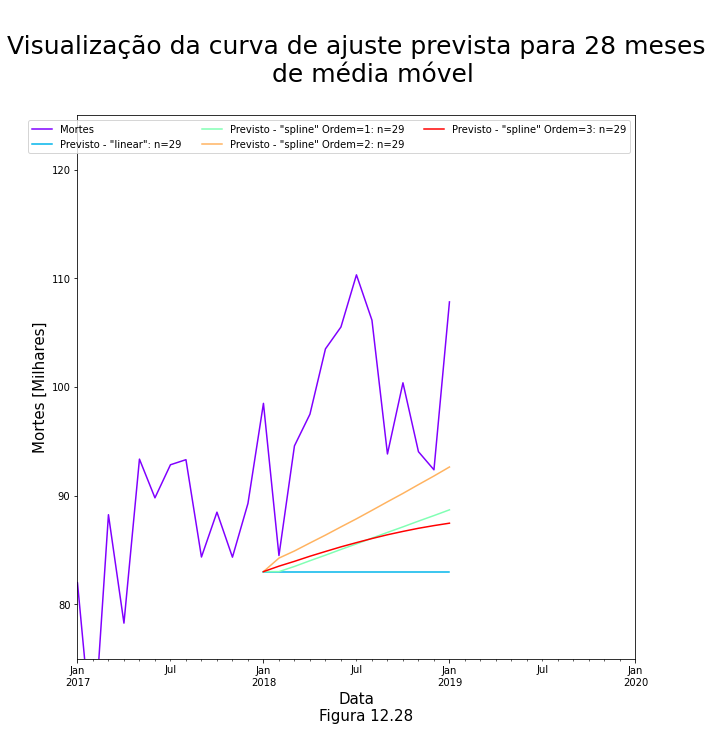

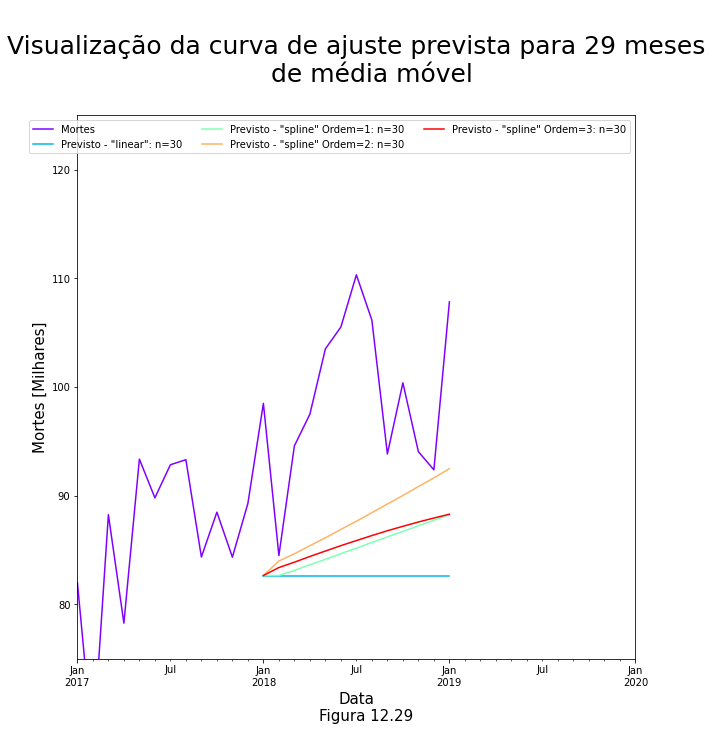

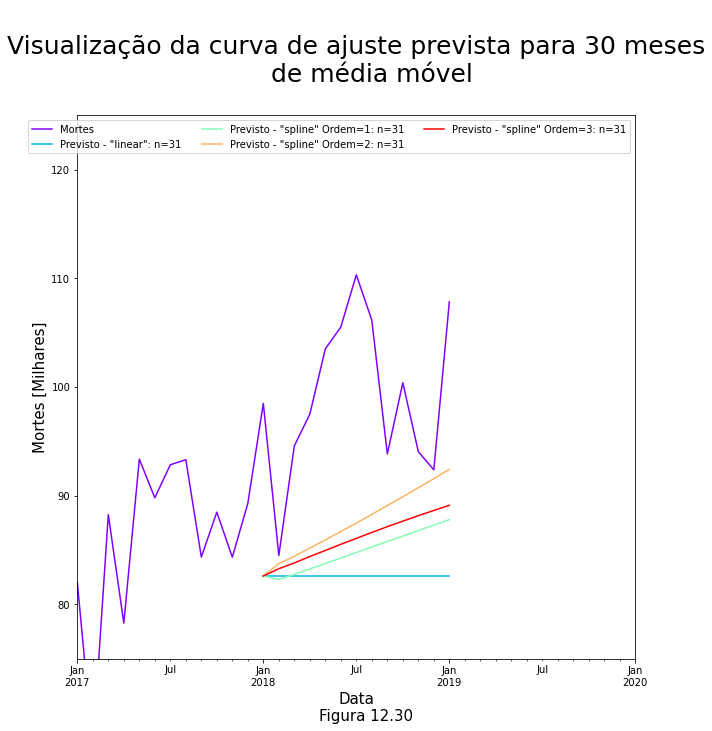

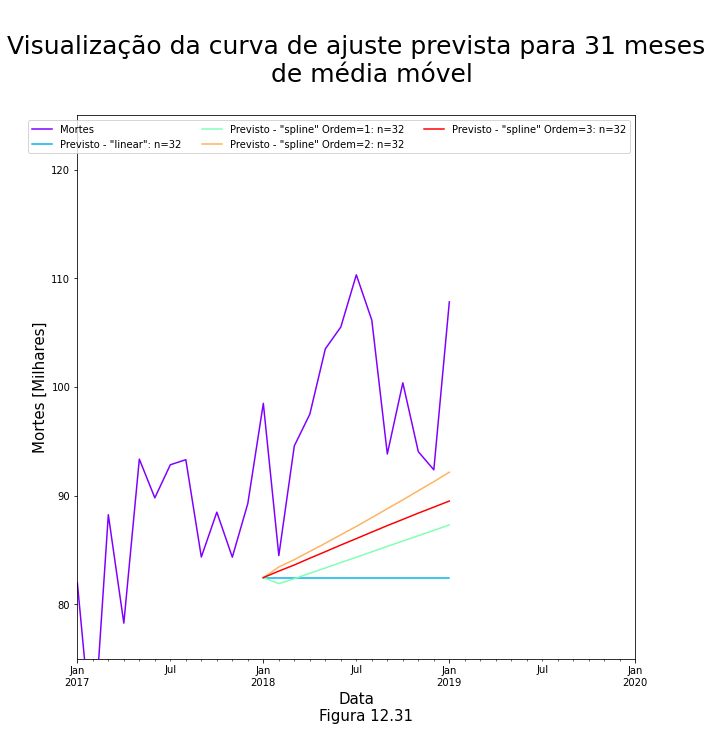

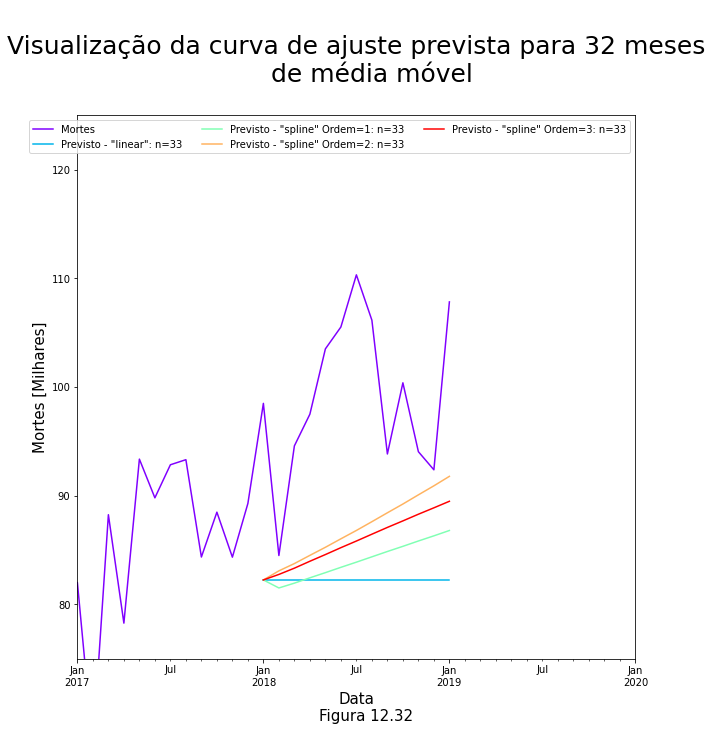

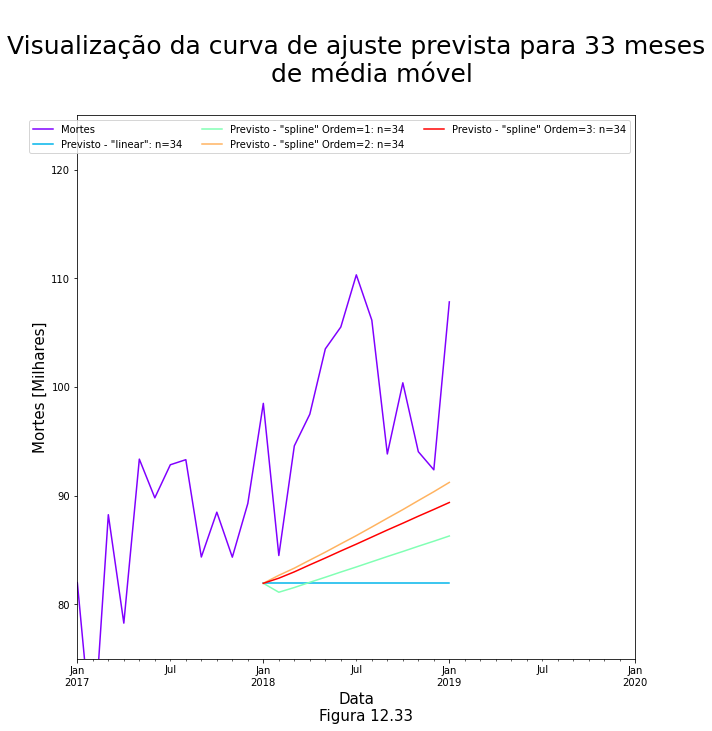

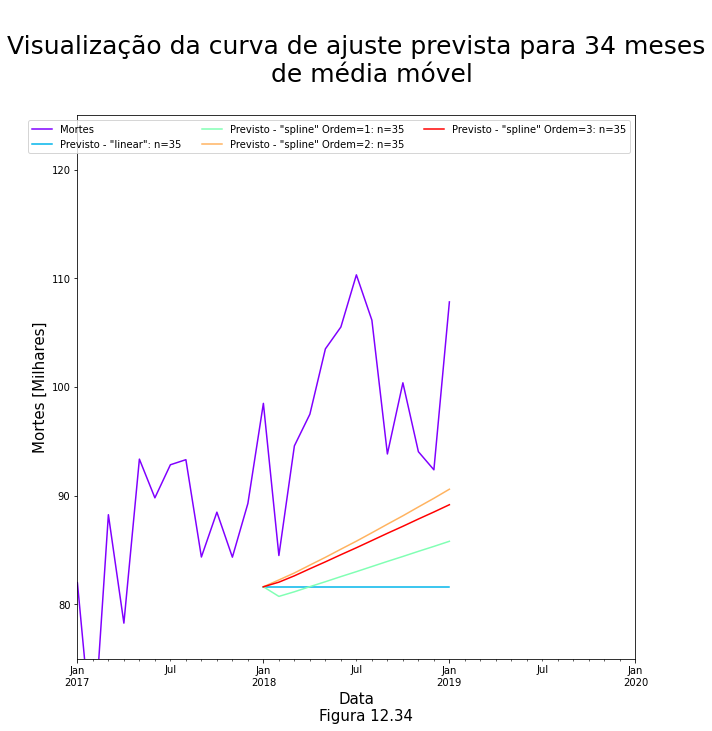

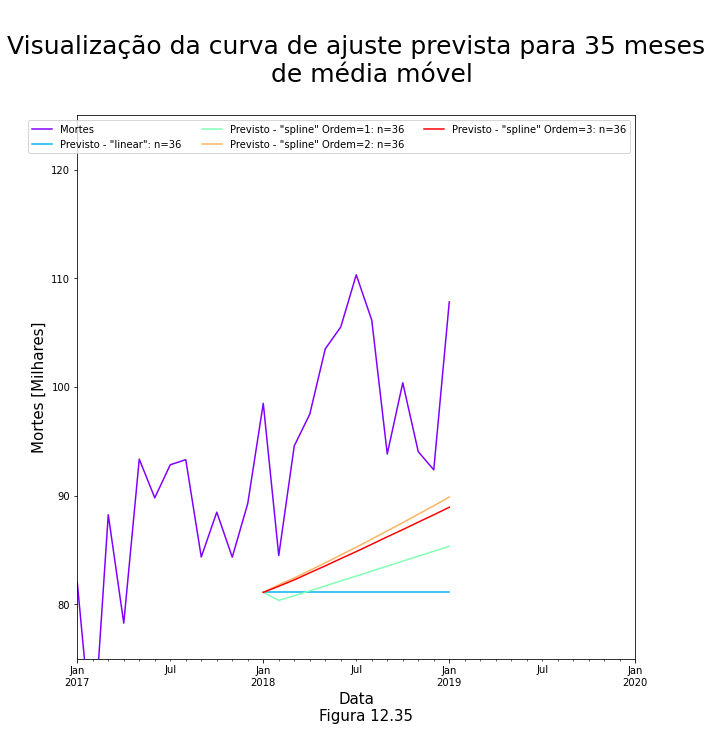

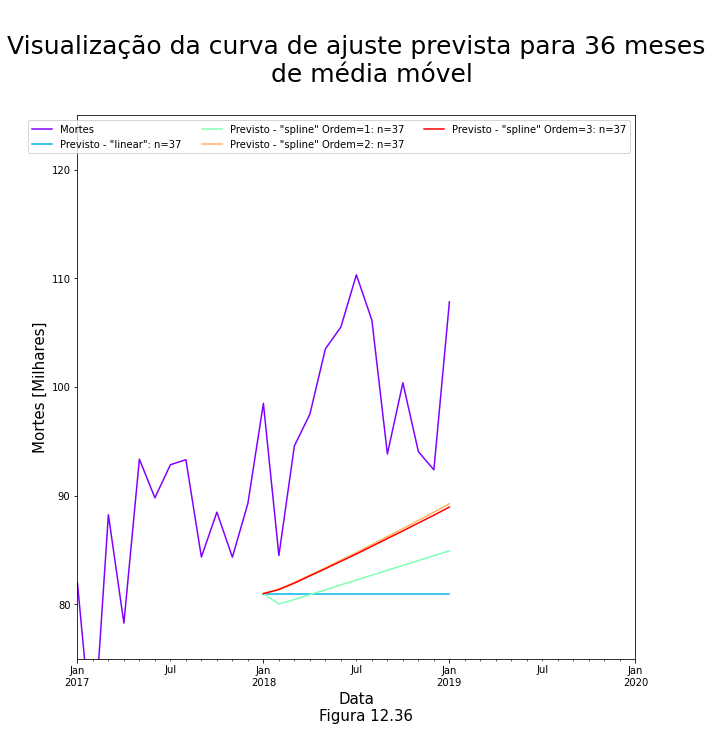

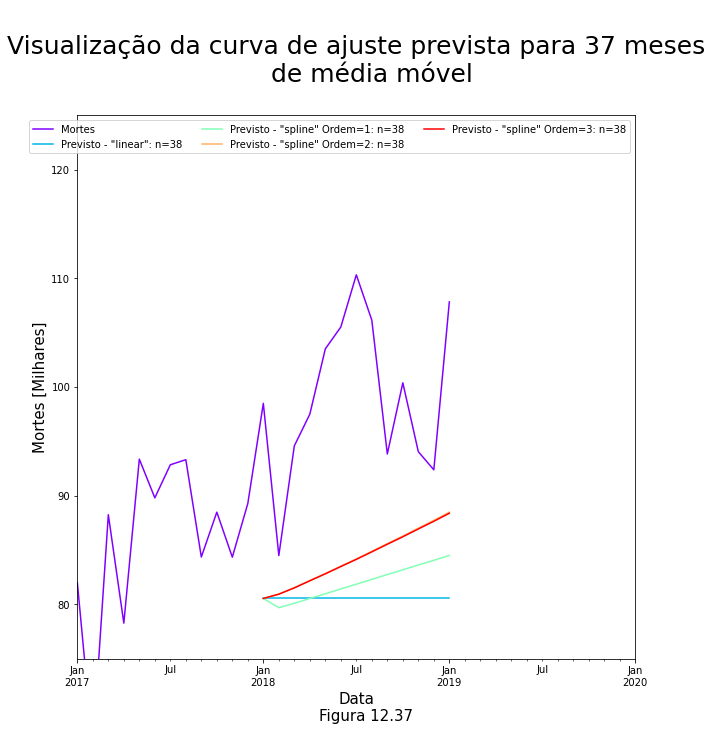

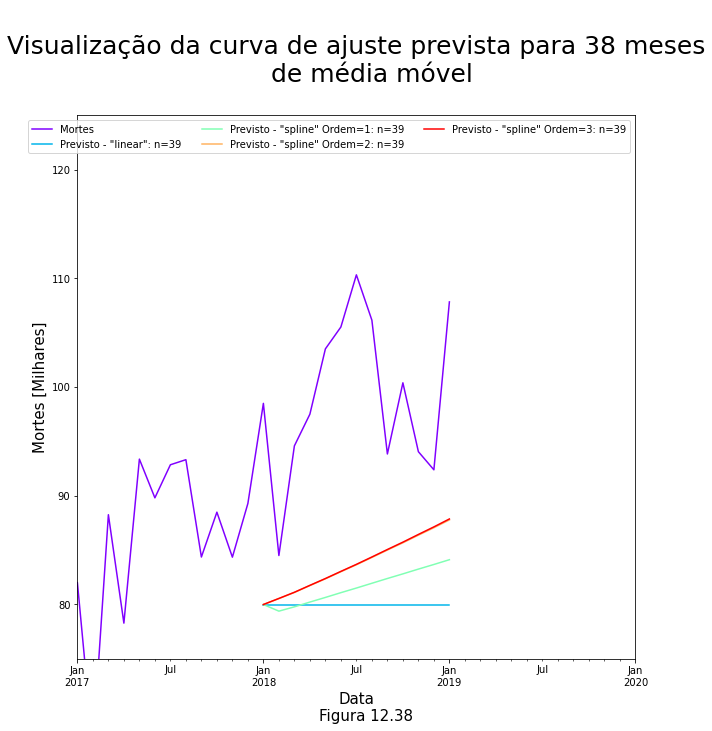

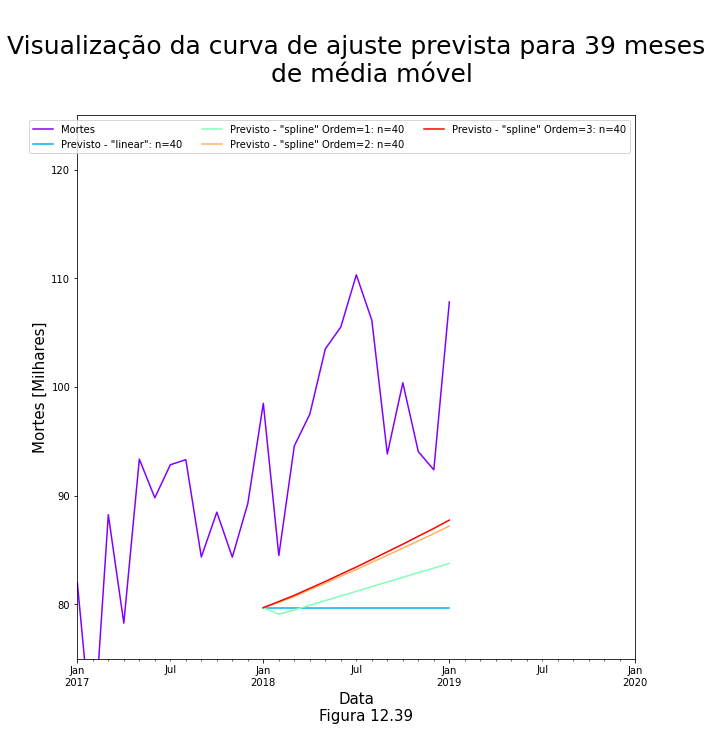

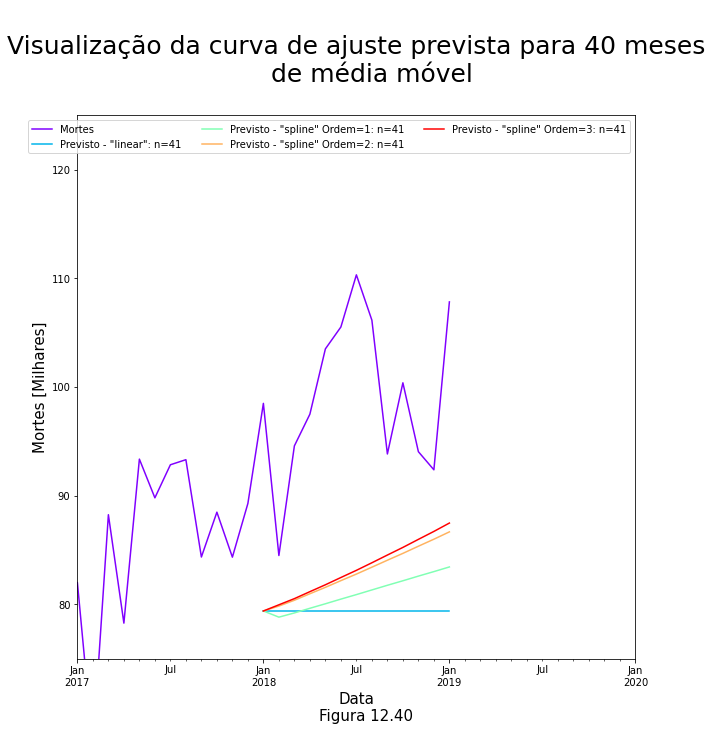

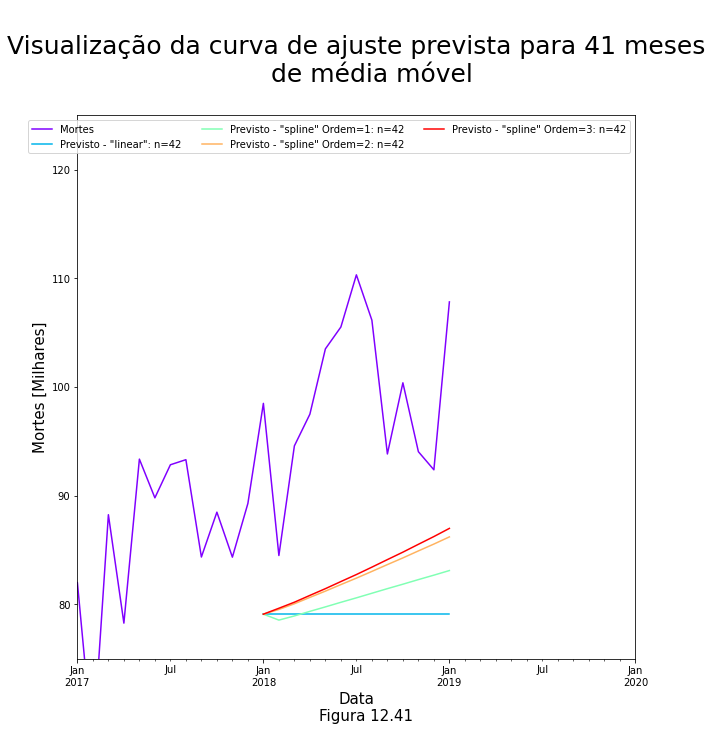

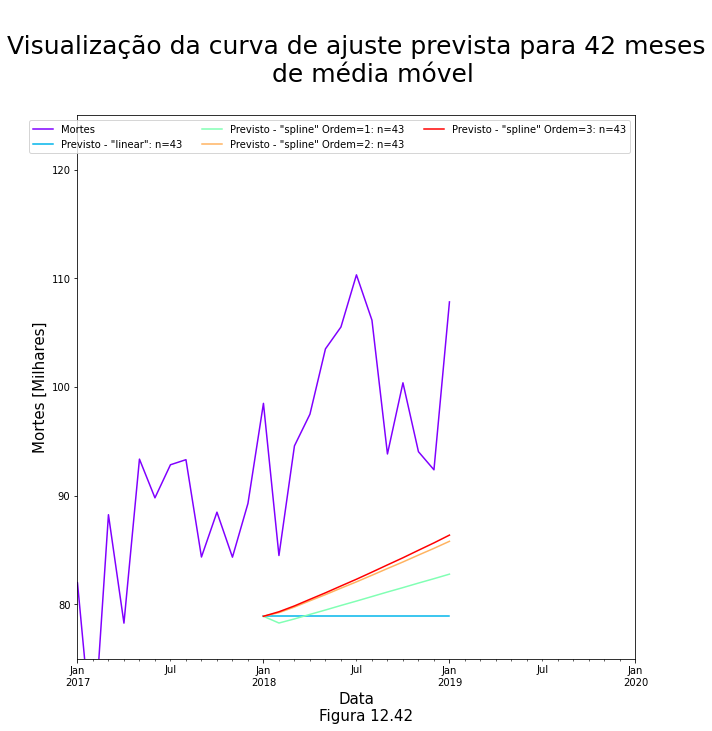

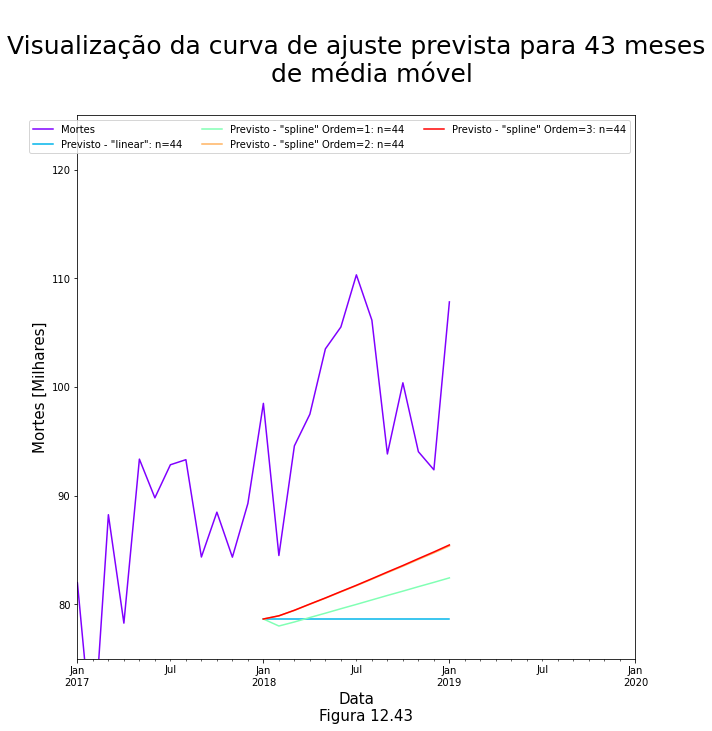

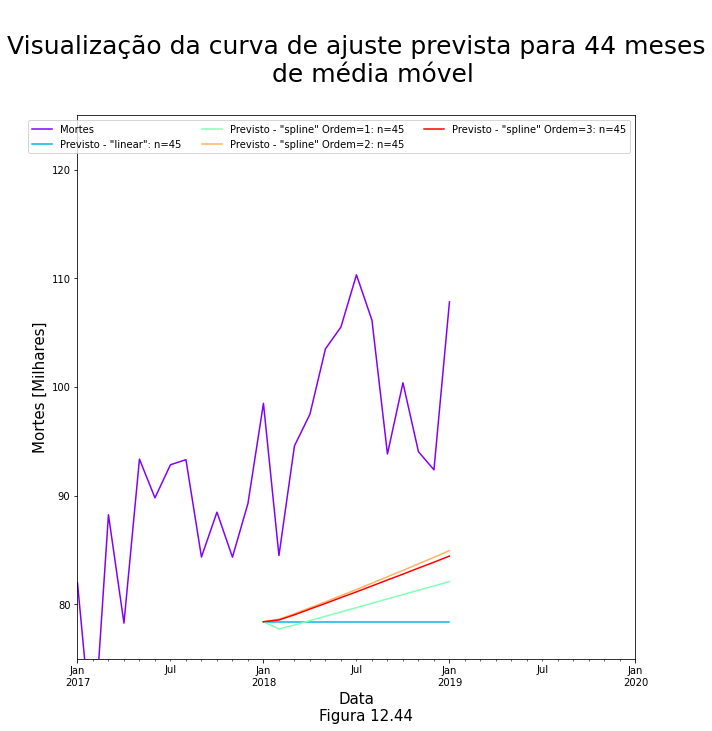

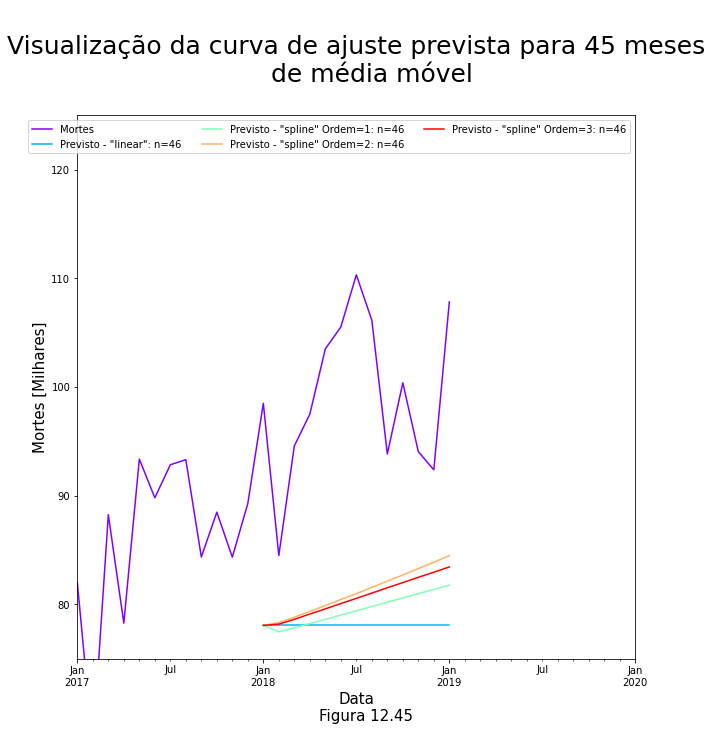

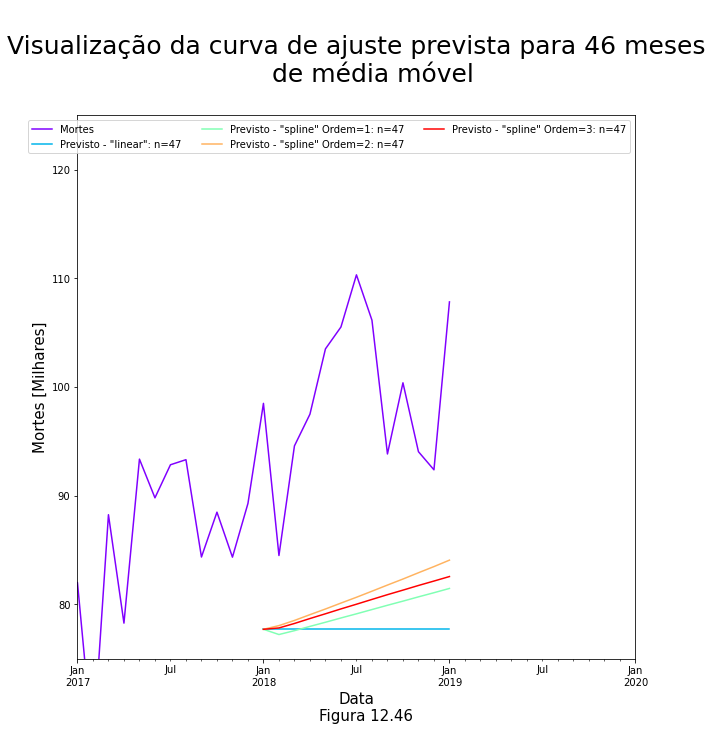

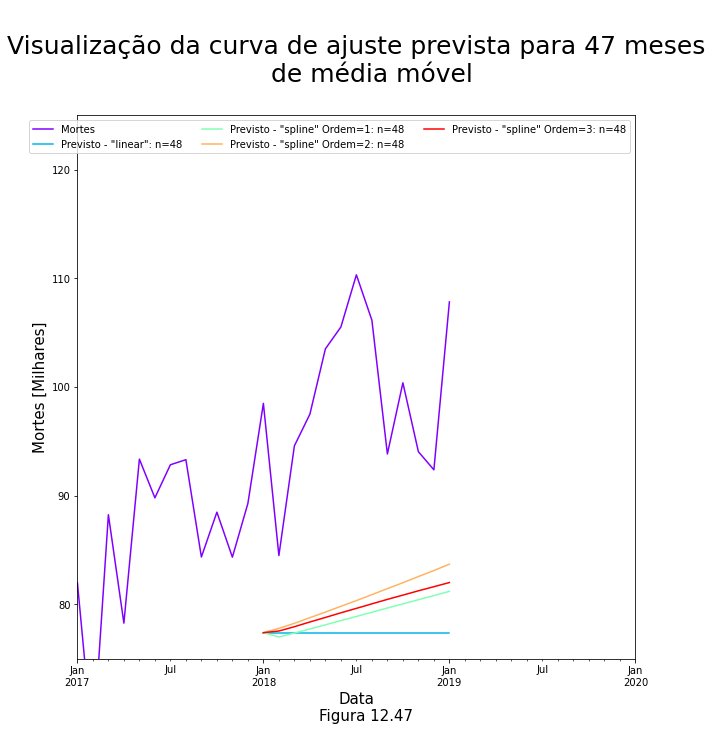

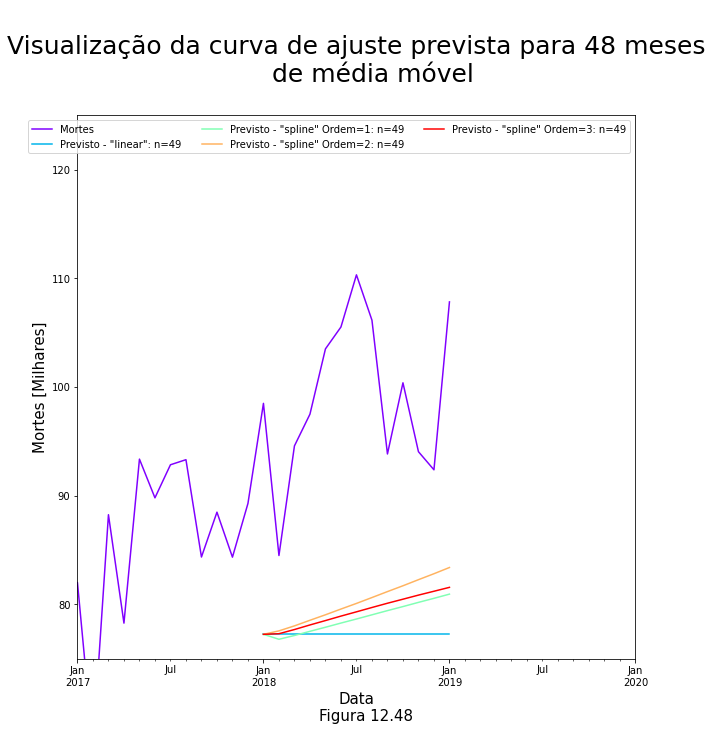

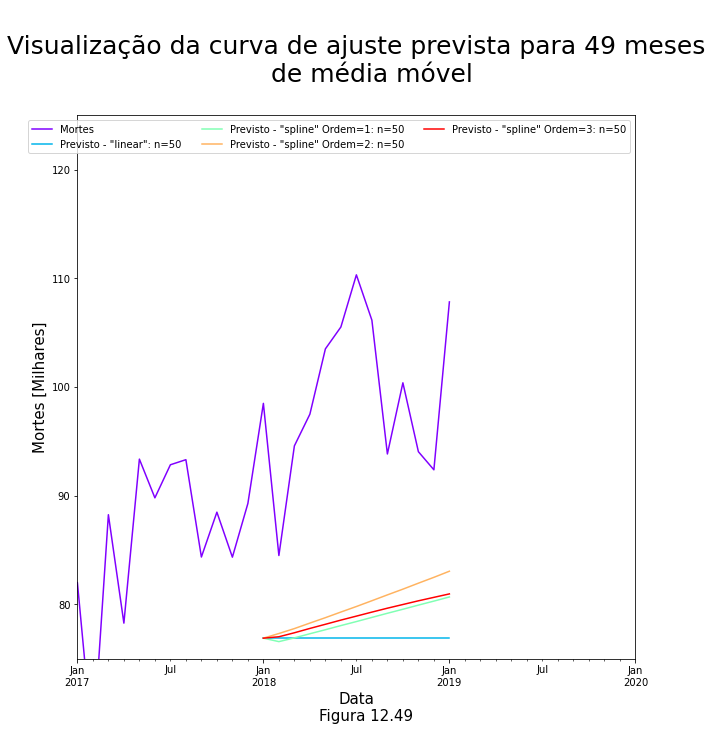

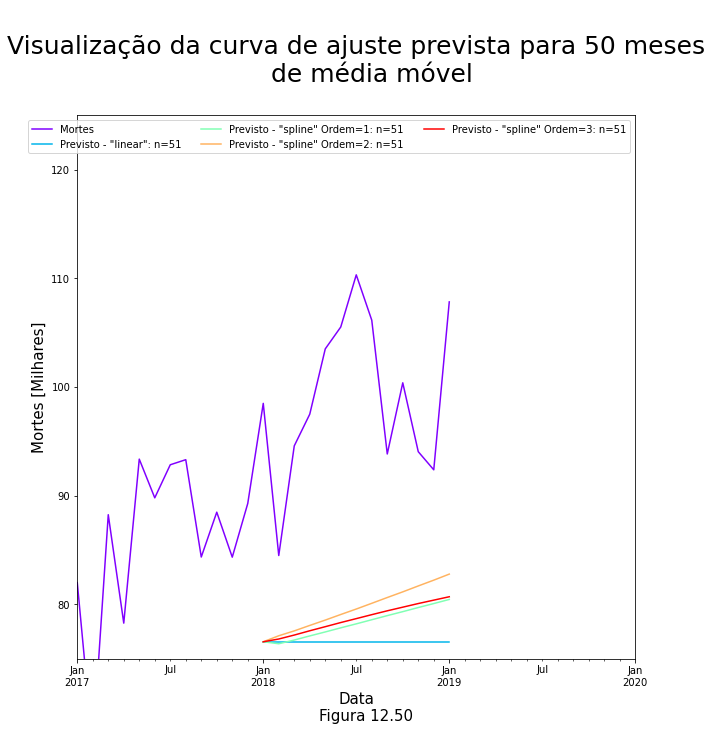

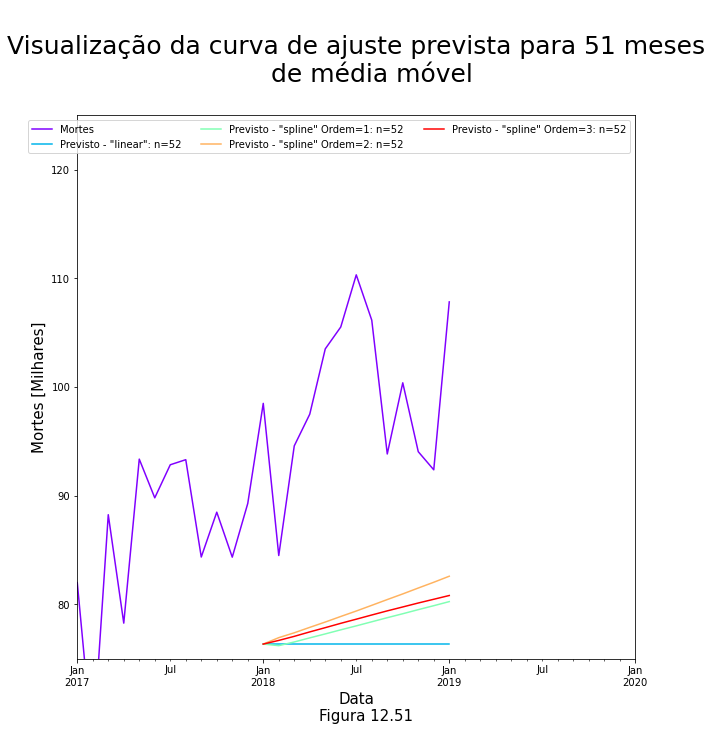

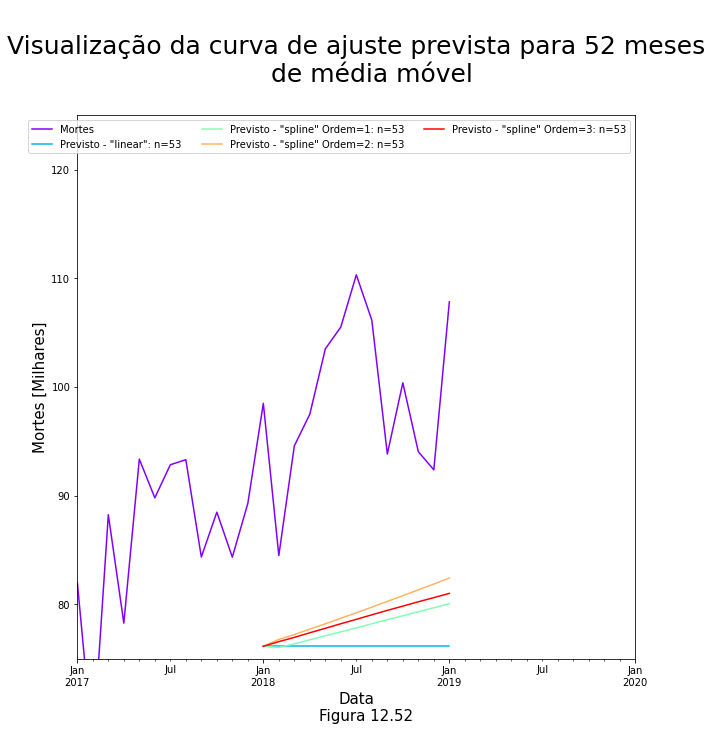

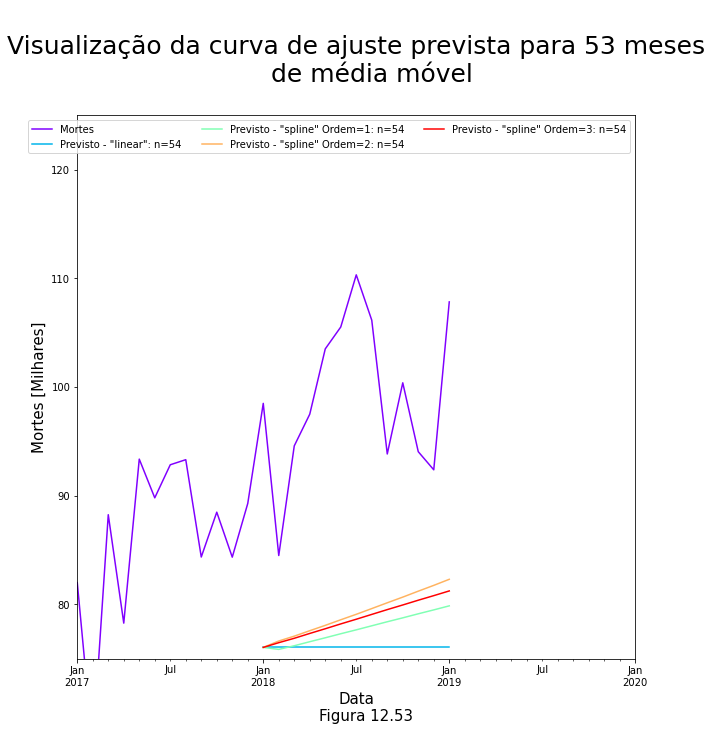

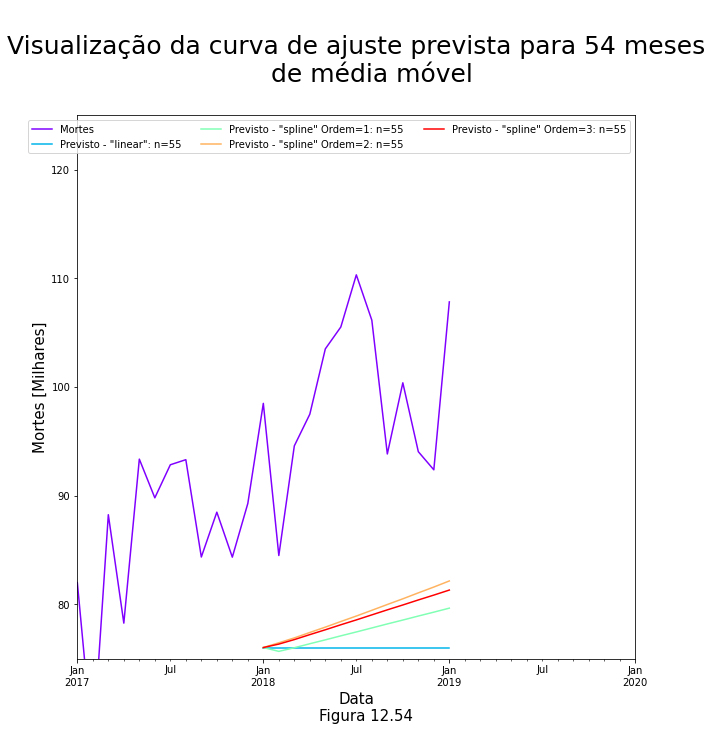

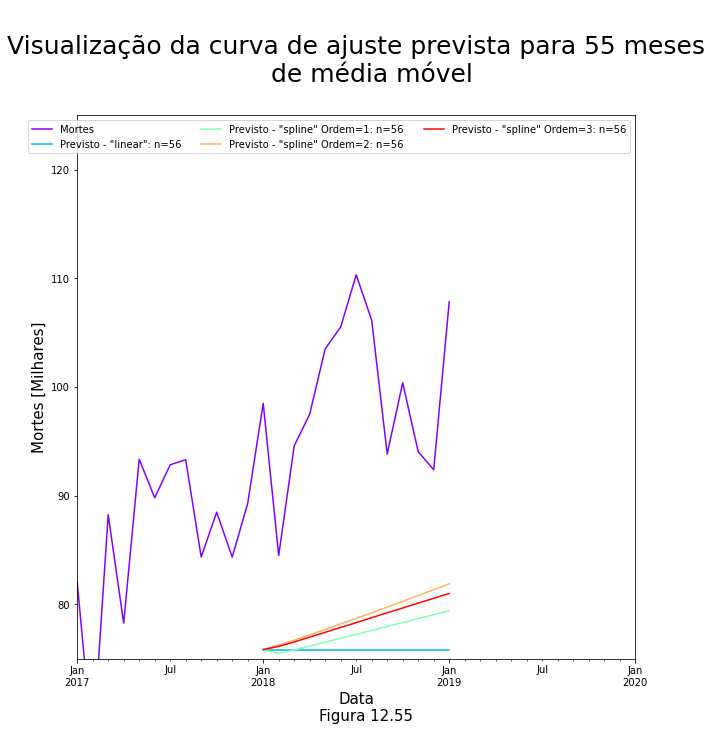

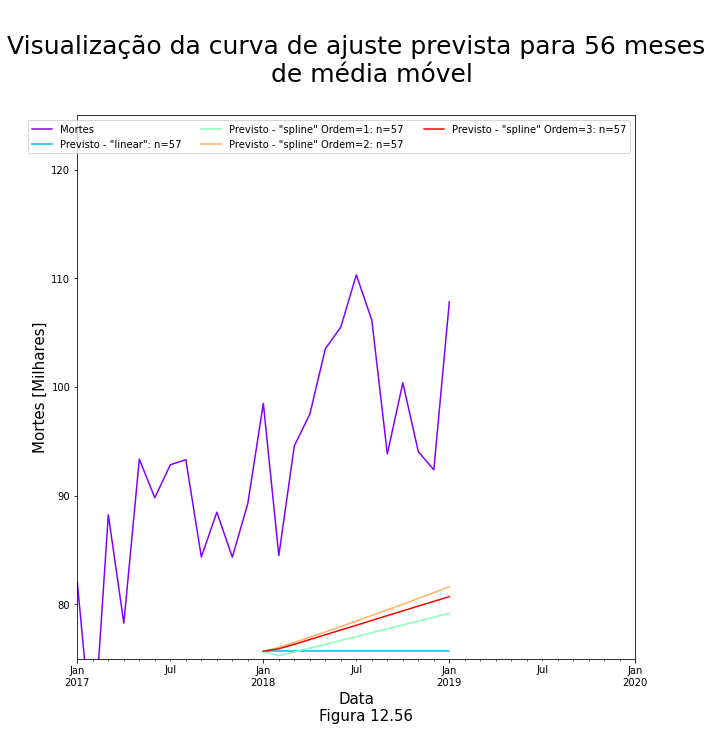

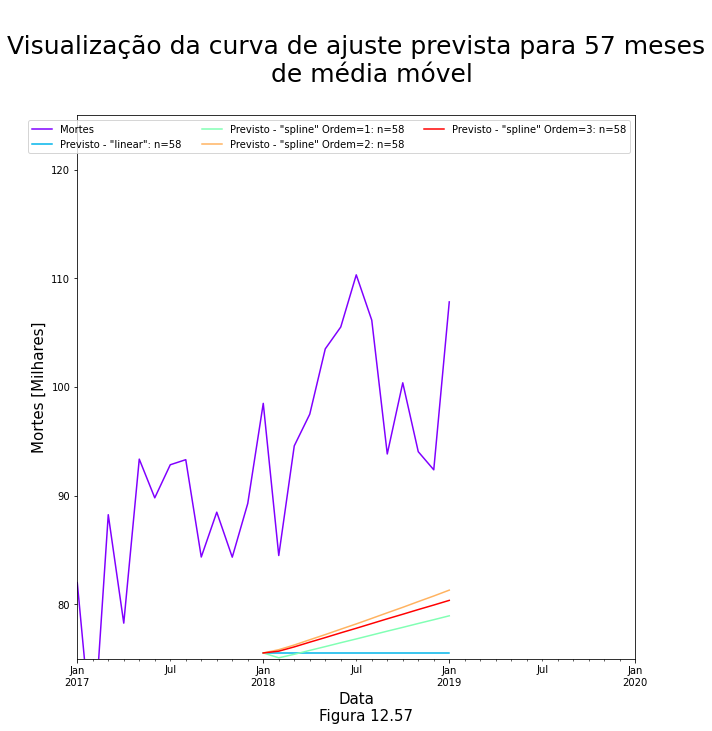

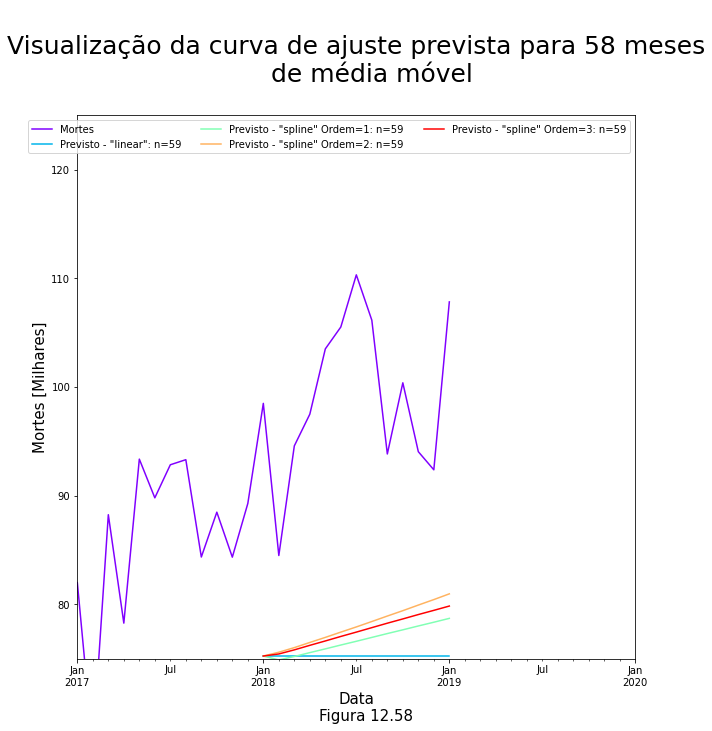

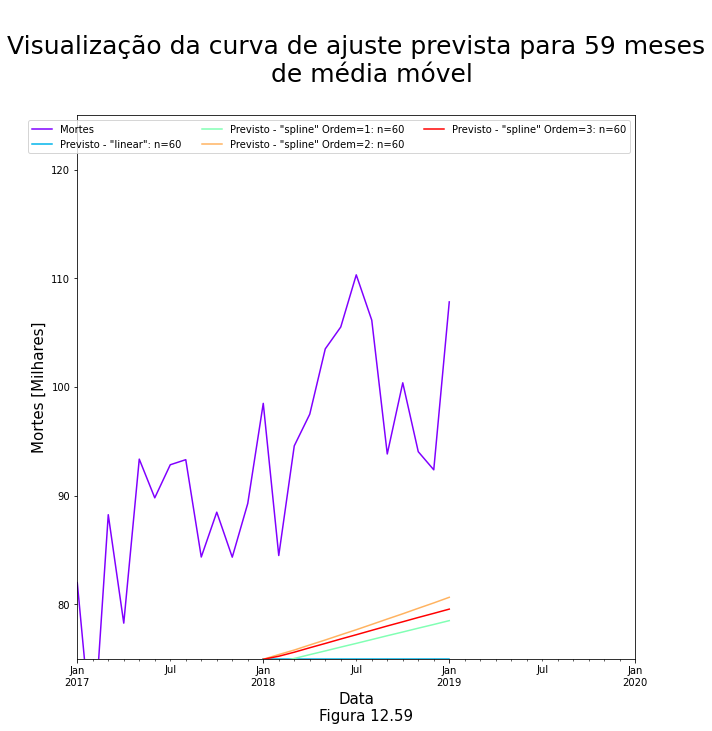

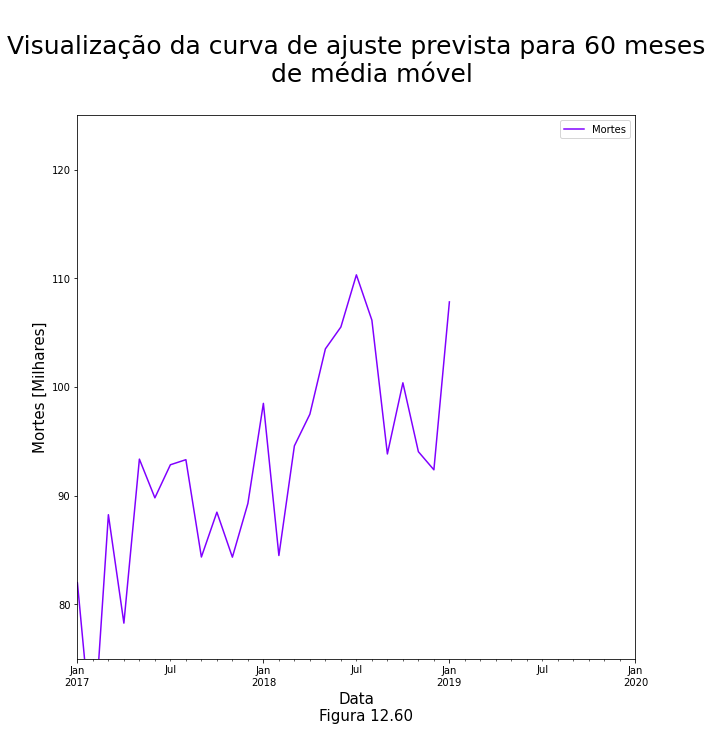

In [414]:
#### Gerar gráficos de visualização de previsão sobre dados reais
for n in p_roll:
    ax = compara_previsao.loc[i_ref:f_prev,['Mortes']+
                            compara_previsao.columns.tolist()[(5*n)+1:(5*(n+1))
                                                    ]].plot(figsize=(10,10), cmap='rainbow')
    ax.set_title('''
Visualização da curva de ajuste prevista para {} meses
    de média móvel
    '''.format(n),
    fontsize=25)
    ax.set_xlabel('''Data
    Figura 12.{}'''.format(n)
    ,fontsize=15)
    ax.set_ylabel('Mortes [Milhares]',fontsize=15)
    ax.legend(bbox_to_anchor=(1,1), ncol=3)
    #plt.plot(compara_previsao['Mortes'] )
    plt.ylim(75,125)
    plt.xlim(pd.to_datetime('2017-01-01'),
            pd.to_datetime('2020-01-01'))

Avaliando a substituição de número de mortes através de uma curva de polinômio de ordem "k" pode-se perceber que há uma vantagem para polinômio de ordem "k" baixa (1 ou 2). Ordens superiores podem retornar resultados com erros elevados.

Além disso, o principal fator que afeta os resultados é o número de meses aplicados no cálculo da média móvel. Quando se utiliza menos de 10 meses a previsão dos polinômios é instável. Para médias móveis maiores de 10 meses é perceptível uma maior estabilidade dos polinômios, porém acompanhado de um subdimensionamento dos resultados.

Uma alternativa para esta avaliação será repetir a previsão sem utilizar médias móveis e aplicar a previsão para o período de teste


## Estimativa pela interpolação com ancoragem única

Outra metodologia para prever o número de mortes é utilizando a interpolação com ancoragem única, isto é, utilizando para interpolação os dados de mortes do período até justamente antes do que se deseja prever.

In [415]:
#### Prever mortes para período de teste diretamento com valores até antes do período desejado
# Referencias
i_prev = pd.to_datetime('2018-01-01')
f_prev = pd.to_datetime('2019-01-01')
p_roll = np.arange(1,5)
mod = 1e3

# Criar df para avaliação
compara_previsao = pd.DataFrame()

# Guardar as mortes de cartório para comparação
compara_previsao['Mortes'] = mortes_cartorio/mod
# Criar coluna para splines
for n in p_roll:
    compara_previsao['spline = {}'.format(n)] = compara_previsao.loc[:i_prev,
                                                                     'Mortes']
    compara_previsao['spline = {}'.format(n)
                     ] = compara_previsao['spline = {}'.format(n)
                                          ].interpolate(method='spline',order=n)
compara_previsao.loc[i_prev:f_prev]

Mortes  spline = 1  spline = 2   spline = 3     spline = 4
date                                                                   
2018-01-01   98.495   98.495000   98.495000    98.495000      98.495000
2018-02-01   84.501  104.928766  112.856606   103.752634     587.343383
2018-03-01   94.585  111.371736  129.987847    97.514309    2280.139509
2018-04-01   97.501  118.505025  153.604389    70.206887    6958.482889
2018-05-01  103.506  125.408208  181.111461    15.202268   16176.323066
2018-06-01  105.520  132.541497  214.342866   -79.889391   33074.968543
2018-07-01  110.316  139.444680  251.154643  -217.282877   59482.718666
2018-08-01  106.146  146.577969  294.000911  -414.860624  100731.224072
2018-09-01   93.840  153.711257  341.733421  -677.820266  160333.848747
2018-10-01  100.386  160.614440  392.578526 -1002.991099  239960.111950
2018-11-01   94.050  167.747729  449.925899 -1420.774047  350064.647623
2018-12-01   92.383  174.650912  510.075710 -1912.565104  488969.851068
2019-01-01  107.828  181.784201  577.037946 -2519.873209  672126.633715

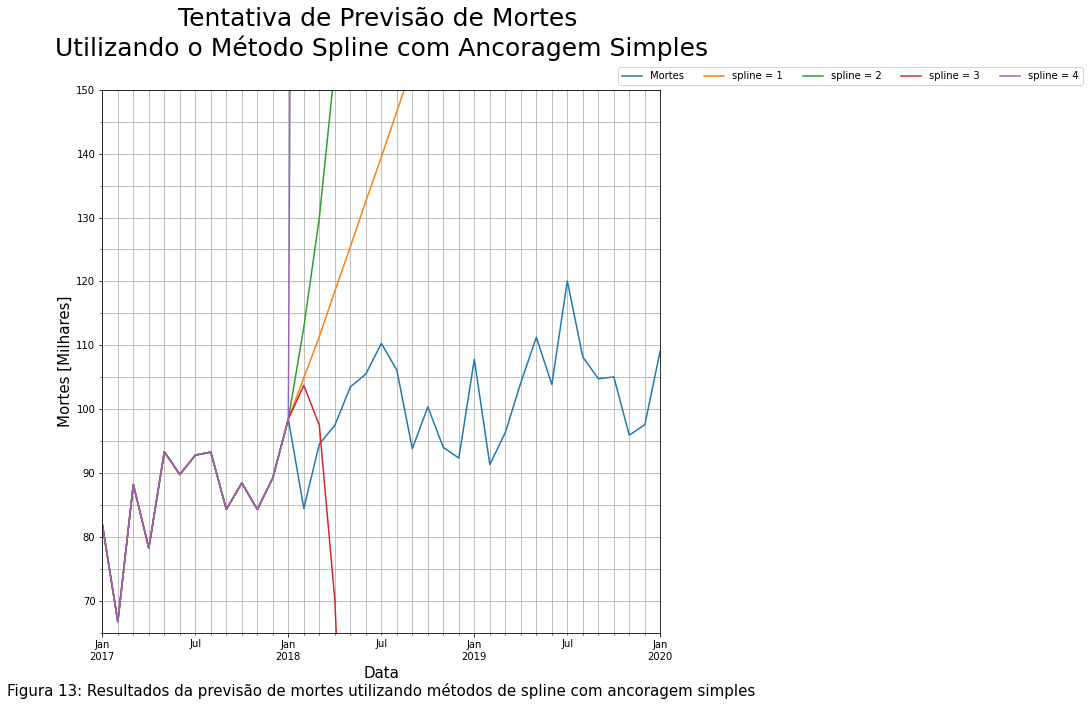

In [416]:
ax = compara_previsao.plot(figsize=(10,10))
ax.set_xlim('2017-01-01',
            '2020-01-01')
ax.set_ylim(65,145)
ax.set_title('''Tentativa de Previsão de Mortes 
Utilizando o Método Spline com Ancoragem Simples
''',
             fontsize=25)
ax.set_xlabel('''Data
Figura 13: Resultados da previsão de mortes utilizando métodos de spline com ancoragem simples
''',fontsize=15)
ax.set_ylabel('Mortes [Milhares]',fontsize=15)
ax.legend(ncol=5, bbox_to_anchor=(0.915,1.05))
ax.set_yticks(np.arange(65,155,5), minor=True)
ax.grid(which='both')

Como é possível verificar na imagem O uso de ancoragem única não retornou bons resultados no período de testes. Assim, foi repetido o processo com ancoragem dupla.

## Estimativa pela interpolação com ancoragem dupla

Como foi visto na seção anterior, o uso de ancoragem simples fez com que a previsão com uso de polinômios (spline) divergisse. Assim, para evitar essa divergência de previsão decidiu-se utilizar a ancoragem dupla, isto é, fazer com que a região que se pretende prever os resultados tenha um valor no início e outro no final.

Para este teste serão utilizados os valores reais de incício e final de período.

In [417]:
#### Prever mortes para período de teste diretamento com valores antes e após o período desejado
# Criar df para avaliação
compara_previsao = pd.DataFrame()

# Guardar as mortes de cartório para comparação
compara_previsao['Real'] = mortes_cartorio/mod
# Criar coluna para splines
for n in p_roll:
    compara_previsao['spline = {}'.format(n)] = compara_previsao['Real']

    nan = np.zeros_like(compara_previsao.loc[i_prev:f_prev,'Real'])
    nan[:] = np.nan

    compara_previsao.loc[i_prev:f_prev,
                         'spline = {}'.format(n)] = nan

    compara_previsao['spline = {}'.format(n)
                     ] = compara_previsao['spline = {}'.format(n)
                                          ].interpolate(method='spline',order=n)
compara_previsao.loc['2018-01-01':'2019-01-01']

Real  spline = 1  spline = 2  spline = 3  spline = 4
date                                                               
2018-01-01   98.495   89.306269   91.917684   87.835017   97.544647
2018-02-01   84.501   89.432752   94.726903   87.382849  108.749835
2018-03-01   94.585   89.546994   96.861839   86.695076  119.267502
2018-04-01   97.501   89.673477   98.779976   85.739025  129.767504
2018-05-01  103.506   89.795879  100.190452   84.732613  137.590584
2018-06-01  105.520   89.922361  101.187301   83.729976  142.383587
2018-07-01  110.316   90.044764  101.706208   82.911843  143.388953
2018-08-01  106.146   90.171246  101.781767   82.344903  140.611659
2018-09-01   93.840   90.297729  101.389131   82.184208  134.308935
2018-10-01  100.386   90.420131  100.563376   82.532815  125.582450
2018-11-01   94.050   90.546614   99.249451   83.535195  115.014018
2018-12-01   92.383   90.669016   97.532125   85.242722  104.788217
2019-01-01  107.828   90.795499   95.296912   87.890461   96.199549

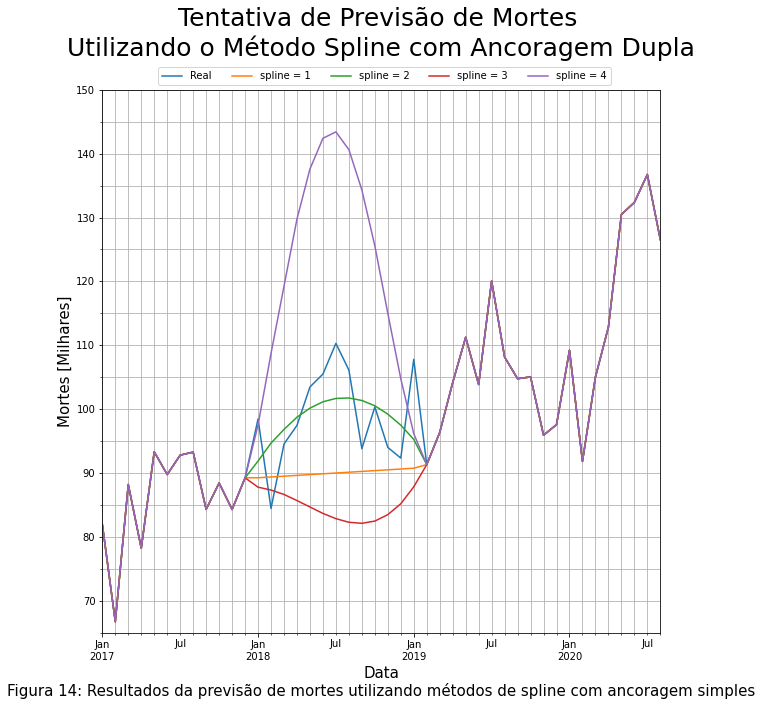

In [418]:
# Gerar gráficos de visualização de previsão de ancoragem dupla
ax = compara_previsao.plot(figsize=(10,10))
ax.set_xlim('2017-01-01',
            '2020-08-01')
ax.set_ylim(65,145)
ax.set_title('''Tentativa de Previsão de Mortes 
Utilizando o Método Spline com Ancoragem Dupla
''',
             fontsize=25)
ax.set_xlabel('''Data
Figura 14: Resultados da previsão de mortes utilizando métodos de spline com ancoragem simples
''',fontsize=15)
ax.set_ylabel('Mortes [Milhares]',fontsize=15)
ax.legend(ncol=5, bbox_to_anchor=(0.92,1.05))
ax.set_yticks(np.arange(65,155,5), minor=True)
ax.grid(which='both')

In [419]:
#### Calculo do erro
print('Erro RMS de previsão de mortes com spline com ancoragem ')
for i in range(1,5):
    print('Ordem da spline {} ---> Erro {:.2f}'.format(i,
    (((compara_previsao.loc[i_prev:f_prev,'Real'] - 
       compara_previsao.loc[i_prev:f_prev,'spline = %i'%i])**2)**0.5).mean()
          ))

Erro RMS de previsão de mortes com spline com ancoragem 
Ordem da spline 1 ---> Erro 9.87
Ordem da spline 2 ---> Erro 5.51
Ordem da spline 3 ---> Erro 14.77
Ordem da spline 4 ---> Erro 25.48


Na seção anterior foi verificado que utilizar spline diretamente nos dados apenas com ancoragem no início não retornam bons resultados. 

Contudo, com as análises desta seção, verifica-se que ao utilizar a previsão de mortes com spline de ordem 2 tendo valores de ancoragem no início e no final do período obteve-se uma previsão razoável de mortes para o período de testes.

Uma vez que não há um valor de mortes sem a ocorrência de COVID-19 para o final de Agosto de 2020, final do período desejado para previsão, pode-se prever o valor esperado a través da taxa de crescimento de mortes vindo da média móvel.

Assim, foi feito uma combinação dos dois métodos seguindo os passos a seguir:

- Prever a taxa de crescimento de mortes pela média móvel
- Prever as mortes no período por um polinômio (spline) de ordem até 2

Para a primeira parte desta tarefa, pode-se utilizar a informação fornecida pelas Figuras 10. Nelas é possível observar que nos últimos anos houve um aumento médio de 5000 mortes por ano aproximadamente.

Por conservadorismo será considerado um aumento de 5000 obitos para o final de período de dados disponível (08/2020). Isso é equivalente a quase dobra a quantidade de mortes esperada.

Além disso, será utilizada a previsão de mortes através de um polinômio de ajuste quadrático (spline ordem=2). 

Um ponto importante de se destacar é o período de projeção de mortes considerado foi de Fevereiro de 2020 até Agosto de 2020. Este período foi escolhido pois, [não haviam casos confirmados de COVID-19 no Brasil antes de 26/02/2020](https://g1.globo.com/sp/sao-paulo/noticia/2020/08/26/primeiro-caso-confirmado-de-covid-19-no-brasil-ocorreu-em-sp-e-completa-seis-meses-nesta-quarta.ghtml).


In [420]:
#### Prever mortes para 2020 utilizando spline e estimativa de mortes adicionais
# Criar df para avaliação
i_prev = pd.to_datetime('2020-03-01')
f_prev = pd.to_datetime('2020-08-01')
mod = 1e3
compara_previsao_2020_1 = pd.DataFrame()
n=2
# Guardar as mortes de cartório para comparação
compara_previsao_2020_1['Real'] = mortes_cartorio/mod
# Criar coluna para splines
compara_previsao_2020_1['spline = %i'%n] = compara_previsao_2020_1['Real']

# Eliminar dados que serão previstos
nan = np.zeros_like(compara_previsao_2020_1.loc[i_prev:,'Real'])
nan[:] = np.nan
compara_previsao_2020_1.loc[i_prev:,'spline = %i'%n] = nan

# Adicionar valor final 
compara_previsao_2020_1.loc['2020-08-01',
                     'spline = %i'%n
                          ] = compara_previsao_2020_1.loc['2020-01-01',
                                                        'Real']+5


compara_previsao_2020_1['spline = %i'%n
                      ] = compara_previsao_2020_1['spline = %i'%n
                                                ].interpolate(method='spline',
                                                              order=n)
compara_previsao_2020_1.loc['2017-06-01':'2020-06-01']

Real  spline = 2
date                           
2017-06-01   89.806   89.806000
2017-07-01   92.847   92.847000
2017-08-01   93.314   93.314000
2017-09-01   84.362   84.362000
2017-10-01   88.487   88.487000
2017-11-01   84.348   84.348000
2017-12-01   89.290   89.290000
2018-01-01   98.495   98.495000
2018-02-01   84.501   84.501000
2018-03-01   94.585   94.585000
2018-04-01   97.501   97.501000
2018-05-01  103.506  103.506000
2018-06-01  105.520  105.520000
2018-07-01  110.316  110.316000
2018-08-01  106.146  106.146000
2018-09-01   93.840   93.840000
2018-10-01  100.386  100.386000
2018-11-01   94.050   94.050000
2018-12-01   92.383   92.383000
2019-01-01  107.828  107.828000
2019-02-01   91.364   91.364000
2019-03-01   96.385   96.385000
2019-04-01  104.184  104.184000
2019-05-01  111.274  111.274000
2019-06-01  103.886  103.886000
2019-07-01  120.077  120.077000
2019-08-01  108.178  108.178000
2019-09-01  104.793  104.793000
2019-10-01  105.071  105.071000
2019-11-01   95.961   95.961000
2019-12-01   97.611   97.611000
2020-01-01  109.238  109.238000
2020-02-01   91.860   91.860000
2020-03-01  105.059   63.366386
2020-04-01  112.863   46.341186
2020-05-01  130.470   43.090586
2020-06-01  132.361   53.397879

(65.0, 140.0)

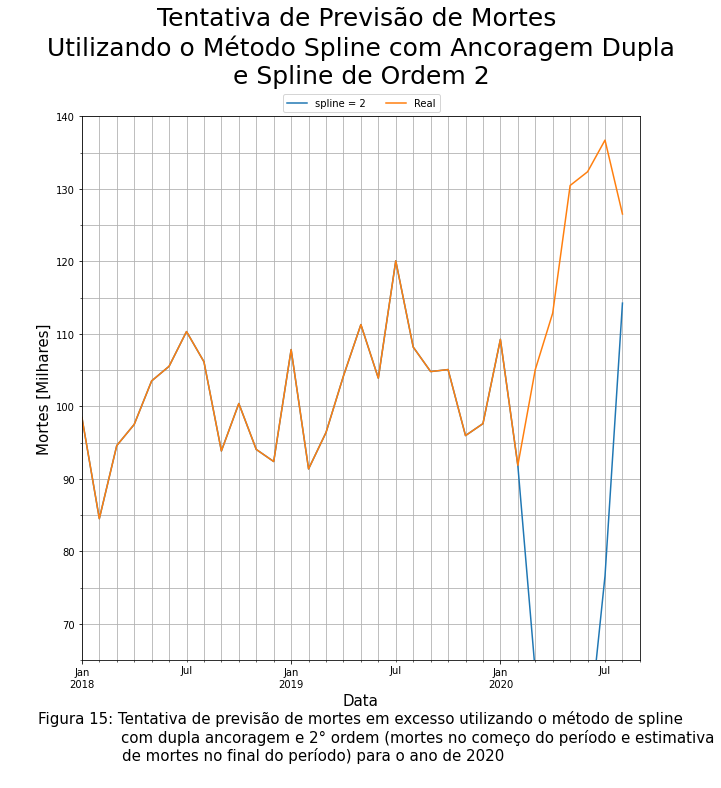

In [421]:
# Visualizar previsão x Real
ax = compara_previsao_2020_1[['spline = %i'%n, 'Real']].plot(figsize=(10,10))
ax.set_xlim('2018-01-01',
            '2020-09-01')

ax.set_title('''Tentativa de Previsão de Mortes 
Utilizando o Método Spline com Ancoragem Dupla
e Spline de Ordem 2
''',
             fontsize=25)
ax.set_xlabel('''Data
Figura 15: Tentativa de previsão de mortes em excesso utilizando o método de spline
                        com dupla ancoragem e 2° ordem (mortes no começo do período e estimativa
            de mortes no final do período) para o ano de 2020                                
'''
,fontsize=15)
ax.set_ylabel('Mortes [Milhares]',fontsize=15)
ax.legend(ncol=5, bbox_to_anchor=(0.65,1.05))
ax.set_yticks(np.arange(0,155,5), minor=True)
ax.grid(which='both')
ax.set_ylim(65,140)

O uso da combinação de ancoragem final igual ao valor de obitos do primeiro mês do ano acrescidos de 5000, combinado com spline de ordem 2 não gerou resultados esperados.

Assim, dado que foi percebido que a spline de 1° grau também poderia dar resultados interessantes, porém com um erro maior, decidiu-se fazer a combinação de dobrar o valor de mortes no final do período (10.000) com a spline linear.

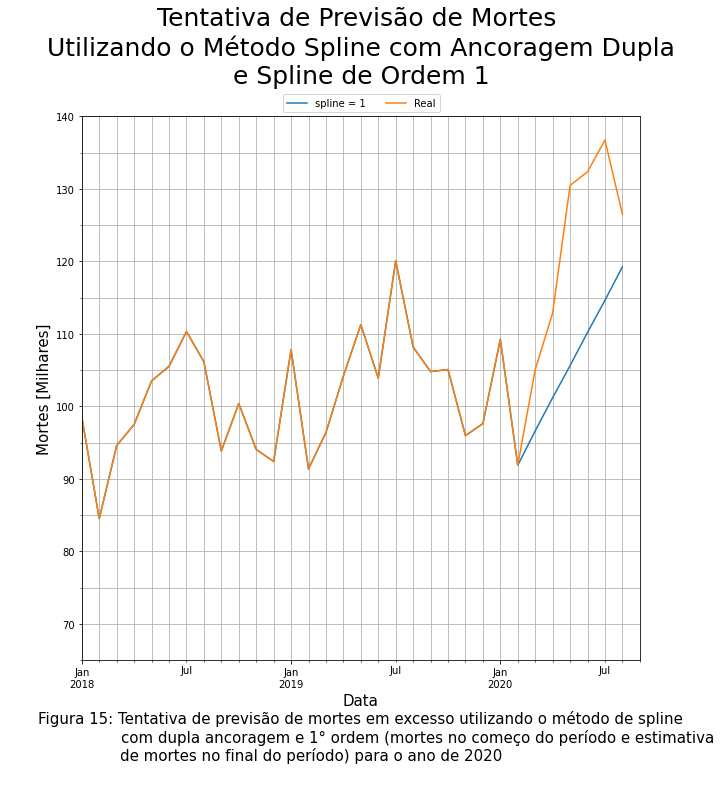

In [422]:
#### Prever mortes para 2020 utilizando spline e estimativa de mortes adicionais
# Criar df para avaliação
i_prev = pd.to_datetime('2020-03-01')
f_prev = pd.to_datetime('2020-08-01')
mod = 1e3
compara_previsao_2020_2 = pd.DataFrame()
n=1
# Guardar as mortes de cartório para comparação
compara_previsao_2020_2['Real'] = mortes_cartorio/mod
# Criar coluna para splines
compara_previsao_2020_2['spline = %i'%n] = compara_previsao_2020_2['Real']

# Eliminar dados que serão previstos
nan = np.zeros_like(compara_previsao_2020_2.loc[i_prev:,'Real'])
nan[:] = np.nan
compara_previsao_2020_2.loc[i_prev:,'spline = %i'%n] = nan

# Adicionar valor final 
compara_previsao_2020_2.loc['2020-08-01',
                     'spline = %i'%n
                          ] = compara_previsao_2020_2.loc['2020-01-01',
                                                        'Real']+10


compara_previsao_2020_2['spline = %i'%n
                      ] = compara_previsao_2020_2['spline = %i'%n
                                                ].interpolate(method='spline',
                                                              order=n)
# Visualizar previsão x Real
ax = compara_previsao_2020_2[['spline = %i'%n, 'Real']].plot(figsize=(10,10))
ax.set_xlim('2018-01-01',
            '2020-09-01')

ax.set_title('''Tentativa de Previsão de Mortes 
Utilizando o Método Spline com Ancoragem Dupla
e Spline de Ordem 1
''',
             fontsize=25)
ax.set_xlabel('''Data
Figura 15: Tentativa de previsão de mortes em excesso utilizando o método de spline
                        com dupla ancoragem e 1° ordem (mortes no começo do período e estimativa
            de mortes no final do período) para o ano de 2020                                 
''', fontsize=15)
ax.set_ylabel('Mortes [Milhares]',fontsize=15)
ax.legend(ncol=5, bbox_to_anchor=(0.65,1.05))
ax.set_yticks(np.arange(65,155,5), minor=True)
ax.set_ylim(65,140)
ax.grid(which='both')

In [423]:
#### Cálculo do Excesso de mortes
(compara_previsao_2020_2['Real']-compara_previsao_2020_2['spline = 1']).sum()

96.54070586248665

É possível verificar que a presença da COVID-19 fez com que houvesse um aumento de mortes totais no Brasil. Calculando a diferença entre o total de mortes reais e previstas, chega-se em uma diferença de aproximadamente 96.000 vidas.

Essa diferença, de acordo com [G1](https://g1.globo.com/bemestar/coronavirus/noticia/2020/08/01/casos-e-mortes-por-coronavirus-no-brasil-em-1o-de-agosto-segundo-consorcio-de-veiculos-de-imprensa.ghtml), é próxima ao que foi registrado até o final do período de previsão. Contudo, deve-se destacar que os dados utilizados são de **mortes totais** e não possuem separação entre óbitos natuais e provocados.

Esta distinção seria importante, pois, durante a pandemia, houve redução da movimentação de pessoas, o que também reduziu a ocorrência de óbitos relacionados ao deslocamento.

# Conclusão

Com este estudo é possível concluir que a COVID-19 provocou um aumento significativo de mortes no Brasil. Este aumento foi acima das projeções realizadas utilizando métodos simples (projeções polinomiais). Contudo, a hipótese inicial do estudo, de que a quantidade de mortes devido à COVID-19 ser maior que o que foi realmente registrado, não foi confirmado.

Para poder ter uma projeção mais precisa seria necessário que os dados possuíssem mais informações, como o tipo de morte ocorrido. Além disso, propõe-se, para trabalhos futuros, o uso de métodos de previsão mais precisos que os utilizados neste estudo.

Assim, não é possível afirmar que os dados oficiais de registros de mortes devido à COVID-19 estão subdimensionados, uma vez que os dados utilizados não apresentam informações suficientes que possibilitam chegar a tal conclusão.